# WOMEN'S HACK FOR SAFETY

## INTRODUCTION

South Africa has one of the highest crime rates in Africa, with approximately 2 million crimes reported every year. Women experience crime and are vulnerable to crime in different ways from men.

Let's build a machine learning model that predicts a woman’s level of risk of being victimized by a crime given 
basic information about her and her life.

<img src="GBV.jpg" style="width:680px;height:380px"/>

## DATA PREPARATION AND EXPLORATORY ANALYSIS

### Importing Libraries and Datasets

In [1]:
# Importing libraries

import numpy as np # for scientific computing
import pandas as pd # for data manipulation, analysis and cleaning
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from matplotlib import style # for data visualization
style.use('ggplot')
sns.set_style('darkgrid')

# Libraries for modelling
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder

print("Done importing libraries...")

Done importing libraries...


In [2]:
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")

In [3]:
#Copying Datasets

train = train_df.copy()
test = test_df.copy()

print("Done copying datasets!!")

Done copying datasets!!


In [4]:
#Merging Datasets

train_df['train']= 1
test_df['train']= 0
dataset = [train_df,test_df]
all_data = pd.concat(dataset)

print("Done merging datasets!!")

Done merging datasets!!


### Data Exploration

In [5]:
train_df.head()

,ID,gender,age,race,dwelling,dwelling_type,province_code,metro_code,psu,nationality,...,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work,target,train
0,ID_00008683,Female,20,Black African,Dwelling/house or brick/concrete block structu...,Formal,North West,NW - Non Metro,66710095,South Africa,...,Xitsonga,Setswana,Grade 11/Standard 9/Form 4,No,No,No,No,Not applicable,0,1
1,ID_00061163,Female,42,Black African,Dwelling/house or brick/concrete block structu...,Formal,Limpopo,LP - Non Metro,98510279,South Africa,...,Sepedi,Sepedi,Grade 12/Standard 10/Form 5/Matric (No Exemption),Yes,No,No,Not applicable,Permanent,0,1
2,ID_00071403,Female,86,Black African,Dwelling/house or brick/concrete block structu...,Formal,Eastern Cape,EC - Non Metro,29210321,South Africa,...,IsiXhosa,IsiXhosa,Unspecified,No,No,No,No,Not applicable,0,1
3,ID_00077803,Female,20,Black African,Town house (semi-detached house in complex),Formal,KwaZulu-Natal,KZN - eThekwini,59913860,South Africa,...,IsiZulu,IsiZulu,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,0,1
4,ID_00086763,Female,26,Black African,Town house (semi-detached house in complex),Formal,Gauteng,GP - City of Johannesburg,79813828,South Africa,...,Setswana,English,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,0,1


In [6]:
test_df.head()

,ID,gender,age,race,dwelling,dwelling_type,province_code,metro_code,psu,nationality,...,marital_st,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work,train
0,ID_00241643,Female,23,Coloured,Dwelling/house or brick/concrete block structu...,Formal,Northern Cape,NC - Non Metro,36410104,South Africa,...,Single and have never been married/never lived...,Afrikaans,Afrikaans,Grade 10/Standard 8/Form 3,Yes,No,No,Not applicable,Permanent,0
1,ID_00312043,Female,64,Black African,Dwelling/house or brick/concrete block structu...,Formal,Limpopo,LP - Non Metro,97410477,South Africa,...,Widowed,Afrikaans,Afrikaans,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,0
2,ID_00345323,Female,18,Black African,Unspecified,Unspecified,Eastern Cape,EC - Buffalo City,26011572,South Africa,...,Single and have never been married/never lived...,IsiXhosa,IsiXhosa,Grade 11/Standard 9/Form 4,No,No,No,No,Not applicable,0
3,ID_00369643,Female,19,Black African,Dwelling/house or brick/concrete block structu...,Formal,Mpumalanga,MP - Non Metro,87710674,South Africa,...,Single and have never been married/never lived...,Xitsonga,Sepedi,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,0
4,ID_00381163,Female,24,Black African,Dwelling/house or brick/concrete block structu...,Formal,Mpumalanga,MP - Non Metro,87411106,South Africa,...,Single and have never been married/never lived...,SiSwati,SiSwati,Grade 11/Standard 9/Form 4,No,No,No,No,Not applicable,0


In [7]:
print('Train_df size: {}\nTest_df size: {}'.format(train_df.shape,test_df.shape))

Train_df size: (7736, 22)
Test_df size: (3316, 21)


In [9]:
all_data['province_code'].nunique()

9

In [10]:
all_data['metro_code'].nunique()

17

In [11]:
# Missing data

all_data.isnull().sum()

ID                      0
gender                  0
age                     0
race                    0
dwelling                0
dwelling_type           0
province_code           0
metro_code              0
psu                     0
nationality             0
RTH                     0
marital_st              0
Lang_inside             0
Lang_outside            0
Education               0
lw_work                 0
lw_business             0
help_on_household       0
job_or_business         0
nature_of_work          0
target               3316
train                   0
dtype: int64

In [12]:
train_df.describe()

,age,psu,target,train
count,7736.000000,7.736000e+03,7736.000000,7736.0
mean,42.193252,6.078730e+07,0.078206,1.0
std,17.269251,2.548540e+07,0.268513,0.0
min,16.000000,1.601007e+07,0.000000,1.0
25%,29.000000,3.681004e+07,0.000000,1.0
50%,39.000000,5.991442e+07,0.000000,1.0
75%,54.000000,7.991039e+07,0.000000,1.0
max,102.000000,9.871054e+07,1.000000,1.0


In [13]:
test_df.describe()

,age,psu,train
count,3316.000000,3.316000e+03,3316.0
mean,41.414053,6.168885e+07,0.0
std,17.028948,2.551864e+07,0.0
min,16.000000,1.601007e+07,0.0
25%,28.000000,3.741003e+07,0.0
50%,38.000000,6.621058e+07,0.0
75%,53.000000,7.991159e+07,0.0
max,98.000000,9.871053e+07,0.0


In [14]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Data Visualization

<AxesSubplot:xlabel='target', ylabel='count'>

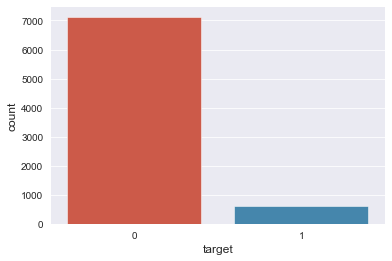

In [15]:
sns.countplot(train_df["target"])

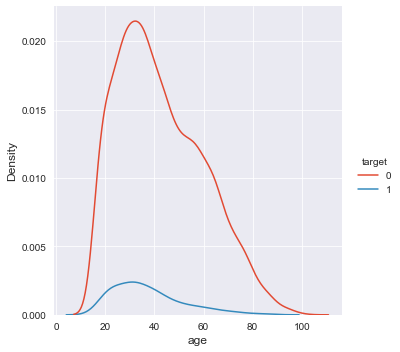

In [16]:
sns.displot( train_df , x = 'age', hue='target' , kind = 'kde')
plt.show()

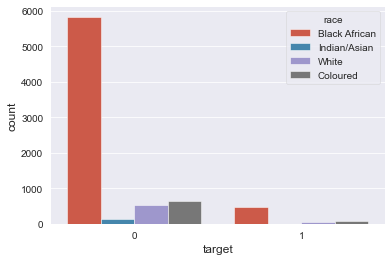

In [17]:
sns.countplot(x="target", hue='race', data=train_df)
plt.show()

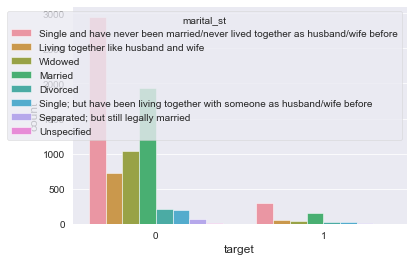

In [18]:
sns.countplot(x="target", hue='marital_st', data=train_df)
plt.show()

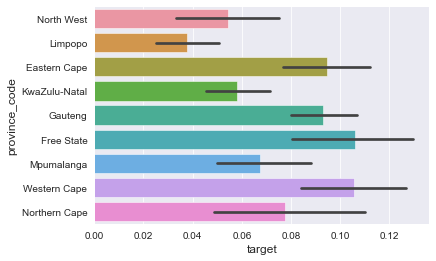

In [19]:
sns.barplot(x="target", y="province_code", data=train_df)
plt.show()

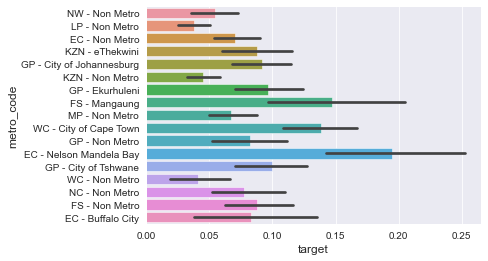

In [20]:
sns.barplot(x="target", y="metro_code", data=train_df)
plt.show()

### Data Preprocessing

In [31]:
# making age bins

age_bin_labels = [1, 2, 3,4,5,6]

all_data['Binned_Age'] =  pd.qcut(all_data['age'], q=6, labels=age_bin_labels).astype(int)

In [21]:
all_data = all_data.drop(['ID','gender','psu'], axis =1)

In [22]:
all_data.columns

Index(['age', 'race', 'dwelling', 'dwelling_type', 'province_code',
       'metro_code', 'nationality', 'RTH', 'marital_st', 'Lang_inside',
       'Lang_outside', 'Education', 'lw_work', 'lw_business',
       'help_on_household', 'job_or_business', 'nature_of_work', 'target',
       'train'],
      dtype='object')

In [23]:
col = ['race', 'dwelling', 'dwelling_type', 'province_code',
       'metro_code', 'nationality', 'RTH', 'marital_st', 'Lang_inside',
       'Lang_outside', 'Education', 'lw_work', 'lw_business',
       'help_on_household', 'job_or_business', 'nature_of_work']

all_data = pd.get_dummies(all_data, columns= col)

In [24]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

print('Done importing..')

Done importing..


In [25]:
all_data[['age']] = minmax.fit_transform(all_data[['age']])

In [26]:
all_data.head()

,age,target,train,race_Black African,race_Coloured,race_Indian/Asian,race_White,dwelling_Caravan/tent,dwelling_Cluster house in complex,dwelling_Dwelling/house or brick/concrete block structure on a separate stand or yard or farm,...,job_or_business_Unspecified,job_or_business_Yes,nature_of_work_A fixed period contract,nature_of_work_Casual,nature_of_work_Do not know,nature_of_work_Not applicable,nature_of_work_Permanent,nature_of_work_Seasonal,nature_of_work_Temporary,nature_of_work_Unspecified
0,0.046512,0.0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.302326,0.0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0.813953,0.0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0.046512,0.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.116279,0.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [27]:
train_df = all_data[all_data['train']== 1]
test_df = all_data[all_data['train']== 0]

In [28]:
features = train_df.drop(['target','train'], axis=1)
label = train_df.target

In [29]:
import re
features = features.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

test_df = test_df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [40]:
#print('Number of class 1 samples before:',features[label == 1].shape[0])

Number of class 1 samples before: 605


In [42]:
#from sklearn.utils import resample

#features_upsampled, label_upsampled = resample(features[label == 1],label[label == 1],n_samples=features[label == 0].shape[0],random_state=50)
#print('Number of class 1 samples after:',features_upsampled.shape[0])

Number of class 1 samples after: 7131


In [43]:
#X_bal = np.vstack((features[label == 0], features_upsampled))
#y_bal = np.hstack((label[label == 0], label_upsampled))
#y_pred = np.zeros(y_bal.shape[0])
#np.mean(y_pred == y_bal) * 100

50.0

In [30]:
X_train, X_val, y_train, y_val = train_test_split(features, label, test_size=0.33, random_state=42)

## MODEL BUILDING AND EVALUATION

### Model Building

In [32]:
cat = CatBoostClassifier(eval_metric='AUC:hints=skip_train~false')

cat_param_grid = {'bagging_temperature': [0.5,0.6],
               'depth': [4,5],
               'iterations': [200,300],
               'l2_leaf_reg': [20,30],
               'learning_rate': [0.05,0.07],
               'random_strength': [0.6,0.8]}

In [36]:
lgbm_model = LGBMClassifier()

lgbm_param_grid = {'boosting_type' : ['gbdt'],
                'objective' : ['binary'],
                'num_iterations': [200,300],
               'learning_rate': [0.05,0.07]}

In [34]:
from sklearn.model_selection import GridSearchCV

In [37]:
grid_lgbm = GridSearchCV(estimator=lgbm_model, param_grid=lgbm_param_grid, scoring='roc_auc', cv=3)
grid_lgbm.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LGBMClassifier(),
             param_grid={'boosting_type': ['gbdt'],
                         'learning_rate': [0.05, 0.07],
                         'num_iterations': [200, 300],
                         'objective': ['binary']},
             scoring='roc_auc')

In [39]:
print("Best parameters: ", grid_lgbm.best_params_)
print("Best Score is: ", grid_lgbm.best_score_)

Best parameters:  {'boosting_type': 'gbdt', 'learning_rate': 0.05, 'num_iterations': 200, 'objective': 'binary'}
Best Score is:  0.6125454848936477


In [40]:
cat.grid_search(param_grid=cat_param_grid,
            X= X_train,
            y=y_train,
            cv=3)

0:	learn: 0.5842310	test: 0.5631145	best: 0.5631145 (0)	total: 315ms	remaining: 1m 2s
1:	learn: 0.5880316	test: 0.5801239	best: 0.5801239 (1)	total: 332ms	remaining: 32.8s
2:	learn: 0.5941292	test: 0.5780488	best: 0.5801239 (1)	total: 348ms	remaining: 22.9s
3:	learn: 0.5992911	test: 0.5932193	best: 0.5932193 (3)	total: 365ms	remaining: 17.9s
4:	learn: 0.5977966	test: 0.6046610	best: 0.6046610 (4)	total: 382ms	remaining: 14.9s
5:	learn: 0.5973308	test: 0.5997446	best: 0.6046610 (4)	total: 396ms	remaining: 12.8s
6:	learn: 0.5976000	test: 0.6264079	best: 0.6264079 (6)	total: 405ms	remaining: 11.2s
7:	learn: 0.5972118	test: 0.6205465	best: 0.6264079 (6)	total: 414ms	remaining: 9.95s
8:	learn: 0.6019234	test: 0.6156621	best: 0.6264079 (6)	total: 424ms	remaining: 8.99s
9:	learn: 0.6067503	test: 0.6146852	best: 0.6264079 (6)	total: 432ms	remaining: 8.22s
10:	learn: 0.6202711	test: 0.6105095	best: 0.6264079 (6)	total: 442ms	remaining: 7.59s
11:	learn: 0.6208127	test: 0.6160197	best: 0.6264079 

97:	learn: 0.7383194	test: 0.6612565	best: 0.6612565 (97)	total: 859ms	remaining: 894ms
98:	learn: 0.7387504	test: 0.6606436	best: 0.6612565 (97)	total: 864ms	remaining: 881ms
99:	learn: 0.7388711	test: 0.6599413	best: 0.6612565 (97)	total: 868ms	remaining: 868ms
100:	learn: 0.7390740	test: 0.6597497	best: 0.6612565 (97)	total: 873ms	remaining: 855ms
101:	learn: 0.7396014	test: 0.6593922	best: 0.6612565 (97)	total: 879ms	remaining: 845ms
102:	learn: 0.7394555	test: 0.6584472	best: 0.6612565 (97)	total: 884ms	remaining: 833ms
103:	learn: 0.7401816	test: 0.6580258	best: 0.6612565 (97)	total: 889ms	remaining: 820ms
104:	learn: 0.7402755	test: 0.6583450	best: 0.6612565 (97)	total: 893ms	remaining: 808ms
105:	learn: 0.7403401	test: 0.6584472	best: 0.6612565 (97)	total: 897ms	remaining: 796ms
106:	learn: 0.7405497	test: 0.6582684	best: 0.6612565 (97)	total: 902ms	remaining: 784ms
107:	learn: 0.7421142	test: 0.6584727	best: 0.6612565 (97)	total: 906ms	remaining: 772ms
108:	learn: 0.7426332	te

2:	learn: 0.5944612	test: 0.5789682	best: 0.5801749 (1)	total: 42.5ms	remaining: 2.79s
3:	learn: 0.5995913	test: 0.5928489	best: 0.5928489 (3)	total: 54.8ms	remaining: 2.68s
4:	learn: 0.5990509	test: 0.6044822	best: 0.6044822 (4)	total: 65.5ms	remaining: 2.56s
5:	learn: 0.5986514	test: 0.5990167	best: 0.6044822 (4)	total: 71.8ms	remaining: 2.32s
6:	learn: 0.5992919	test: 0.6267910	best: 0.6267910 (6)	total: 77.3ms	remaining: 2.13s
7:	learn: 0.5993313	test: 0.6208913	best: 0.6267910 (6)	total: 82.6ms	remaining: 1.98s
8:	learn: 0.6035466	test: 0.6150236	best: 0.6267910 (6)	total: 88ms	remaining: 1.87s
9:	learn: 0.6086066	test: 0.6149406	best: 0.6267910 (6)	total: 93.1ms	remaining: 1.77s
10:	learn: 0.6430369	test: 0.6304814	best: 0.6304814 (10)	total: 98.5ms	remaining: 1.69s
11:	learn: 0.6385471	test: 0.6281829	best: 0.6304814 (10)	total: 104ms	remaining: 1.63s
12:	learn: 0.6376206	test: 0.6297152	best: 0.6304814 (10)	total: 109ms	remaining: 1.57s
13:	learn: 0.6398395	test: 0.6329141	best

108:	learn: 0.7570251	test: 0.6647108	best: 0.6647108 (108)	total: 579ms	remaining: 484ms
109:	learn: 0.7571182	test: 0.6646469	best: 0.6647108 (108)	total: 584ms	remaining: 478ms
110:	learn: 0.7572129	test: 0.6645448	best: 0.6647108 (108)	total: 588ms	remaining: 472ms
111:	learn: 0.7573119	test: 0.6646725	best: 0.6647108 (108)	total: 594ms	remaining: 467ms
112:	learn: 0.7573135	test: 0.6646980	best: 0.6647108 (108)	total: 598ms	remaining: 461ms
113:	learn: 0.7577319	test: 0.6647108	best: 0.6647108 (108)	total: 602ms	remaining: 454ms
114:	learn: 0.7597065	test: 0.6628464	best: 0.6647108 (108)	total: 607ms	remaining: 449ms
115:	learn: 0.7604108	test: 0.6627953	best: 0.6647108 (108)	total: 611ms	remaining: 443ms
116:	learn: 0.7604049	test: 0.6628336	best: 0.6647108 (108)	total: 616ms	remaining: 437ms
117:	learn: 0.7604694	test: 0.6634466	best: 0.6647108 (108)	total: 620ms	remaining: 431ms
118:	learn: 0.7604317	test: 0.6635104	best: 0.6647108 (108)	total: 625ms	remaining: 425ms
119:	learn

26:	learn: 0.6655018	test: 0.6093858	best: 0.6268995 (12)	total: 121ms	remaining: 775ms
27:	learn: 0.6654783	test: 0.6087473	best: 0.6268995 (12)	total: 126ms	remaining: 777ms
28:	learn: 0.6701422	test: 0.6117610	best: 0.6268995 (12)	total: 132ms	remaining: 781ms
29:	learn: 0.6701271	test: 0.6127953	best: 0.6268995 (12)	total: 138ms	remaining: 783ms
30:	learn: 0.6710586	test: 0.6165305	best: 0.6268995 (12)	total: 143ms	remaining: 781ms
31:	learn: 0.6721234	test: 0.6170668	best: 0.6268995 (12)	total: 148ms	remaining: 775ms
32:	learn: 0.6729157	test: 0.6136062	best: 0.6268995 (12)	total: 152ms	remaining: 770ms
33:	learn: 0.6726961	test: 0.6136317	best: 0.6268995 (12)	total: 157ms	remaining: 765ms
34:	learn: 0.6740355	test: 0.6154003	best: 0.6268995 (12)	total: 161ms	remaining: 759ms
35:	learn: 0.6758641	test: 0.6177180	best: 0.6268995 (12)	total: 165ms	remaining: 753ms
36:	learn: 0.6752194	test: 0.6182033	best: 0.6268995 (12)	total: 170ms	remaining: 749ms
37:	learn: 0.6756969	test: 0.617

138:	learn: 0.7450848	test: 0.6633125	best: 0.6638233 (113)	total: 653ms	remaining: 287ms
139:	learn: 0.7456198	test: 0.6634785	best: 0.6638233 (113)	total: 658ms	remaining: 282ms
140:	learn: 0.7456625	test: 0.6634274	best: 0.6638233 (113)	total: 663ms	remaining: 277ms
141:	learn: 0.7456600	test: 0.6633891	best: 0.6638233 (113)	total: 668ms	remaining: 273ms
142:	learn: 0.7457942	test: 0.6634402	best: 0.6638233 (113)	total: 673ms	remaining: 268ms
143:	learn: 0.7459124	test: 0.6634529	best: 0.6638233 (113)	total: 679ms	remaining: 264ms
144:	learn: 0.7466712	test: 0.6633763	best: 0.6638233 (113)	total: 683ms	remaining: 259ms
145:	learn: 0.7471004	test: 0.6631975	best: 0.6638233 (113)	total: 688ms	remaining: 254ms
146:	learn: 0.7473713	test: 0.6637083	best: 0.6638233 (113)	total: 692ms	remaining: 250ms
147:	learn: 0.7475557	test: 0.6637594	best: 0.6638233 (113)	total: 696ms	remaining: 245ms
148:	learn: 0.7478416	test: 0.6641297	best: 0.6641297 (148)	total: 701ms	remaining: 240ms
149:	learn

56:	learn: 0.7122480	test: 0.6538182	best: 0.6538182 (56)	total: 267ms	remaining: 669ms
57:	learn: 0.7129079	test: 0.6555548	best: 0.6555548 (57)	total: 273ms	remaining: 669ms
58:	learn: 0.7153603	test: 0.6565062	best: 0.6565062 (58)	total: 280ms	remaining: 670ms
59:	learn: 0.7155137	test: 0.6565062	best: 0.6565062 (58)	total: 285ms	remaining: 664ms
60:	learn: 0.7165006	test: 0.6556570	best: 0.6565062 (58)	total: 290ms	remaining: 660ms
61:	learn: 0.7183804	test: 0.6564487	best: 0.6565062 (58)	total: 295ms	remaining: 656ms
62:	learn: 0.7193991	test: 0.6553888	best: 0.6565062 (58)	total: 300ms	remaining: 652ms
63:	learn: 0.7200589	test: 0.6579428	best: 0.6579428 (63)	total: 307ms	remaining: 652ms
64:	learn: 0.7206153	test: 0.6575086	best: 0.6579428 (63)	total: 315ms	remaining: 654ms
65:	learn: 0.7208928	test: 0.6587345	best: 0.6587345 (65)	total: 320ms	remaining: 649ms
66:	learn: 0.7220565	test: 0.6599860	best: 0.6599860 (66)	total: 324ms	remaining: 643ms
67:	learn: 0.7236546	test: 0.660

160:	learn: 0.7572117	test: 0.6593666	best: 0.6629166 (89)	total: 792ms	remaining: 192ms
161:	learn: 0.7569492	test: 0.6587154	best: 0.6629166 (89)	total: 798ms	remaining: 187ms
162:	learn: 0.7577500	test: 0.6585877	best: 0.6629166 (89)	total: 804ms	remaining: 182ms
163:	learn: 0.7579939	test: 0.6586387	best: 0.6629166 (89)	total: 809ms	remaining: 178ms
164:	learn: 0.7588969	test: 0.6584217	best: 0.6629166 (89)	total: 815ms	remaining: 173ms
165:	learn: 0.7590462	test: 0.6574001	best: 0.6629166 (89)	total: 820ms	remaining: 168ms
166:	learn: 0.7590789	test: 0.6574128	best: 0.6629166 (89)	total: 825ms	remaining: 163ms
167:	learn: 0.7605562	test: 0.6577193	best: 0.6629166 (89)	total: 831ms	remaining: 158ms
168:	learn: 0.7613284	test: 0.6574767	best: 0.6629166 (89)	total: 836ms	remaining: 153ms
169:	learn: 0.7615339	test: 0.6571575	best: 0.6629166 (89)	total: 841ms	remaining: 148ms
170:	learn: 0.7618240	test: 0.6570170	best: 0.6629166 (89)	total: 845ms	remaining: 143ms
171:	learn: 0.7616261

78:	learn: 0.7270897	test: 0.6543226	best: 0.6558805 (74)	total: 354ms	remaining: 991ms
79:	learn: 0.7273291	test: 0.6553441	best: 0.6558805 (74)	total: 359ms	remaining: 987ms
80:	learn: 0.7279604	test: 0.6572724	best: 0.6572724 (80)	total: 365ms	remaining: 987ms
81:	learn: 0.7282409	test: 0.6586898	best: 0.6586898 (81)	total: 370ms	remaining: 983ms
82:	learn: 0.7296092	test: 0.6585621	best: 0.6586898 (81)	total: 376ms	remaining: 982ms
83:	learn: 0.7302532	test: 0.6585877	best: 0.6586898 (81)	total: 380ms	remaining: 978ms
84:	learn: 0.7311755	test: 0.6575278	best: 0.6586898 (81)	total: 385ms	remaining: 974ms
85:	learn: 0.7313561	test: 0.6596859	best: 0.6596859 (85)	total: 389ms	remaining: 969ms
86:	learn: 0.7322231	test: 0.6580130	best: 0.6596859 (85)	total: 394ms	remaining: 965ms
87:	learn: 0.7324478	test: 0.6580896	best: 0.6596859 (85)	total: 398ms	remaining: 960ms
88:	learn: 0.7326650	test: 0.6579619	best: 0.6596859 (85)	total: 403ms	remaining: 957ms
89:	learn: 0.7332359	test: 0.657

193:	learn: 0.7684695	test: 0.6629422	best: 0.6652918 (176)	total: 897ms	remaining: 490ms
194:	learn: 0.7696894	test: 0.6614736	best: 0.6652918 (176)	total: 902ms	remaining: 486ms
195:	learn: 0.7706528	test: 0.6602350	best: 0.6652918 (176)	total: 907ms	remaining: 481ms
196:	learn: 0.7707098	test: 0.6594943	best: 0.6652918 (176)	total: 914ms	remaining: 478ms
197:	learn: 0.7710443	test: 0.6602094	best: 0.6652918 (176)	total: 918ms	remaining: 473ms
198:	learn: 0.7723942	test: 0.6612182	best: 0.6652918 (176)	total: 923ms	remaining: 468ms
199:	learn: 0.7726332	test: 0.6620483	best: 0.6652918 (176)	total: 927ms	remaining: 463ms
200:	learn: 0.7726093	test: 0.6619844	best: 0.6652918 (176)	total: 932ms	remaining: 459ms
201:	learn: 0.7726269	test: 0.6619333	best: 0.6652918 (176)	total: 937ms	remaining: 454ms
202:	learn: 0.7727728	test: 0.6618312	best: 0.6652918 (176)	total: 941ms	remaining: 450ms
203:	learn: 0.7729874	test: 0.6620610	best: 0.6652918 (176)	total: 946ms	remaining: 445ms
204:	learn

8:	learn: 0.6035466	test: 0.6150236	best: 0.6267910 (6)	total: 41.2ms	remaining: 1.33s
9:	learn: 0.6086066	test: 0.6149406	best: 0.6267910 (6)	total: 48.6ms	remaining: 1.41s
10:	learn: 0.6430369	test: 0.6304814	best: 0.6304814 (10)	total: 56.8ms	remaining: 1.49s
11:	learn: 0.6385471	test: 0.6281829	best: 0.6304814 (10)	total: 62.6ms	remaining: 1.5s
12:	learn: 0.6376206	test: 0.6297152	best: 0.6304814 (10)	total: 67.1ms	remaining: 1.48s
13:	learn: 0.6398395	test: 0.6329141	best: 0.6329141 (13)	total: 71.4ms	remaining: 1.46s
14:	learn: 0.6457556	test: 0.6359277	best: 0.6359277 (14)	total: 76.4ms	remaining: 1.45s
15:	learn: 0.6522154	test: 0.6261078	best: 0.6359277 (14)	total: 83.4ms	remaining: 1.48s
16:	learn: 0.6499155	test: 0.6210063	best: 0.6359277 (14)	total: 88.2ms	remaining: 1.47s
17:	learn: 0.6519152	test: 0.6217724	best: 0.6359277 (14)	total: 92.1ms	remaining: 1.44s
18:	learn: 0.6564759	test: 0.6246265	best: 0.6359277 (14)	total: 96.8ms	remaining: 1.43s
19:	learn: 0.6594176	test:

115:	learn: 0.7604108	test: 0.6627953	best: 0.6647108 (108)	total: 575ms	remaining: 912ms
116:	learn: 0.7604049	test: 0.6628336	best: 0.6647108 (108)	total: 580ms	remaining: 908ms
117:	learn: 0.7604694	test: 0.6634466	best: 0.6647108 (108)	total: 586ms	remaining: 904ms
118:	learn: 0.7604317	test: 0.6635104	best: 0.6647108 (108)	total: 593ms	remaining: 902ms
119:	learn: 0.7619384	test: 0.6631401	best: 0.6647108 (108)	total: 599ms	remaining: 899ms
120:	learn: 0.7624859	test: 0.6638807	best: 0.6647108 (108)	total: 605ms	remaining: 894ms
121:	learn: 0.7634811	test: 0.6637786	best: 0.6647108 (108)	total: 609ms	remaining: 889ms
122:	learn: 0.7634937	test: 0.6639701	best: 0.6647108 (108)	total: 613ms	remaining: 883ms
123:	learn: 0.7634526	test: 0.6635359	best: 0.6647108 (108)	total: 618ms	remaining: 877ms
124:	learn: 0.7640370	test: 0.6644171	best: 0.6647108 (108)	total: 623ms	remaining: 872ms
125:	learn: 0.7640949	test: 0.6636636	best: 0.6647108 (108)	total: 628ms	remaining: 867ms
126:	learn

226:	learn: 0.8024478	test: 0.6581280	best: 0.6668561 (168)	total: 1.1s	remaining: 355ms
227:	learn: 0.8031513	test: 0.6590218	best: 0.6668561 (168)	total: 1.11s	remaining: 351ms
228:	learn: 0.8033383	test: 0.6589963	best: 0.6668561 (168)	total: 1.11s	remaining: 346ms
229:	learn: 0.8037755	test: 0.6590091	best: 0.6668561 (168)	total: 1.12s	remaining: 341ms
230:	learn: 0.8039533	test: 0.6589197	best: 0.6668561 (168)	total: 1.12s	remaining: 336ms
231:	learn: 0.8043364	test: 0.6589963	best: 0.6668561 (168)	total: 1.13s	remaining: 331ms
232:	learn: 0.8050240	test: 0.6593283	best: 0.6668561 (168)	total: 1.13s	remaining: 326ms
233:	learn: 0.8056763	test: 0.6592134	best: 0.6668561 (168)	total: 1.14s	remaining: 321ms
234:	learn: 0.8068467	test: 0.6604393	best: 0.6668561 (168)	total: 1.14s	remaining: 316ms
235:	learn: 0.8071544	test: 0.6608735	best: 0.6668561 (168)	total: 1.15s	remaining: 311ms
236:	learn: 0.8072945	test: 0.6601073	best: 0.6668561 (168)	total: 1.15s	remaining: 306ms
237:	learn:

29:	learn: 0.6701271	test: 0.6127953	best: 0.6268995 (12)	total: 147ms	remaining: 1.32s
30:	learn: 0.6710586	test: 0.6165305	best: 0.6268995 (12)	total: 151ms	remaining: 1.31s
31:	learn: 0.6721234	test: 0.6170668	best: 0.6268995 (12)	total: 155ms	remaining: 1.3s
32:	learn: 0.6729157	test: 0.6136062	best: 0.6268995 (12)	total: 159ms	remaining: 1.29s
33:	learn: 0.6726961	test: 0.6136317	best: 0.6268995 (12)	total: 164ms	remaining: 1.28s
34:	learn: 0.6740355	test: 0.6154003	best: 0.6268995 (12)	total: 168ms	remaining: 1.27s
35:	learn: 0.6758641	test: 0.6177180	best: 0.6268995 (12)	total: 172ms	remaining: 1.26s
36:	learn: 0.6752194	test: 0.6182033	best: 0.6268995 (12)	total: 176ms	remaining: 1.25s
37:	learn: 0.6756969	test: 0.6171945	best: 0.6268995 (12)	total: 180ms	remaining: 1.24s
38:	learn: 0.6763391	test: 0.6189312	best: 0.6268995 (12)	total: 185ms	remaining: 1.23s
39:	learn: 0.6772819	test: 0.6243711	best: 0.6268995 (12)	total: 189ms	remaining: 1.23s
40:	learn: 0.6825683	test: 0.6229

149:	learn: 0.7478509	test: 0.6641297	best: 0.6641297 (148)	total: 687ms	remaining: 687ms
150:	learn: 0.7478634	test: 0.6641297	best: 0.6641297 (148)	total: 693ms	remaining: 684ms
151:	learn: 0.7479959	test: 0.6642447	best: 0.6642447 (151)	total: 697ms	remaining: 679ms
152:	learn: 0.7481435	test: 0.6645001	best: 0.6645001 (152)	total: 702ms	remaining: 674ms
153:	learn: 0.7484898	test: 0.6652535	best: 0.6652535 (153)	total: 706ms	remaining: 670ms
154:	learn: 0.7485585	test: 0.6651513	best: 0.6652535 (153)	total: 712ms	remaining: 666ms
155:	learn: 0.7487639	test: 0.6642702	best: 0.6652535 (153)	total: 716ms	remaining: 661ms
156:	learn: 0.7486734	test: 0.6641170	best: 0.6652535 (153)	total: 721ms	remaining: 657ms
157:	learn: 0.7486927	test: 0.6641042	best: 0.6652535 (153)	total: 725ms	remaining: 652ms
158:	learn: 0.7489073	test: 0.6640276	best: 0.6652535 (153)	total: 730ms	remaining: 647ms
159:	learn: 0.7489199	test: 0.6640148	best: 0.6652535 (153)	total: 735ms	remaining: 643ms
160:	learn

262:	learn: 0.7705496	test: 0.6615056	best: 0.6657962 (190)	total: 1.22s	remaining: 172ms
263:	learn: 0.7704817	test: 0.6613268	best: 0.6657962 (190)	total: 1.23s	remaining: 167ms
264:	learn: 0.7712263	test: 0.6620930	best: 0.6657962 (190)	total: 1.23s	remaining: 163ms
265:	learn: 0.7724085	test: 0.6610458	best: 0.6657962 (190)	total: 1.24s	remaining: 158ms
266:	learn: 0.7732570	test: 0.6605095	best: 0.6657962 (190)	total: 1.24s	remaining: 153ms
267:	learn: 0.7731916	test: 0.6604457	best: 0.6657962 (190)	total: 1.25s	remaining: 149ms
268:	learn: 0.7742790	test: 0.6607904	best: 0.6657962 (190)	total: 1.25s	remaining: 144ms
269:	learn: 0.7744576	test: 0.6603818	best: 0.6657962 (190)	total: 1.25s	remaining: 140ms
270:	learn: 0.7746563	test: 0.6604584	best: 0.6657962 (190)	total: 1.26s	remaining: 135ms
271:	learn: 0.7757648	test: 0.6613523	best: 0.6657962 (190)	total: 1.26s	remaining: 130ms
272:	learn: 0.7763592	test: 0.6615566	best: 0.6657962 (190)	total: 1.27s	remaining: 125ms
273:	learn

73:	learn: 0.7275257	test: 0.6590793	best: 0.6600243 (67)	total: 355ms	remaining: 1.08s
74:	learn: 0.7281705	test: 0.6587856	best: 0.6600243 (67)	total: 359ms	remaining: 1.08s
75:	learn: 0.7282736	test: 0.6587601	best: 0.6600243 (67)	total: 364ms	remaining: 1.07s
76:	learn: 0.7283256	test: 0.6578279	best: 0.6600243 (67)	total: 368ms	remaining: 1.06s
77:	learn: 0.7286190	test: 0.6583131	best: 0.6600243 (67)	total: 372ms	remaining: 1.06s
78:	learn: 0.7287025	test: 0.6581088	best: 0.6600243 (67)	total: 377ms	remaining: 1.05s
79:	learn: 0.7287243	test: 0.6580449	best: 0.6600243 (67)	total: 381ms	remaining: 1.05s
80:	learn: 0.7306762	test: 0.6585366	best: 0.6600243 (67)	total: 385ms	remaining: 1.04s
81:	learn: 0.7307323	test: 0.6584855	best: 0.6600243 (67)	total: 389ms	remaining: 1.03s
82:	learn: 0.7317854	test: 0.6596731	best: 0.6600243 (67)	total: 393ms	remaining: 1.03s
83:	learn: 0.7318215	test: 0.6596603	best: 0.6600243 (67)	total: 398ms	remaining: 1.02s
84:	learn: 0.7336057	test: 0.661

198:	learn: 0.7716170	test: 0.6522666	best: 0.6629166 (89)	total: 896ms	remaining: 455ms
199:	learn: 0.7718450	test: 0.6524965	best: 0.6629166 (89)	total: 900ms	remaining: 450ms
200:	learn: 0.7718568	test: 0.6525603	best: 0.6629166 (89)	total: 905ms	remaining: 446ms
201:	learn: 0.7720102	test: 0.6523433	best: 0.6629166 (89)	total: 909ms	remaining: 441ms
202:	learn: 0.7720387	test: 0.6522666	best: 0.6629166 (89)	total: 913ms	remaining: 436ms
203:	learn: 0.7719360	test: 0.6523879	best: 0.6629166 (89)	total: 917ms	remaining: 432ms
204:	learn: 0.7721045	test: 0.6521581	best: 0.6629166 (89)	total: 922ms	remaining: 427ms
205:	learn: 0.7722856	test: 0.6520304	best: 0.6629166 (89)	total: 926ms	remaining: 422ms
206:	learn: 0.7723527	test: 0.6520559	best: 0.6629166 (89)	total: 930ms	remaining: 418ms
207:	learn: 0.7730687	test: 0.6519155	best: 0.6629166 (89)	total: 934ms	remaining: 413ms
208:	learn: 0.7744497	test: 0.6520815	best: 0.6629166 (89)	total: 938ms	remaining: 409ms
209:	learn: 0.7744186

22:	learn: 0.6549399	test: 0.6157323	best: 0.6264079 (6)	total: 99.9ms	remaining: 769ms
23:	learn: 0.6581478	test: 0.6082876	best: 0.6264079 (6)	total: 104ms	remaining: 764ms
24:	learn: 0.6597652	test: 0.6105287	best: 0.6264079 (6)	total: 108ms	remaining: 759ms
25:	learn: 0.6632024	test: 0.6078215	best: 0.6264079 (6)	total: 113ms	remaining: 754ms
26:	learn: 0.6649744	test: 0.6129294	best: 0.6264079 (6)	total: 117ms	remaining: 749ms
27:	learn: 0.6646986	test: 0.6130060	best: 0.6264079 (6)	total: 122ms	remaining: 746ms
28:	learn: 0.6699715	test: 0.6159686	best: 0.6264079 (6)	total: 126ms	remaining: 741ms
29:	learn: 0.6697938	test: 0.6155472	best: 0.6264079 (6)	total: 130ms	remaining: 736ms
30:	learn: 0.6698206	test: 0.6175903	best: 0.6264079 (6)	total: 134ms	remaining: 731ms
31:	learn: 0.6729598	test: 0.6203997	best: 0.6264079 (6)	total: 138ms	remaining: 726ms
32:	learn: 0.6741277	test: 0.6175903	best: 0.6264079 (6)	total: 143ms	remaining: 721ms
33:	learn: 0.6742375	test: 0.6171306	best:

145:	learn: 0.7487677	test: 0.6621951	best: 0.6627315 (139)	total: 645ms	remaining: 239ms
146:	learn: 0.7490469	test: 0.6620163	best: 0.6627315 (139)	total: 650ms	remaining: 234ms
147:	learn: 0.7492741	test: 0.6617610	best: 0.6627315 (139)	total: 654ms	remaining: 230ms
148:	learn: 0.7493378	test: 0.6630507	best: 0.6630507 (148)	total: 658ms	remaining: 225ms
149:	learn: 0.7493353	test: 0.6630379	best: 0.6630507 (148)	total: 664ms	remaining: 221ms
150:	learn: 0.7495583	test: 0.6633061	best: 0.6633061 (150)	total: 669ms	remaining: 217ms
151:	learn: 0.7496933	test: 0.6634466	best: 0.6634466 (151)	total: 673ms	remaining: 213ms
152:	learn: 0.7501310	test: 0.6632039	best: 0.6634466 (151)	total: 678ms	remaining: 208ms
153:	learn: 0.7510005	test: 0.6633316	best: 0.6634466 (151)	total: 683ms	remaining: 204ms
154:	learn: 0.7510961	test: 0.6632678	best: 0.6634466 (151)	total: 691ms	remaining: 201ms
155:	learn: 0.7511296	test: 0.6635359	best: 0.6635359 (155)	total: 696ms	remaining: 196ms
156:	learn

55:	learn: 0.7215904	test: 0.6547631	best: 0.6552675 (54)	total: 254ms	remaining: 654ms
56:	learn: 0.7216759	test: 0.6541374	best: 0.6552675 (54)	total: 259ms	remaining: 650ms
57:	learn: 0.7221647	test: 0.6536522	best: 0.6552675 (54)	total: 264ms	remaining: 646ms
58:	learn: 0.7225621	test: 0.6534606	best: 0.6552675 (54)	total: 269ms	remaining: 643ms
59:	learn: 0.7231750	test: 0.6532563	best: 0.6552675 (54)	total: 273ms	remaining: 638ms
60:	learn: 0.7233955	test: 0.6531797	best: 0.6552675 (54)	total: 278ms	remaining: 633ms
61:	learn: 0.7237141	test: 0.6537032	best: 0.6552675 (54)	total: 282ms	remaining: 628ms
62:	learn: 0.7248507	test: 0.6547120	best: 0.6552675 (54)	total: 288ms	remaining: 626ms
63:	learn: 0.7261481	test: 0.6541246	best: 0.6552675 (54)	total: 292ms	remaining: 621ms
64:	learn: 0.7266344	test: 0.6538948	best: 0.6552675 (54)	total: 297ms	remaining: 617ms
65:	learn: 0.7280439	test: 0.6558358	best: 0.6558358 (65)	total: 301ms	remaining: 612ms
66:	learn: 0.7282786	test: 0.656

171:	learn: 0.7768267	test: 0.6655408	best: 0.6672264 (142)	total: 801ms	remaining: 130ms
172:	learn: 0.7768996	test: 0.6651960	best: 0.6672264 (142)	total: 806ms	remaining: 126ms
173:	learn: 0.7770606	test: 0.6652854	best: 0.6672264 (142)	total: 810ms	remaining: 121ms
174:	learn: 0.7771059	test: 0.6653748	best: 0.6672264 (142)	total: 814ms	remaining: 116ms
175:	learn: 0.7772224	test: 0.6633699	best: 0.6672264 (142)	total: 819ms	remaining: 112ms
176:	learn: 0.7777984	test: 0.6626548	best: 0.6672264 (142)	total: 823ms	remaining: 107ms
177:	learn: 0.7788071	test: 0.6626548	best: 0.6672264 (142)	total: 828ms	remaining: 102ms
178:	learn: 0.7798442	test: 0.6625910	best: 0.6672264 (142)	total: 832ms	remaining: 97.7ms
179:	learn: 0.7801922	test: 0.6626421	best: 0.6672264 (142)	total: 837ms	remaining: 93ms
180:	learn: 0.7800605	test: 0.6622717	best: 0.6672264 (142)	total: 841ms	remaining: 88.3ms
181:	learn: 0.7801058	test: 0.6623484	best: 0.6672264 (142)	total: 845ms	remaining: 83.6ms
182:	lea

86:	learn: 0.7194045	test: 0.6485889	best: 0.6498723 (82)	total: 407ms	remaining: 528ms
87:	learn: 0.7196628	test: 0.6485506	best: 0.6498723 (82)	total: 412ms	remaining: 524ms
88:	learn: 0.7201503	test: 0.6489593	best: 0.6498723 (82)	total: 416ms	remaining: 519ms
89:	learn: 0.7205444	test: 0.6481037	best: 0.6498723 (82)	total: 420ms	remaining: 514ms
90:	learn: 0.7206576	test: 0.6481165	best: 0.6498723 (82)	total: 425ms	remaining: 509ms
91:	learn: 0.7202501	test: 0.6482952	best: 0.6498723 (82)	total: 429ms	remaining: 504ms
92:	learn: 0.7212034	test: 0.6503895	best: 0.6503895 (92)	total: 433ms	remaining: 499ms
93:	learn: 0.7215925	test: 0.6500447	best: 0.6503895 (92)	total: 438ms	remaining: 494ms
94:	learn: 0.7215916	test: 0.6499553	best: 0.6503895 (92)	total: 442ms	remaining: 489ms
95:	learn: 0.7220649	test: 0.6500319	best: 0.6503895 (92)	total: 447ms	remaining: 484ms
96:	learn: 0.7221873	test: 0.6512195	best: 0.6512195 (96)	total: 451ms	remaining: 479ms
97:	learn: 0.7225319	test: 0.651

193:	learn: 0.7526271	test: 0.6631720	best: 0.6634657 (183)	total: 939ms	remaining: 29ms
194:	learn: 0.7537288	test: 0.6627761	best: 0.6634657 (183)	total: 943ms	remaining: 24.2ms
195:	learn: 0.7537665	test: 0.6627506	best: 0.6634657 (183)	total: 948ms	remaining: 19.3ms
196:	learn: 0.7538000	test: 0.6626740	best: 0.6634657 (183)	total: 952ms	remaining: 14.5ms
197:	learn: 0.7537715	test: 0.6622909	best: 0.6634657 (183)	total: 956ms	remaining: 9.66ms
198:	learn: 0.7539937	test: 0.6618440	best: 0.6634657 (183)	total: 961ms	remaining: 4.83ms
199:	learn: 0.7542201	test: 0.6617546	best: 0.6634657 (183)	total: 965ms	remaining: 0us

bestTest = 0.6634657132
bestIteration = 183

10:	loss: 0.6634657	best: 0.6676350 (8)	total: 13.9s	remaining: 1m 7s
0:	learn: 0.5842310	test: 0.5631145	best: 0.5631145 (0)	total: 4.3ms	remaining: 855ms
1:	learn: 0.5874908	test: 0.5803920	best: 0.5803920 (1)	total: 8.49ms	remaining: 840ms
2:	learn: 0.5939925	test: 0.5781382	best: 0.5803920 (1)	total: 13.3ms	remaining

108:	learn: 0.7421243	test: 0.6557655	best: 0.6562700 (82)	total: 512ms	remaining: 427ms
109:	learn: 0.7421830	test: 0.6556634	best: 0.6562700 (82)	total: 516ms	remaining: 422ms
110:	learn: 0.7422324	test: 0.6555740	best: 0.6562700 (82)	total: 521ms	remaining: 417ms
111:	learn: 0.7422903	test: 0.6555740	best: 0.6562700 (82)	total: 525ms	remaining: 413ms
112:	learn: 0.7423104	test: 0.6555485	best: 0.6562700 (82)	total: 529ms	remaining: 408ms
113:	learn: 0.7423230	test: 0.6555229	best: 0.6562700 (82)	total: 534ms	remaining: 403ms
114:	learn: 0.7423641	test: 0.6554591	best: 0.6562700 (82)	total: 539ms	remaining: 398ms
115:	learn: 0.7426030	test: 0.6553186	best: 0.6562700 (82)	total: 543ms	remaining: 393ms
116:	learn: 0.7428604	test: 0.6551526	best: 0.6562700 (82)	total: 548ms	remaining: 388ms
117:	learn: 0.7437760	test: 0.6551781	best: 0.6562700 (82)	total: 552ms	remaining: 384ms
118:	learn: 0.7438360	test: 0.6552803	best: 0.6562700 (82)	total: 557ms	remaining: 379ms
119:	learn: 0.7442342

21:	learn: 0.6513036	test: 0.6093475	best: 0.6264079 (6)	total: 102ms	remaining: 1.29s
22:	learn: 0.6549399	test: 0.6157323	best: 0.6264079 (6)	total: 107ms	remaining: 1.28s
23:	learn: 0.6581478	test: 0.6082876	best: 0.6264079 (6)	total: 111ms	remaining: 1.27s
24:	learn: 0.6597652	test: 0.6105287	best: 0.6264079 (6)	total: 115ms	remaining: 1.27s
25:	learn: 0.6632024	test: 0.6078215	best: 0.6264079 (6)	total: 120ms	remaining: 1.26s
26:	learn: 0.6649744	test: 0.6129294	best: 0.6264079 (6)	total: 124ms	remaining: 1.25s
27:	learn: 0.6646986	test: 0.6130060	best: 0.6264079 (6)	total: 128ms	remaining: 1.24s
28:	learn: 0.6699715	test: 0.6159686	best: 0.6264079 (6)	total: 132ms	remaining: 1.24s
29:	learn: 0.6697938	test: 0.6155472	best: 0.6264079 (6)	total: 137ms	remaining: 1.23s
30:	learn: 0.6698206	test: 0.6175903	best: 0.6264079 (6)	total: 141ms	remaining: 1.22s
31:	learn: 0.6729598	test: 0.6203997	best: 0.6264079 (6)	total: 145ms	remaining: 1.22s
32:	learn: 0.6741277	test: 0.6175903	best: 

133:	learn: 0.7454600	test: 0.6617865	best: 0.6623228 (128)	total: 637ms	remaining: 789ms
134:	learn: 0.7456822	test: 0.6616588	best: 0.6623228 (128)	total: 642ms	remaining: 785ms
135:	learn: 0.7457510	test: 0.6624633	best: 0.6624633 (135)	total: 648ms	remaining: 781ms
136:	learn: 0.7458273	test: 0.6625782	best: 0.6625782 (136)	total: 652ms	remaining: 776ms
137:	learn: 0.7459950	test: 0.6625782	best: 0.6625782 (136)	total: 657ms	remaining: 772ms
138:	learn: 0.7462079	test: 0.6626421	best: 0.6626421 (138)	total: 662ms	remaining: 767ms
139:	learn: 0.7464821	test: 0.6627315	best: 0.6627315 (139)	total: 670ms	remaining: 765ms
140:	learn: 0.7464695	test: 0.6626548	best: 0.6627315 (139)	total: 675ms	remaining: 761ms
141:	learn: 0.7469164	test: 0.6626165	best: 0.6627315 (139)	total: 681ms	remaining: 758ms
142:	learn: 0.7471537	test: 0.6621824	best: 0.6627315 (139)	total: 686ms	remaining: 753ms
143:	learn: 0.7472761	test: 0.6622462	best: 0.6627315 (139)	total: 691ms	remaining: 749ms
144:	learn

252:	learn: 0.7784411	test: 0.6628400	best: 0.6676350 (195)	total: 1.18s	remaining: 219ms
253:	learn: 0.7785643	test: 0.6629038	best: 0.6676350 (195)	total: 1.18s	remaining: 214ms
254:	learn: 0.7796401	test: 0.6631465	best: 0.6676350 (195)	total: 1.19s	remaining: 209ms
255:	learn: 0.7797851	test: 0.6631592	best: 0.6676350 (195)	total: 1.19s	remaining: 205ms
256:	learn: 0.7801104	test: 0.6626357	best: 0.6676350 (195)	total: 1.2s	remaining: 200ms
257:	learn: 0.7802857	test: 0.6624952	best: 0.6676350 (195)	total: 1.2s	remaining: 195ms
258:	learn: 0.7811023	test: 0.6624952	best: 0.6676350 (195)	total: 1.2s	remaining: 191ms
259:	learn: 0.7811593	test: 0.6622270	best: 0.6676350 (195)	total: 1.21s	remaining: 186ms
260:	learn: 0.7811945	test: 0.6623547	best: 0.6676350 (195)	total: 1.21s	remaining: 181ms
261:	learn: 0.7812624	test: 0.6625463	best: 0.6676350 (195)	total: 1.22s	remaining: 177ms
262:	learn: 0.7813060	test: 0.6622909	best: 0.6676350 (195)	total: 1.22s	remaining: 172ms
263:	learn: 0

68:	learn: 0.7296839	test: 0.6563721	best: 0.6571255 (67)	total: 324ms	remaining: 1.08s
69:	learn: 0.7306389	test: 0.6552867	best: 0.6571255 (67)	total: 328ms	remaining: 1.08s
70:	learn: 0.7323950	test: 0.6555421	best: 0.6571255 (67)	total: 332ms	remaining: 1.07s
71:	learn: 0.7338539	test: 0.6566658	best: 0.6571255 (67)	total: 337ms	remaining: 1.07s
72:	learn: 0.7355106	test: 0.6553633	best: 0.6571255 (67)	total: 342ms	remaining: 1.06s
73:	learn: 0.7363147	test: 0.6560146	best: 0.6571255 (67)	total: 346ms	remaining: 1.06s
74:	learn: 0.7388887	test: 0.6542779	best: 0.6571255 (67)	total: 351ms	remaining: 1.05s
75:	learn: 0.7393314	test: 0.6541885	best: 0.6571255 (67)	total: 355ms	remaining: 1.05s
76:	learn: 0.7399741	test: 0.6548653	best: 0.6571255 (67)	total: 360ms	remaining: 1.04s
77:	learn: 0.7405342	test: 0.6564104	best: 0.6571255 (67)	total: 364ms	remaining: 1.04s
78:	learn: 0.7405811	test: 0.6566020	best: 0.6571255 (67)	total: 368ms	remaining: 1.03s
79:	learn: 0.7410456	test: 0.657

179:	learn: 0.7801922	test: 0.6626421	best: 0.6672264 (142)	total: 863ms	remaining: 575ms
180:	learn: 0.7800605	test: 0.6622717	best: 0.6672264 (142)	total: 867ms	remaining: 570ms
181:	learn: 0.7801058	test: 0.6623484	best: 0.6672264 (142)	total: 872ms	remaining: 565ms
182:	learn: 0.7802961	test: 0.6635232	best: 0.6672264 (142)	total: 876ms	remaining: 560ms
183:	learn: 0.7803054	test: 0.6634849	best: 0.6672264 (142)	total: 880ms	remaining: 555ms
184:	learn: 0.7804714	test: 0.6636509	best: 0.6672264 (142)	total: 885ms	remaining: 550ms
185:	learn: 0.7806709	test: 0.6632678	best: 0.6672264 (142)	total: 889ms	remaining: 545ms
186:	learn: 0.7806843	test: 0.6632806	best: 0.6672264 (142)	total: 893ms	remaining: 540ms
187:	learn: 0.7807204	test: 0.6632422	best: 0.6672264 (142)	total: 898ms	remaining: 535ms
188:	learn: 0.7806793	test: 0.6631273	best: 0.6672264 (142)	total: 902ms	remaining: 530ms
189:	learn: 0.7806722	test: 0.6628847	best: 0.6672264 (142)	total: 907ms	remaining: 525ms
190:	learn

1:	learn: 0.5874908	test: 0.5803920	best: 0.5803920 (1)	total: 9.21ms	remaining: 1.37s
2:	learn: 0.5937175	test: 0.5784063	best: 0.5803920 (1)	total: 13.9ms	remaining: 1.38s
3:	learn: 0.5971941	test: 0.5962968	best: 0.5962968 (3)	total: 18.2ms	remaining: 1.34s
4:	learn: 0.5960233	test: 0.6097306	best: 0.6097306 (4)	total: 22.4ms	remaining: 1.32s
5:	learn: 0.5973291	test: 0.6093475	best: 0.6097306 (4)	total: 27.3ms	remaining: 1.33s
6:	learn: 0.5970139	test: 0.6341719	best: 0.6341719 (6)	total: 31.5ms	remaining: 1.32s
7:	learn: 0.5960103	test: 0.6327034	best: 0.6341719 (6)	total: 36.1ms	remaining: 1.32s
8:	learn: 0.6009080	test: 0.6270527	best: 0.6341719 (6)	total: 40.4ms	remaining: 1.31s
9:	learn: 0.6044203	test: 0.6273528	best: 0.6341719 (6)	total: 44.8ms	remaining: 1.3s
10:	learn: 0.6175767	test: 0.6202848	best: 0.6341719 (6)	total: 49ms	remaining: 1.29s
11:	learn: 0.6191903	test: 0.6235347	best: 0.6341719 (6)	total: 53.5ms	remaining: 1.28s
12:	learn: 0.6173960	test: 0.6282531	best: 0

115:	learn: 0.7312480	test: 0.6570425	best: 0.6575150 (113)	total: 547ms	remaining: 868ms
116:	learn: 0.7319221	test: 0.6568127	best: 0.6575150 (113)	total: 552ms	remaining: 863ms
117:	learn: 0.7319456	test: 0.6567999	best: 0.6575150 (113)	total: 556ms	remaining: 858ms
118:	learn: 0.7323665	test: 0.6564168	best: 0.6575150 (113)	total: 560ms	remaining: 852ms
119:	learn: 0.7327379	test: 0.6564168	best: 0.6575150 (113)	total: 564ms	remaining: 847ms
120:	learn: 0.7333768	test: 0.6561869	best: 0.6575150 (113)	total: 569ms	remaining: 841ms
121:	learn: 0.7341180	test: 0.6572341	best: 0.6575150 (113)	total: 574ms	remaining: 838ms
122:	learn: 0.7341498	test: 0.6570681	best: 0.6575150 (113)	total: 579ms	remaining: 833ms
123:	learn: 0.7342563	test: 0.6569531	best: 0.6575150 (113)	total: 583ms	remaining: 827ms
124:	learn: 0.7345259	test: 0.6569276	best: 0.6575150 (113)	total: 587ms	remaining: 822ms
125:	learn: 0.7351732	test: 0.6573618	best: 0.6575150 (113)	total: 592ms	remaining: 818ms
126:	learn

230:	learn: 0.7613242	test: 0.6576938	best: 0.6634657 (183)	total: 1.09s	remaining: 325ms
231:	learn: 0.7613058	test: 0.6577449	best: 0.6634657 (183)	total: 1.09s	remaining: 320ms
232:	learn: 0.7613427	test: 0.6577832	best: 0.6634657 (183)	total: 1.1s	remaining: 315ms
233:	learn: 0.7615649	test: 0.6582940	best: 0.6634657 (183)	total: 1.1s	remaining: 310ms
234:	learn: 0.7617804	test: 0.6582557	best: 0.6634657 (183)	total: 1.1s	remaining: 306ms
235:	learn: 0.7625492	test: 0.6579109	best: 0.6634657 (183)	total: 1.11s	remaining: 301ms
236:	learn: 0.7627932	test: 0.6579492	best: 0.6634657 (183)	total: 1.11s	remaining: 296ms
237:	learn: 0.7627999	test: 0.6579619	best: 0.6634657 (183)	total: 1.12s	remaining: 291ms
238:	learn: 0.7631269	test: 0.6573618	best: 0.6634657 (183)	total: 1.12s	remaining: 287ms
239:	learn: 0.7642588	test: 0.6585238	best: 0.6634657 (183)	total: 1.13s	remaining: 282ms
240:	learn: 0.7642873	test: 0.6584983	best: 0.6634657 (183)	total: 1.13s	remaining: 277ms
241:	learn: 0

48:	learn: 0.7068887	test: 0.6465522	best: 0.6472545 (46)	total: 232ms	remaining: 1.19s
49:	learn: 0.7069675	test: 0.6467437	best: 0.6472545 (46)	total: 237ms	remaining: 1.18s
50:	learn: 0.7073070	test: 0.6470502	best: 0.6472545 (46)	total: 241ms	remaining: 1.18s
51:	learn: 0.7074177	test: 0.6467693	best: 0.6472545 (46)	total: 246ms	remaining: 1.17s
52:	learn: 0.7076357	test: 0.6484421	best: 0.6484421 (52)	total: 250ms	remaining: 1.17s
53:	learn: 0.7085345	test: 0.6490550	best: 0.6490550 (53)	total: 256ms	remaining: 1.17s
54:	learn: 0.7090883	test: 0.6493807	best: 0.6493807 (54)	total: 260ms	remaining: 1.16s
55:	learn: 0.7099020	test: 0.6480143	best: 0.6493807 (54)	total: 265ms	remaining: 1.15s
56:	learn: 0.7109124	test: 0.6472226	best: 0.6493807 (54)	total: 269ms	remaining: 1.15s
57:	learn: 0.7113064	test: 0.6464053	best: 0.6493807 (54)	total: 274ms	remaining: 1.14s
58:	learn: 0.7119742	test: 0.6468969	best: 0.6493807 (54)	total: 279ms	remaining: 1.14s
59:	learn: 0.7124505	test: 0.646

160:	learn: 0.7608912	test: 0.6596348	best: 0.6596348 (160)	total: 770ms	remaining: 665ms
161:	learn: 0.7611595	test: 0.6596476	best: 0.6596476 (161)	total: 775ms	remaining: 660ms
162:	learn: 0.7614504	test: 0.6600690	best: 0.6600690 (162)	total: 779ms	remaining: 655ms
163:	learn: 0.7615997	test: 0.6590985	best: 0.6600690 (162)	total: 784ms	remaining: 650ms
164:	learn: 0.7616248	test: 0.6588558	best: 0.6600690 (162)	total: 788ms	remaining: 645ms
165:	learn: 0.7616307	test: 0.6588431	best: 0.6600690 (162)	total: 792ms	remaining: 640ms
166:	learn: 0.7616751	test: 0.6587664	best: 0.6600690 (162)	total: 797ms	remaining: 634ms
167:	learn: 0.7617942	test: 0.6590091	best: 0.6600690 (162)	total: 801ms	remaining: 629ms
168:	learn: 0.7617724	test: 0.6587664	best: 0.6600690 (162)	total: 805ms	remaining: 624ms
169:	learn: 0.7619283	test: 0.6587664	best: 0.6600690 (162)	total: 809ms	remaining: 619ms
170:	learn: 0.7619459	test: 0.6587792	best: 0.6600690 (162)	total: 814ms	remaining: 614ms
171:	learn

281:	learn: 0.8006460	test: 0.6506640	best: 0.6600690 (162)	total: 1.31s	remaining: 83.5ms
282:	learn: 0.8010099	test: 0.6505108	best: 0.6600690 (162)	total: 1.31s	remaining: 78.8ms
283:	learn: 0.8011818	test: 0.6507790	best: 0.6600690 (162)	total: 1.32s	remaining: 74.2ms
284:	learn: 0.8013277	test: 0.6509960	best: 0.6600690 (162)	total: 1.32s	remaining: 69.5ms
285:	learn: 0.8015465	test: 0.6507279	best: 0.6600690 (162)	total: 1.32s	remaining: 64.9ms
286:	learn: 0.8022064	test: 0.6517367	best: 0.6600690 (162)	total: 1.33s	remaining: 60.3ms
287:	learn: 0.8022542	test: 0.6517495	best: 0.6600690 (162)	total: 1.33s	remaining: 55.6ms
288:	learn: 0.8024017	test: 0.6516601	best: 0.6600690 (162)	total: 1.34s	remaining: 51ms
289:	learn: 0.8024269	test: 0.6516984	best: 0.6600690 (162)	total: 1.34s	remaining: 46.3ms
290:	learn: 0.8027187	test: 0.6516345	best: 0.6600690 (162)	total: 1.35s	remaining: 41.7ms
291:	learn: 0.8027983	test: 0.6514813	best: 0.6600690 (162)	total: 1.35s	remaining: 37.1ms
2

87:	learn: 0.7574942	test: 0.6641170	best: 0.6685800 (77)	total: 453ms	remaining: 577ms
88:	learn: 0.7576510	test: 0.6636445	best: 0.6685800 (77)	total: 458ms	remaining: 571ms
89:	learn: 0.7580736	test: 0.6633763	best: 0.6685800 (77)	total: 463ms	remaining: 566ms
90:	learn: 0.7584090	test: 0.6641681	best: 0.6685800 (77)	total: 468ms	remaining: 560ms
91:	learn: 0.7586261	test: 0.6643085	best: 0.6685800 (77)	total: 473ms	remaining: 555ms
92:	learn: 0.7590940	test: 0.6655472	best: 0.6685800 (77)	total: 479ms	remaining: 551ms
93:	learn: 0.7595685	test: 0.6658409	best: 0.6685800 (77)	total: 484ms	remaining: 546ms
94:	learn: 0.7596360	test: 0.6665943	best: 0.6685800 (77)	total: 489ms	remaining: 540ms
95:	learn: 0.7596436	test: 0.6666326	best: 0.6685800 (77)	total: 493ms	remaining: 534ms
96:	learn: 0.7605893	test: 0.6665943	best: 0.6685800 (77)	total: 499ms	remaining: 529ms
97:	learn: 0.7606246	test: 0.6663261	best: 0.6685800 (77)	total: 504ms	remaining: 524ms
98:	learn: 0.7606908	test: 0.666

192:	learn: 0.7921706	test: 0.6727110	best: 0.6754182 (151)	total: 994ms	remaining: 36ms
193:	learn: 0.7923660	test: 0.6729026	best: 0.6754182 (151)	total: 999ms	remaining: 30.9ms
194:	learn: 0.7929051	test: 0.6724045	best: 0.6754182 (151)	total: 1s	remaining: 25.7ms
195:	learn: 0.7936714	test: 0.6716001	best: 0.6754182 (151)	total: 1.01s	remaining: 20.6ms
196:	learn: 0.7943153	test: 0.6719448	best: 0.6754182 (151)	total: 1.01s	remaining: 15.4ms
197:	learn: 0.7949324	test: 0.6714085	best: 0.6754182 (151)	total: 1.02s	remaining: 10.3ms
198:	learn: 0.7958304	test: 0.6707700	best: 0.6754182 (151)	total: 1.02s	remaining: 5.14ms
199:	learn: 0.7958799	test: 0.6707062	best: 0.6754182 (151)	total: 1.03s	remaining: 0us

bestTest = 0.6754182097
bestIteration = 151

16:	loss: 0.6754182	best: 0.6754182 (16)	total: 21.8s	remaining: 1m
0:	learn: 0.5825696	test: 0.5619397	best: 0.5619397 (0)	total: 4.69ms	remaining: 934ms
1:	learn: 0.5910970	test: 0.5792619	best: 0.5792619 (1)	total: 9.52ms	remaining

100:	learn: 0.7732918	test: 0.6567233	best: 0.6601967 (61)	total: 501ms	remaining: 491ms
101:	learn: 0.7746618	test: 0.6577321	best: 0.6601967 (61)	total: 506ms	remaining: 486ms
102:	learn: 0.7756134	test: 0.6577576	best: 0.6601967 (61)	total: 511ms	remaining: 481ms
103:	learn: 0.7762523	test: 0.6580386	best: 0.6601967 (61)	total: 516ms	remaining: 476ms
104:	learn: 0.7768577	test: 0.6574001	best: 0.6601967 (61)	total: 521ms	remaining: 471ms
105:	learn: 0.7771713	test: 0.6575150	best: 0.6601967 (61)	total: 525ms	remaining: 466ms
106:	learn: 0.7781195	test: 0.6573618	best: 0.6601967 (61)	total: 530ms	remaining: 461ms
107:	learn: 0.7786000	test: 0.6571319	best: 0.6601967 (61)	total: 535ms	remaining: 455ms
108:	learn: 0.7786100	test: 0.6571702	best: 0.6601967 (61)	total: 539ms	remaining: 450ms
109:	learn: 0.7790837	test: 0.6577704	best: 0.6601967 (61)	total: 544ms	remaining: 445ms
110:	learn: 0.7792120	test: 0.6580386	best: 0.6601967 (61)	total: 548ms	remaining: 440ms
111:	learn: 0.7792816

8:	learn: 0.6428189	test: 0.6051845	best: 0.6095518 (7)	total: 44.6ms	remaining: 947ms
9:	learn: 0.6473700	test: 0.6141170	best: 0.6141170 (9)	total: 49.5ms	remaining: 940ms
10:	learn: 0.6479238	test: 0.6159686	best: 0.6159686 (10)	total: 54ms	remaining: 927ms
11:	learn: 0.6490406	test: 0.6273656	best: 0.6273656 (11)	total: 58.6ms	remaining: 918ms
12:	learn: 0.6570125	test: 0.6231707	best: 0.6273656 (11)	total: 63.5ms	remaining: 914ms
13:	learn: 0.6583142	test: 0.6213702	best: 0.6273656 (11)	total: 68.1ms	remaining: 904ms
14:	learn: 0.6573404	test: 0.6231963	best: 0.6273656 (11)	total: 72.7ms	remaining: 897ms
15:	learn: 0.6593497	test: 0.6224109	best: 0.6273656 (11)	total: 77.5ms	remaining: 891ms
16:	learn: 0.6631009	test: 0.6124569	best: 0.6273656 (11)	total: 82.2ms	remaining: 885ms
17:	learn: 0.6676298	test: 0.6084664	best: 0.6273656 (11)	total: 87.1ms	remaining: 881ms
18:	learn: 0.6661034	test: 0.6133252	best: 0.6273656 (11)	total: 92ms	remaining: 876ms
19:	learn: 0.6694173	test: 0.

118:	learn: 0.7568013	test: 0.6610969	best: 0.6632039 (100)	total: 589ms	remaining: 401ms
119:	learn: 0.7573211	test: 0.6609820	best: 0.6632039 (100)	total: 594ms	remaining: 396ms
120:	learn: 0.7587687	test: 0.6628655	best: 0.6632039 (100)	total: 603ms	remaining: 394ms
121:	learn: 0.7587737	test: 0.6628655	best: 0.6632039 (100)	total: 612ms	remaining: 391ms
122:	learn: 0.7595333	test: 0.6622654	best: 0.6632039 (100)	total: 618ms	remaining: 387ms
123:	learn: 0.7604782	test: 0.6617801	best: 0.6632039 (100)	total: 626ms	remaining: 383ms
124:	learn: 0.7608807	test: 0.6618056	best: 0.6632039 (100)	total: 631ms	remaining: 378ms
125:	learn: 0.7624008	test: 0.6621504	best: 0.6632039 (100)	total: 635ms	remaining: 373ms
126:	learn: 0.7631177	test: 0.6625974	best: 0.6632039 (100)	total: 640ms	remaining: 368ms
127:	learn: 0.7636585	test: 0.6636956	best: 0.6636956 (127)	total: 646ms	remaining: 363ms
128:	learn: 0.7637993	test: 0.6635168	best: 0.6636956 (127)	total: 651ms	remaining: 358ms
129:	learn

23:	learn: 0.6889627	test: 0.6205849	best: 0.6209041 (21)	total: 115ms	remaining: 844ms
24:	learn: 0.6920079	test: 0.6216384	best: 0.6216384 (24)	total: 120ms	remaining: 841ms
25:	learn: 0.6930120	test: 0.6181394	best: 0.6216384 (24)	total: 125ms	remaining: 834ms
26:	learn: 0.6944415	test: 0.6183693	best: 0.6216384 (24)	total: 129ms	remaining: 830ms
27:	learn: 0.6951504	test: 0.6240072	best: 0.6240072 (27)	total: 134ms	remaining: 825ms
28:	learn: 0.6976461	test: 0.6210063	best: 0.6240072 (27)	total: 139ms	remaining: 819ms
29:	learn: 0.7018211	test: 0.6271166	best: 0.6271166 (29)	total: 144ms	remaining: 815ms
30:	learn: 0.7018341	test: 0.6279275	best: 0.6279275 (30)	total: 148ms	remaining: 809ms
31:	learn: 0.7053015	test: 0.6315668	best: 0.6315668 (31)	total: 153ms	remaining: 804ms
32:	learn: 0.7071746	test: 0.6334312	best: 0.6334312 (32)	total: 158ms	remaining: 800ms
33:	learn: 0.7082838	test: 0.6319499	best: 0.6334312 (32)	total: 163ms	remaining: 795ms
34:	learn: 0.7090057	test: 0.629

137:	learn: 0.7801578	test: 0.6581280	best: 0.6589963 (131)	total: 660ms	remaining: 297ms
138:	learn: 0.7801972	test: 0.6579619	best: 0.6589963 (131)	total: 665ms	remaining: 292ms
139:	learn: 0.7817861	test: 0.6596986	best: 0.6596986 (139)	total: 670ms	remaining: 287ms
140:	learn: 0.7821248	test: 0.6598008	best: 0.6598008 (140)	total: 675ms	remaining: 282ms
141:	learn: 0.7830747	test: 0.6599923	best: 0.6599923 (141)	total: 679ms	remaining: 277ms
142:	learn: 0.7832257	test: 0.6599540	best: 0.6599923 (141)	total: 684ms	remaining: 273ms
143:	learn: 0.7833648	test: 0.6593922	best: 0.6599923 (141)	total: 689ms	remaining: 268ms
144:	learn: 0.7836977	test: 0.6593794	best: 0.6599923 (141)	total: 693ms	remaining: 263ms
145:	learn: 0.7837023	test: 0.6593411	best: 0.6599923 (141)	total: 698ms	remaining: 258ms
146:	learn: 0.7837333	test: 0.6589580	best: 0.6599923 (141)	total: 706ms	remaining: 255ms
147:	learn: 0.7840947	test: 0.6588686	best: 0.6599923 (141)	total: 711ms	remaining: 250ms
148:	learn

50:	learn: 0.7261985	test: 0.6526689	best: 0.6534095 (49)	total: 245ms	remaining: 1.2s
51:	learn: 0.7254665	test: 0.6534989	best: 0.6534989 (51)	total: 250ms	remaining: 1.19s
52:	learn: 0.7261339	test: 0.6541119	best: 0.6541119 (52)	total: 255ms	remaining: 1.19s
53:	learn: 0.7282162	test: 0.6547759	best: 0.6547759 (53)	total: 259ms	remaining: 1.18s
54:	learn: 0.7296021	test: 0.6543800	best: 0.6547759 (53)	total: 264ms	remaining: 1.18s
55:	learn: 0.7315842	test: 0.6556698	best: 0.6556698 (55)	total: 269ms	remaining: 1.17s
56:	learn: 0.7326193	test: 0.6555293	best: 0.6556698 (55)	total: 273ms	remaining: 1.17s
57:	learn: 0.7338929	test: 0.6592453	best: 0.6592453 (57)	total: 278ms	remaining: 1.16s
58:	learn: 0.7344496	test: 0.6580066	best: 0.6592453 (57)	total: 283ms	remaining: 1.16s
59:	learn: 0.7353224	test: 0.6597561	best: 0.6597561 (59)	total: 288ms	remaining: 1.15s
60:	learn: 0.7390552	test: 0.6630635	best: 0.6630635 (60)	total: 293ms	remaining: 1.15s
61:	learn: 0.7407857	test: 0.6619

160:	learn: 0.7845148	test: 0.6744094	best: 0.6754182 (151)	total: 787ms	remaining: 679ms
161:	learn: 0.7845299	test: 0.6744860	best: 0.6754182 (151)	total: 792ms	remaining: 674ms
162:	learn: 0.7849994	test: 0.6742945	best: 0.6754182 (151)	total: 797ms	remaining: 670ms
163:	learn: 0.7852383	test: 0.6739880	best: 0.6754182 (151)	total: 802ms	remaining: 665ms
164:	learn: 0.7853851	test: 0.6743072	best: 0.6754182 (151)	total: 806ms	remaining: 660ms
165:	learn: 0.7854580	test: 0.6729153	best: 0.6754182 (151)	total: 811ms	remaining: 655ms
166:	learn: 0.7859468	test: 0.6734134	best: 0.6754182 (151)	total: 816ms	remaining: 650ms
167:	learn: 0.7865983	test: 0.6731197	best: 0.6754182 (151)	total: 821ms	remaining: 645ms
168:	learn: 0.7867584	test: 0.6733878	best: 0.6754182 (151)	total: 825ms	remaining: 640ms
169:	learn: 0.7867727	test: 0.6733878	best: 0.6754182 (151)	total: 830ms	remaining: 635ms
170:	learn: 0.7868565	test: 0.6735283	best: 0.6754182 (151)	total: 835ms	remaining: 630ms
171:	learn

270:	learn: 0.8176803	test: 0.6634785	best: 0.6754182 (151)	total: 1.33s	remaining: 143ms
271:	learn: 0.8178815	test: 0.6630315	best: 0.6754182 (151)	total: 1.34s	remaining: 138ms
272:	learn: 0.8181356	test: 0.6634785	best: 0.6754182 (151)	total: 1.34s	remaining: 133ms
273:	learn: 0.8181750	test: 0.6635551	best: 0.6754182 (151)	total: 1.35s	remaining: 128ms
274:	learn: 0.8181465	test: 0.6636062	best: 0.6754182 (151)	total: 1.35s	remaining: 123ms
275:	learn: 0.8189036	test: 0.6629932	best: 0.6754182 (151)	total: 1.36s	remaining: 118ms
276:	learn: 0.8189673	test: 0.6627889	best: 0.6754182 (151)	total: 1.36s	remaining: 113ms
277:	learn: 0.8189891	test: 0.6626357	best: 0.6754182 (151)	total: 1.36s	remaining: 108ms
278:	learn: 0.8203943	test: 0.6629166	best: 0.6754182 (151)	total: 1.37s	remaining: 103ms
279:	learn: 0.8205377	test: 0.6628783	best: 0.6754182 (151)	total: 1.38s	remaining: 98.2ms
280:	learn: 0.8211716	test: 0.6616524	best: 0.6754182 (151)	total: 1.38s	remaining: 93.3ms
281:	lea

78:	learn: 0.7532425	test: 0.6566530	best: 0.6601967 (61)	total: 398ms	remaining: 1.11s
79:	learn: 0.7540818	test: 0.6558230	best: 0.6601967 (61)	total: 404ms	remaining: 1.11s
80:	learn: 0.7550720	test: 0.6572532	best: 0.6601967 (61)	total: 409ms	remaining: 1.11s
81:	learn: 0.7561938	test: 0.6536011	best: 0.6601967 (61)	total: 415ms	remaining: 1.1s
82:	learn: 0.7578514	test: 0.6533074	best: 0.6601967 (61)	total: 420ms	remaining: 1.1s
83:	learn: 0.7581096	test: 0.6533457	best: 0.6601967 (61)	total: 425ms	remaining: 1.09s
84:	learn: 0.7601546	test: 0.6549930	best: 0.6601967 (61)	total: 430ms	remaining: 1.09s
85:	learn: 0.7626263	test: 0.6578023	best: 0.6601967 (61)	total: 436ms	remaining: 1.08s
86:	learn: 0.7637205	test: 0.6586068	best: 0.6601967 (61)	total: 441ms	remaining: 1.08s
87:	learn: 0.7663675	test: 0.6582876	best: 0.6601967 (61)	total: 446ms	remaining: 1.07s
88:	learn: 0.7678318	test: 0.6589580	best: 0.6601967 (61)	total: 452ms	remaining: 1.07s
89:	learn: 0.7678377	test: 0.65849

176:	learn: 0.8127586	test: 0.6594305	best: 0.6609054 (159)	total: 925ms	remaining: 643ms
177:	learn: 0.8129674	test: 0.6591495	best: 0.6609054 (159)	total: 930ms	remaining: 637ms
178:	learn: 0.8129774	test: 0.6589835	best: 0.6609054 (159)	total: 935ms	remaining: 632ms
179:	learn: 0.8130864	test: 0.6593155	best: 0.6609054 (159)	total: 940ms	remaining: 627ms
180:	learn: 0.8131460	test: 0.6594049	best: 0.6609054 (159)	total: 946ms	remaining: 622ms
181:	learn: 0.8131049	test: 0.6593539	best: 0.6609054 (159)	total: 950ms	remaining: 616ms
182:	learn: 0.8133816	test: 0.6586643	best: 0.6609054 (159)	total: 955ms	remaining: 611ms
183:	learn: 0.8134277	test: 0.6588941	best: 0.6609054 (159)	total: 961ms	remaining: 606ms
184:	learn: 0.8136918	test: 0.6586387	best: 0.6609054 (159)	total: 966ms	remaining: 600ms
185:	learn: 0.8138008	test: 0.6585494	best: 0.6609054 (159)	total: 971ms	remaining: 595ms
186:	learn: 0.8140599	test: 0.6589324	best: 0.6609054 (159)	total: 977ms	remaining: 590ms
187:	learn

272:	learn: 0.8496850	test: 0.6632359	best: 0.6632486 (271)	total: 1.45s	remaining: 144ms
273:	learn: 0.8502123	test: 0.6631848	best: 0.6632486 (271)	total: 1.46s	remaining: 138ms
274:	learn: 0.8512076	test: 0.6639254	best: 0.6639254 (274)	total: 1.46s	remaining: 133ms
275:	learn: 0.8511028	test: 0.6642064	best: 0.6642064 (275)	total: 1.47s	remaining: 128ms
276:	learn: 0.8513350	test: 0.6643979	best: 0.6643979 (276)	total: 1.47s	remaining: 122ms
277:	learn: 0.8520234	test: 0.6644745	best: 0.6644745 (277)	total: 1.48s	remaining: 117ms
278:	learn: 0.8519437	test: 0.6646022	best: 0.6646022 (278)	total: 1.48s	remaining: 112ms
279:	learn: 0.8519647	test: 0.6644107	best: 0.6646022 (278)	total: 1.49s	remaining: 106ms
280:	learn: 0.8523168	test: 0.6645001	best: 0.6646022 (278)	total: 1.49s	remaining: 101ms
281:	learn: 0.8527386	test: 0.6648448	best: 0.6648448 (281)	total: 1.5s	remaining: 95.5ms
282:	learn: 0.8528853	test: 0.6648193	best: 0.6648448 (281)	total: 1.5s	remaining: 90.2ms
283:	learn

75:	learn: 0.7381970	test: 0.6554271	best: 0.6554271 (75)	total: 403ms	remaining: 1.19s
76:	learn: 0.7386162	test: 0.6555548	best: 0.6555548 (76)	total: 408ms	remaining: 1.18s
77:	learn: 0.7398789	test: 0.6577768	best: 0.6577768 (77)	total: 413ms	remaining: 1.17s
78:	learn: 0.7422190	test: 0.6583770	best: 0.6583770 (78)	total: 417ms	remaining: 1.17s
79:	learn: 0.7421377	test: 0.6584664	best: 0.6584664 (79)	total: 422ms	remaining: 1.16s
80:	learn: 0.7421612	test: 0.6588303	best: 0.6588303 (80)	total: 427ms	remaining: 1.15s
81:	learn: 0.7426223	test: 0.6586771	best: 0.6588303 (80)	total: 432ms	remaining: 1.15s
82:	learn: 0.7431371	test: 0.6600115	best: 0.6600115 (82)	total: 437ms	remaining: 1.14s
83:	learn: 0.7432130	test: 0.6597561	best: 0.6600115 (82)	total: 442ms	remaining: 1.14s
84:	learn: 0.7435115	test: 0.6599732	best: 0.6600115 (82)	total: 446ms	remaining: 1.13s
85:	learn: 0.7440456	test: 0.6592325	best: 0.6600115 (82)	total: 451ms	remaining: 1.12s
86:	learn: 0.7448002	test: 0.658

183:	learn: 0.7780382	test: 0.6646278	best: 0.6666071 (135)	total: 965ms	remaining: 609ms
184:	learn: 0.7785916	test: 0.6638488	best: 0.6666071 (135)	total: 971ms	remaining: 604ms
185:	learn: 0.7786779	test: 0.6639382	best: 0.6666071 (135)	total: 977ms	remaining: 599ms
186:	learn: 0.7788196	test: 0.6639637	best: 0.6666071 (135)	total: 982ms	remaining: 593ms
187:	learn: 0.7788666	test: 0.6640404	best: 0.6666071 (135)	total: 987ms	remaining: 588ms
188:	learn: 0.7793043	test: 0.6641170	best: 0.6666071 (135)	total: 993ms	remaining: 583ms
189:	learn: 0.7803540	test: 0.6649981	best: 0.6666071 (135)	total: 999ms	remaining: 578ms
190:	learn: 0.7805401	test: 0.6646278	best: 0.6666071 (135)	total: 1s	remaining: 573ms
191:	learn: 0.7806022	test: 0.6645895	best: 0.6666071 (135)	total: 1.01s	remaining: 568ms
192:	learn: 0.7808000	test: 0.6645767	best: 0.6666071 (135)	total: 1.01s	remaining: 563ms
193:	learn: 0.7816033	test: 0.6649981	best: 0.6666071 (135)	total: 1.02s	remaining: 557ms
194:	learn: 0

282:	learn: 0.8056503	test: 0.6623547	best: 0.6666071 (135)	total: 1.49s	remaining: 89.5ms
283:	learn: 0.8057744	test: 0.6622143	best: 0.6666071 (135)	total: 1.5s	remaining: 84.3ms
284:	learn: 0.8057534	test: 0.6623164	best: 0.6666071 (135)	total: 1.5s	remaining: 79ms
285:	learn: 0.8059429	test: 0.6623420	best: 0.6666071 (135)	total: 1.51s	remaining: 73.7ms
286:	learn: 0.8060469	test: 0.6623803	best: 0.6666071 (135)	total: 1.51s	remaining: 68.5ms
287:	learn: 0.8071318	test: 0.6611288	best: 0.6666071 (135)	total: 1.52s	remaining: 63.2ms
288:	learn: 0.8071519	test: 0.6608990	best: 0.6666071 (135)	total: 1.52s	remaining: 57.9ms
289:	learn: 0.8076642	test: 0.6607841	best: 0.6666071 (135)	total: 1.53s	remaining: 52.7ms
290:	learn: 0.8077917	test: 0.6607330	best: 0.6666071 (135)	total: 1.53s	remaining: 47.4ms
291:	learn: 0.8082318	test: 0.6611416	best: 0.6666071 (135)	total: 1.54s	remaining: 42.1ms
292:	learn: 0.8086653	test: 0.6613459	best: 0.6666071 (135)	total: 1.54s	remaining: 36.8ms
293

79:	learn: 0.7504412	test: 0.6535181	best: 0.6557081 (60)	total: 441ms	remaining: 1.21s
80:	learn: 0.7505309	test: 0.6535564	best: 0.6557081 (60)	total: 446ms	remaining: 1.21s
81:	learn: 0.7506173	test: 0.6536202	best: 0.6557081 (60)	total: 451ms	remaining: 1.2s
82:	learn: 0.7509468	test: 0.6537224	best: 0.6557081 (60)	total: 456ms	remaining: 1.19s
83:	learn: 0.7516897	test: 0.6531988	best: 0.6557081 (60)	total: 461ms	remaining: 1.19s
84:	learn: 0.7526841	test: 0.6522028	best: 0.6557081 (60)	total: 466ms	remaining: 1.18s
85:	learn: 0.7529574	test: 0.6520112	best: 0.6557081 (60)	total: 471ms	remaining: 1.17s
86:	learn: 0.7535351	test: 0.6517814	best: 0.6557081 (60)	total: 477ms	remaining: 1.17s
87:	learn: 0.7535661	test: 0.6517558	best: 0.6557081 (60)	total: 482ms	remaining: 1.16s
88:	learn: 0.7539744	test: 0.6505299	best: 0.6557081 (60)	total: 488ms	remaining: 1.16s
89:	learn: 0.7542084	test: 0.6500319	best: 0.6557081 (60)	total: 492ms	remaining: 1.15s
90:	learn: 0.7545924	test: 0.6501

188:	learn: 0.8030297	test: 0.6510024	best: 0.6599923 (141)	total: 981ms	remaining: 576ms
189:	learn: 0.8032083	test: 0.6511174	best: 0.6599923 (141)	total: 987ms	remaining: 571ms
190:	learn: 0.8037868	test: 0.6513727	best: 0.6599923 (141)	total: 993ms	remaining: 567ms
191:	learn: 0.8048521	test: 0.6529945	best: 0.6599923 (141)	total: 999ms	remaining: 562ms
192:	learn: 0.8049527	test: 0.6528796	best: 0.6599923 (141)	total: 1s	remaining: 557ms
193:	learn: 0.8050692	test: 0.6528796	best: 0.6599923 (141)	total: 1.01s	remaining: 552ms
194:	learn: 0.8051673	test: 0.6529434	best: 0.6599923 (141)	total: 1.01s	remaining: 547ms
195:	learn: 0.8065483	test: 0.6537735	best: 0.6599923 (141)	total: 1.02s	remaining: 541ms
196:	learn: 0.8068627	test: 0.6536202	best: 0.6599923 (141)	total: 1.02s	remaining: 536ms
197:	learn: 0.8070513	test: 0.6532116	best: 0.6599923 (141)	total: 1.03s	remaining: 531ms
198:	learn: 0.8078344	test: 0.6532244	best: 0.6599923 (141)	total: 1.03s	remaining: 525ms
199:	learn: 0

294:	learn: 0.8366170	test: 0.6535308	best: 0.6599923 (141)	total: 1.52s	remaining: 25.8ms
295:	learn: 0.8373129	test: 0.6541821	best: 0.6599923 (141)	total: 1.52s	remaining: 20.6ms
296:	learn: 0.8374780	test: 0.6540799	best: 0.6599923 (141)	total: 1.53s	remaining: 15.5ms
297:	learn: 0.8376382	test: 0.6540927	best: 0.6599923 (141)	total: 1.54s	remaining: 10.3ms
298:	learn: 0.8377866	test: 0.6539906	best: 0.6599923 (141)	total: 1.54s	remaining: 5.16ms
299:	learn: 0.8380482	test: 0.6537607	best: 0.6599923 (141)	total: 1.55s	remaining: 0us

bestTest = 0.6599923381
bestIteration = 141

23:	loss: 0.6599923	best: 0.6754182 (16)	total: 31.4s	remaining: 52.3s
0:	learn: 0.5825696	test: 0.5619397	best: 0.5619397 (0)	total: 4.68ms	remaining: 931ms
1:	learn: 0.5910970	test: 0.5792619	best: 0.5792619 (1)	total: 9.29ms	remaining: 919ms
2:	learn: 0.5966785	test: 0.5825757	best: 0.5825757 (2)	total: 14ms	remaining: 921ms
3:	learn: 0.6103942	test: 0.5745435	best: 0.5825757 (2)	total: 19ms	remaining: 93

101:	learn: 0.7619803	test: 0.6655025	best: 0.6655025 (101)	total: 507ms	remaining: 487ms
102:	learn: 0.7621287	test: 0.6656813	best: 0.6656813 (102)	total: 515ms	remaining: 485ms
103:	learn: 0.7625765	test: 0.6651960	best: 0.6656813 (102)	total: 521ms	remaining: 481ms
104:	learn: 0.7629470	test: 0.6643404	best: 0.6656813 (102)	total: 527ms	remaining: 477ms
105:	learn: 0.7635750	test: 0.6634849	best: 0.6656813 (102)	total: 534ms	remaining: 474ms
106:	learn: 0.7639473	test: 0.6629485	best: 0.6656813 (102)	total: 539ms	remaining: 468ms
107:	learn: 0.7655731	test: 0.6620291	best: 0.6656813 (102)	total: 544ms	remaining: 463ms
108:	learn: 0.7658984	test: 0.6623164	best: 0.6656813 (102)	total: 548ms	remaining: 458ms
109:	learn: 0.7659705	test: 0.6622143	best: 0.6656813 (102)	total: 553ms	remaining: 452ms
110:	learn: 0.7666798	test: 0.6630826	best: 0.6656813 (102)	total: 558ms	remaining: 447ms
111:	learn: 0.7665934	test: 0.6624952	best: 0.6656813 (102)	total: 563ms	remaining: 442ms
112:	learn

6:	learn: 0.6454881	test: 0.5860363	best: 0.5860363 (6)	total: 39.3ms	remaining: 1.08s
7:	learn: 0.6447268	test: 0.5913421	best: 0.5913421 (7)	total: 44.4ms	remaining: 1.07s
8:	learn: 0.6463802	test: 0.5896054	best: 0.5913421 (7)	total: 49.5ms	remaining: 1.05s
9:	learn: 0.6523160	test: 0.5983080	best: 0.5983080 (9)	total: 54.1ms	remaining: 1.03s
10:	learn: 0.6537720	test: 0.6013344	best: 0.6013344 (10)	total: 59ms	remaining: 1.01s
11:	learn: 0.6603110	test: 0.6204763	best: 0.6204763 (11)	total: 63.6ms	remaining: 997ms
12:	learn: 0.6663080	test: 0.6155791	best: 0.6204763 (11)	total: 68.9ms	remaining: 991ms
13:	learn: 0.6676662	test: 0.6149917	best: 0.6204763 (11)	total: 74.2ms	remaining: 986ms
14:	learn: 0.6667804	test: 0.6156685	best: 0.6204763 (11)	total: 79.2ms	remaining: 977ms
15:	learn: 0.6712912	test: 0.6152279	best: 0.6204763 (11)	total: 88.6ms	remaining: 1.02s
16:	learn: 0.6758209	test: 0.6077640	best: 0.6204763 (11)	total: 93.8ms	remaining: 1.01s
17:	learn: 0.6805192	test: 0.60

110:	learn: 0.7828421	test: 0.6583897	best: 0.6583897 (110)	total: 570ms	remaining: 457ms
111:	learn: 0.7843412	test: 0.6586324	best: 0.6586324 (111)	total: 576ms	remaining: 453ms
112:	learn: 0.7847638	test: 0.6580194	best: 0.6586324 (111)	total: 582ms	remaining: 448ms
113:	learn: 0.7850774	test: 0.6572405	best: 0.6586324 (111)	total: 588ms	remaining: 443ms
114:	learn: 0.7851822	test: 0.6572405	best: 0.6586324 (111)	total: 593ms	remaining: 439ms
115:	learn: 0.7856022	test: 0.6574575	best: 0.6586324 (111)	total: 598ms	remaining: 433ms
116:	learn: 0.7864273	test: 0.6578534	best: 0.6586324 (111)	total: 603ms	remaining: 428ms
117:	learn: 0.7866008	test: 0.6572149	best: 0.6586324 (111)	total: 608ms	remaining: 422ms
118:	learn: 0.7878417	test: 0.6580577	best: 0.6586324 (111)	total: 613ms	remaining: 417ms
119:	learn: 0.7881654	test: 0.6562061	best: 0.6586324 (111)	total: 618ms	remaining: 412ms
120:	learn: 0.7893568	test: 0.6567935	best: 0.6586324 (111)	total: 623ms	remaining: 407ms
121:	learn

12:	learn: 0.6514365	test: 0.6278764	best: 0.6278764 (12)	total: 84.8ms	remaining: 1.22s
13:	learn: 0.6526656	test: 0.6270080	best: 0.6278764 (12)	total: 89.6ms	remaining: 1.19s
14:	learn: 0.6522938	test: 0.6204955	best: 0.6278764 (12)	total: 94.7ms	remaining: 1.17s
15:	learn: 0.6541744	test: 0.6191546	best: 0.6278764 (12)	total: 100ms	remaining: 1.15s
16:	learn: 0.6590101	test: 0.6092836	best: 0.6278764 (12)	total: 106ms	remaining: 1.14s
17:	learn: 0.6609402	test: 0.6016154	best: 0.6278764 (12)	total: 112ms	remaining: 1.14s
18:	learn: 0.6621338	test: 0.6100626	best: 0.6278764 (12)	total: 121ms	remaining: 1.15s
19:	learn: 0.6666702	test: 0.6157579	best: 0.6278764 (12)	total: 130ms	remaining: 1.17s
20:	learn: 0.6700428	test: 0.6201379	best: 0.6278764 (12)	total: 135ms	remaining: 1.15s
21:	learn: 0.6731023	test: 0.6246393	best: 0.6278764 (12)	total: 141ms	remaining: 1.14s
22:	learn: 0.6739265	test: 0.6252650	best: 0.6278764 (12)	total: 146ms	remaining: 1.12s
23:	learn: 0.6761630	test: 0.

114:	learn: 0.7537774	test: 0.6617099	best: 0.6617226 (112)	total: 606ms	remaining: 448ms
115:	learn: 0.7538805	test: 0.6616588	best: 0.6617226 (112)	total: 612ms	remaining: 443ms
116:	learn: 0.7542687	test: 0.6614034	best: 0.6617226 (112)	total: 617ms	remaining: 438ms
117:	learn: 0.7545605	test: 0.6615822	best: 0.6617226 (112)	total: 624ms	remaining: 433ms
118:	learn: 0.7555943	test: 0.6613651	best: 0.6617226 (112)	total: 630ms	remaining: 429ms
119:	learn: 0.7555650	test: 0.6610458	best: 0.6617226 (112)	total: 635ms	remaining: 423ms
120:	learn: 0.7563892	test: 0.6610458	best: 0.6617226 (112)	total: 649ms	remaining: 424ms
121:	learn: 0.7567052	test: 0.6602286	best: 0.6617226 (112)	total: 654ms	remaining: 418ms
122:	learn: 0.7567413	test: 0.6600115	best: 0.6617226 (112)	total: 658ms	remaining: 412ms
123:	learn: 0.7571102	test: 0.6595262	best: 0.6617226 (112)	total: 665ms	remaining: 407ms
124:	learn: 0.7584031	test: 0.6606500	best: 0.6617226 (112)	total: 669ms	remaining: 402ms
125:	learn

19:	learn: 0.6739512	test: 0.6140978	best: 0.6190589 (11)	total: 99ms	remaining: 891ms
20:	learn: 0.6766741	test: 0.6184268	best: 0.6190589 (11)	total: 105ms	remaining: 897ms
21:	learn: 0.6802257	test: 0.6224045	best: 0.6224045 (21)	total: 111ms	remaining: 901ms
22:	learn: 0.6815022	test: 0.6227749	best: 0.6227749 (22)	total: 116ms	remaining: 896ms
23:	learn: 0.6838067	test: 0.6206806	best: 0.6227749 (22)	total: 122ms	remaining: 898ms
24:	learn: 0.6882689	test: 0.6212680	best: 0.6227749 (22)	total: 129ms	remaining: 901ms
25:	learn: 0.6902736	test: 0.6168050	best: 0.6227749 (22)	total: 133ms	remaining: 893ms
26:	learn: 0.6915782	test: 0.6162942	best: 0.6227749 (22)	total: 138ms	remaining: 885ms
27:	learn: 0.6927118	test: 0.6233687	best: 0.6233687 (27)	total: 143ms	remaining: 878ms
28:	learn: 0.6949253	test: 0.6200294	best: 0.6233687 (27)	total: 148ms	remaining: 871ms
29:	learn: 0.6996483	test: 0.6268037	best: 0.6268037 (29)	total: 153ms	remaining: 864ms
30:	learn: 0.6993691	test: 0.6272

128:	learn: 0.7781766	test: 0.6645192	best: 0.6648385 (114)	total: 643ms	remaining: 354ms
129:	learn: 0.7785505	test: 0.6645448	best: 0.6648385 (114)	total: 648ms	remaining: 349ms
130:	learn: 0.7786398	test: 0.6644298	best: 0.6648385 (114)	total: 653ms	remaining: 344ms
131:	learn: 0.7789182	test: 0.6641872	best: 0.6648385 (114)	total: 658ms	remaining: 339ms
132:	learn: 0.7791814	test: 0.6641617	best: 0.6648385 (114)	total: 665ms	remaining: 335ms
133:	learn: 0.7801020	test: 0.6641361	best: 0.6648385 (114)	total: 670ms	remaining: 330ms
134:	learn: 0.7804299	test: 0.6642766	best: 0.6648385 (114)	total: 674ms	remaining: 325ms
135:	learn: 0.7805900	test: 0.6642383	best: 0.6648385 (114)	total: 680ms	remaining: 320ms
136:	learn: 0.7807351	test: 0.6640978	best: 0.6648385 (114)	total: 685ms	remaining: 315ms
137:	learn: 0.7816221	test: 0.6631656	best: 0.6648385 (114)	total: 690ms	remaining: 310ms
138:	learn: 0.7816255	test: 0.6631912	best: 0.6648385 (114)	total: 695ms	remaining: 305ms
139:	learn

36:	learn: 0.7064334	test: 0.6387179	best: 0.6389605 (35)	total: 185ms	remaining: 1.31s
37:	learn: 0.7057031	test: 0.6379007	best: 0.6389605 (35)	total: 197ms	remaining: 1.36s
38:	learn: 0.7061089	test: 0.6380794	best: 0.6389605 (35)	total: 202ms	remaining: 1.35s
39:	learn: 0.7062959	test: 0.6381944	best: 0.6389605 (35)	total: 209ms	remaining: 1.36s
40:	learn: 0.7067973	test: 0.6397076	best: 0.6397076 (40)	total: 216ms	remaining: 1.37s
41:	learn: 0.7086792	test: 0.6394522	best: 0.6397076 (40)	total: 223ms	remaining: 1.37s
42:	learn: 0.7096161	test: 0.6399119	best: 0.6399119 (42)	total: 227ms	remaining: 1.36s
43:	learn: 0.7128357	test: 0.6432703	best: 0.6432703 (43)	total: 232ms	remaining: 1.35s
44:	learn: 0.7126161	test: 0.6418401	best: 0.6432703 (43)	total: 237ms	remaining: 1.34s
45:	learn: 0.7149809	test: 0.6435768	best: 0.6435768 (45)	total: 242ms	remaining: 1.33s
46:	learn: 0.7145982	test: 0.6460797	best: 0.6460797 (46)	total: 246ms	remaining: 1.33s
47:	learn: 0.7168896	test: 0.647

140:	learn: 0.7801901	test: 0.6664602	best: 0.6670412 (129)	total: 721ms	remaining: 813ms
141:	learn: 0.7811316	test: 0.6655408	best: 0.6670412 (129)	total: 726ms	remaining: 808ms
142:	learn: 0.7811006	test: 0.6657196	best: 0.6670412 (129)	total: 731ms	remaining: 803ms
143:	learn: 0.7812968	test: 0.6656557	best: 0.6670412 (129)	total: 736ms	remaining: 798ms
144:	learn: 0.7812683	test: 0.6656940	best: 0.6670412 (129)	total: 742ms	remaining: 793ms
145:	learn: 0.7817580	test: 0.6652471	best: 0.6670412 (129)	total: 747ms	remaining: 788ms
146:	learn: 0.7818292	test: 0.6653237	best: 0.6670412 (129)	total: 752ms	remaining: 783ms
147:	learn: 0.7826421	test: 0.6657196	best: 0.6670412 (129)	total: 757ms	remaining: 778ms
148:	learn: 0.7827494	test: 0.6656430	best: 0.6670412 (129)	total: 762ms	remaining: 772ms
149:	learn: 0.7841052	test: 0.6664475	best: 0.6670412 (129)	total: 767ms	remaining: 767ms
150:	learn: 0.7841681	test: 0.6671498	best: 0.6671498 (150)	total: 772ms	remaining: 762ms
151:	learn

250:	learn: 0.8116204	test: 0.6666645	best: 0.6698825 (159)	total: 1.26s	remaining: 247ms
251:	learn: 0.8121453	test: 0.6663325	best: 0.6698825 (159)	total: 1.27s	remaining: 242ms
252:	learn: 0.8127062	test: 0.6656940	best: 0.6698825 (159)	total: 1.27s	remaining: 237ms
253:	learn: 0.8128035	test: 0.6652471	best: 0.6698825 (159)	total: 1.28s	remaining: 232ms
254:	learn: 0.8128596	test: 0.6651577	best: 0.6698825 (159)	total: 1.29s	remaining: 227ms
255:	learn: 0.8136193	test: 0.6655153	best: 0.6698825 (159)	total: 1.29s	remaining: 222ms
256:	learn: 0.8137626	test: 0.6655025	best: 0.6698825 (159)	total: 1.3s	remaining: 217ms
257:	learn: 0.8144795	test: 0.6654003	best: 0.6698825 (159)	total: 1.3s	remaining: 212ms
258:	learn: 0.8145458	test: 0.6652216	best: 0.6698825 (159)	total: 1.31s	remaining: 207ms
259:	learn: 0.8145558	test: 0.6652343	best: 0.6698825 (159)	total: 1.31s	remaining: 202ms
260:	learn: 0.8147939	test: 0.6653109	best: 0.6698825 (159)	total: 1.32s	remaining: 197ms
261:	learn: 

57:	learn: 0.7442715	test: 0.6542523	best: 0.6544950 (56)	total: 287ms	remaining: 1.2s
58:	learn: 0.7444053	test: 0.6538948	best: 0.6544950 (56)	total: 293ms	remaining: 1.2s
59:	learn: 0.7451959	test: 0.6554399	best: 0.6554399 (59)	total: 299ms	remaining: 1.2s
60:	learn: 0.7448773	test: 0.6557592	best: 0.6557592 (60)	total: 305ms	remaining: 1.19s
61:	learn: 0.7455187	test: 0.6556570	best: 0.6557592 (60)	total: 310ms	remaining: 1.19s
62:	learn: 0.7465903	test: 0.6560401	best: 0.6560401 (62)	total: 315ms	remaining: 1.19s
63:	learn: 0.7475251	test: 0.6548142	best: 0.6560401 (62)	total: 320ms	remaining: 1.18s
64:	learn: 0.7478454	test: 0.6550313	best: 0.6560401 (62)	total: 325ms	remaining: 1.18s
65:	learn: 0.7483585	test: 0.6543289	best: 0.6560401 (62)	total: 330ms	remaining: 1.17s
66:	learn: 0.7485866	test: 0.6543417	best: 0.6560401 (62)	total: 334ms	remaining: 1.16s
67:	learn: 0.7492624	test: 0.6529370	best: 0.6560401 (62)	total: 339ms	remaining: 1.16s
68:	learn: 0.7505854	test: 0.650817

167:	learn: 0.8056226	test: 0.6643596	best: 0.6652152 (160)	total: 826ms	remaining: 649ms
168:	learn: 0.8056134	test: 0.6642447	best: 0.6652152 (160)	total: 832ms	remaining: 645ms
169:	learn: 0.8056729	test: 0.6640659	best: 0.6652152 (160)	total: 837ms	remaining: 640ms
170:	learn: 0.8056327	test: 0.6640404	best: 0.6652152 (160)	total: 842ms	remaining: 635ms
171:	learn: 0.8056729	test: 0.6640276	best: 0.6652152 (160)	total: 848ms	remaining: 631ms
172:	learn: 0.8058414	test: 0.6641042	best: 0.6652152 (160)	total: 853ms	remaining: 626ms
173:	learn: 0.8062422	test: 0.6636956	best: 0.6652152 (160)	total: 858ms	remaining: 621ms
174:	learn: 0.8075795	test: 0.6626740	best: 0.6652152 (160)	total: 862ms	remaining: 616ms
175:	learn: 0.8076223	test: 0.6628783	best: 0.6652152 (160)	total: 867ms	remaining: 611ms
176:	learn: 0.8095013	test: 0.6622015	best: 0.6652152 (160)	total: 872ms	remaining: 606ms
177:	learn: 0.8095004	test: 0.6619589	best: 0.6652152 (160)	total: 876ms	remaining: 601ms
178:	learn

278:	learn: 0.8482973	test: 0.6676287	best: 0.6693653 (254)	total: 1.37s	remaining: 103ms
279:	learn: 0.8484902	test: 0.6674882	best: 0.6693653 (254)	total: 1.38s	remaining: 98.4ms
280:	learn: 0.8484080	test: 0.6675393	best: 0.6693653 (254)	total: 1.38s	remaining: 93.5ms
281:	learn: 0.8484684	test: 0.6675903	best: 0.6693653 (254)	total: 1.39s	remaining: 88.7ms
282:	learn: 0.8487803	test: 0.6675520	best: 0.6693653 (254)	total: 1.4s	remaining: 83.8ms
283:	learn: 0.8489345	test: 0.6673477	best: 0.6693653 (254)	total: 1.4s	remaining: 78.9ms
284:	learn: 0.8494125	test: 0.6676287	best: 0.6693653 (254)	total: 1.41s	remaining: 74ms
285:	learn: 0.8497462	test: 0.6677819	best: 0.6693653 (254)	total: 1.41s	remaining: 69ms
286:	learn: 0.8502216	test: 0.6679351	best: 0.6693653 (254)	total: 1.41s	remaining: 64.1ms
287:	learn: 0.8503507	test: 0.6678713	best: 0.6693653 (254)	total: 1.42s	remaining: 59.1ms
288:	learn: 0.8512025	test: 0.6676414	best: 0.6693653 (254)	total: 1.42s	remaining: 54.2ms
289:	l

84:	learn: 0.7439290	test: 0.6550057	best: 0.6551590 (81)	total: 435ms	remaining: 1.1s
85:	learn: 0.7451657	test: 0.6539969	best: 0.6551590 (81)	total: 441ms	remaining: 1.1s
86:	learn: 0.7455992	test: 0.6545843	best: 0.6551590 (81)	total: 447ms	remaining: 1.09s
87:	learn: 0.7458269	test: 0.6550696	best: 0.6551590 (81)	total: 453ms	remaining: 1.09s
88:	learn: 0.7459535	test: 0.6539842	best: 0.6551590 (81)	total: 459ms	remaining: 1.09s
89:	learn: 0.7467567	test: 0.6531158	best: 0.6551590 (81)	total: 464ms	remaining: 1.08s
90:	learn: 0.7472904	test: 0.6533584	best: 0.6551590 (81)	total: 469ms	remaining: 1.08s
91:	learn: 0.7477515	test: 0.6534734	best: 0.6551590 (81)	total: 473ms	remaining: 1.07s
92:	learn: 0.7486226	test: 0.6547504	best: 0.6551590 (81)	total: 478ms	remaining: 1.06s
93:	learn: 0.7490025	test: 0.6551207	best: 0.6551590 (81)	total: 483ms	remaining: 1.06s
94:	learn: 0.7489563	test: 0.6560912	best: 0.6560912 (94)	total: 488ms	remaining: 1.05s
95:	learn: 0.7495508	test: 0.65761

193:	learn: 0.7785983	test: 0.6641808	best: 0.6643724 (168)	total: 972ms	remaining: 531ms
194:	learn: 0.7788196	test: 0.6644873	best: 0.6644873 (194)	total: 977ms	remaining: 526ms
195:	learn: 0.7795315	test: 0.6655600	best: 0.6655600 (195)	total: 982ms	remaining: 521ms
196:	learn: 0.7804001	test: 0.6650747	best: 0.6655600 (195)	total: 987ms	remaining: 516ms
197:	learn: 0.7805032	test: 0.6653429	best: 0.6655600 (195)	total: 993ms	remaining: 512ms
198:	learn: 0.7808747	test: 0.6652662	best: 0.6655600 (195)	total: 998ms	remaining: 507ms
199:	learn: 0.7824442	test: 0.6652407	best: 0.6655600 (195)	total: 1s	remaining: 501ms
200:	learn: 0.7824618	test: 0.6650875	best: 0.6655600 (195)	total: 1.01s	remaining: 496ms
201:	learn: 0.7824929	test: 0.6650619	best: 0.6655600 (195)	total: 1.01s	remaining: 492ms
202:	learn: 0.7825071	test: 0.6648576	best: 0.6655600 (195)	total: 1.02s	remaining: 487ms
203:	learn: 0.7825172	test: 0.6651258	best: 0.6655600 (195)	total: 1.02s	remaining: 482ms
204:	learn: 0

295:	learn: 0.8088649	test: 0.6577449	best: 0.6655600 (195)	total: 1.51s	remaining: 20.4ms
296:	learn: 0.8089462	test: 0.6575150	best: 0.6655600 (195)	total: 1.52s	remaining: 15.3ms
297:	learn: 0.8092397	test: 0.6573235	best: 0.6655600 (195)	total: 1.52s	remaining: 10.2ms
298:	learn: 0.8098727	test: 0.6577321	best: 0.6655600 (195)	total: 1.53s	remaining: 5.12ms
299:	learn: 0.8099146	test: 0.6577321	best: 0.6655600 (195)	total: 1.53s	remaining: 0us

bestTest = 0.665559954
bestIteration = 195

30:	loss: 0.6655600	best: 0.6754182 (16)	total: 40.4s	remaining: 43s
0:	learn: 0.5825696	test: 0.5619397	best: 0.5619397 (0)	total: 4.64ms	remaining: 1.39s
1:	learn: 0.5914315	test: 0.5737709	best: 0.5737709 (1)	total: 9.43ms	remaining: 1.41s
2:	learn: 0.5937205	test: 0.5760759	best: 0.5760759 (2)	total: 14.1ms	remaining: 1.39s
3:	learn: 0.6064636	test: 0.5652088	best: 0.5760759 (2)	total: 18.7ms	remaining: 1.38s
4:	learn: 0.6209565	test: 0.5657579	best: 0.5760759 (2)	total: 23.4ms	remaining: 1.38s

98:	learn: 0.7641636	test: 0.6580066	best: 0.6581343 (96)	total: 512ms	remaining: 1.04s
99:	learn: 0.7664685	test: 0.6587984	best: 0.6587984 (99)	total: 517ms	remaining: 1.03s
100:	learn: 0.7677706	test: 0.6595646	best: 0.6595646 (100)	total: 523ms	remaining: 1.03s
101:	learn: 0.7673506	test: 0.6598327	best: 0.6598327 (101)	total: 529ms	remaining: 1.03s
102:	learn: 0.7676407	test: 0.6605734	best: 0.6605734 (102)	total: 534ms	remaining: 1.02s
103:	learn: 0.7678696	test: 0.6608160	best: 0.6608160 (103)	total: 539ms	remaining: 1.02s
104:	learn: 0.7689637	test: 0.6614289	best: 0.6614289 (104)	total: 544ms	remaining: 1.01s
105:	learn: 0.7702231	test: 0.6625016	best: 0.6625016 (105)	total: 549ms	remaining: 1s
106:	learn: 0.7710208	test: 0.6623356	best: 0.6625016 (105)	total: 554ms	remaining: 1000ms
107:	learn: 0.7711931	test: 0.6618631	best: 0.6625016 (105)	total: 559ms	remaining: 994ms
108:	learn: 0.7720341	test: 0.6621185	best: 0.6625016 (105)	total: 564ms	remaining: 988ms
109:	learn: 0.77

205:	learn: 0.8120476	test: 0.6666773	best: 0.6666773 (205)	total: 1.05s	remaining: 481ms
206:	learn: 0.8133371	test: 0.6668178	best: 0.6668178 (206)	total: 1.06s	remaining: 477ms
207:	learn: 0.8143827	test: 0.6645575	best: 0.6668178 (206)	total: 1.07s	remaining: 472ms
208:	learn: 0.8144162	test: 0.6643532	best: 0.6668178 (206)	total: 1.07s	remaining: 467ms
209:	learn: 0.8144565	test: 0.6641106	best: 0.6668178 (206)	total: 1.08s	remaining: 462ms
210:	learn: 0.8150442	test: 0.6635870	best: 0.6668178 (206)	total: 1.08s	remaining: 457ms
211:	learn: 0.8153427	test: 0.6632806	best: 0.6668178 (206)	total: 1.09s	remaining: 452ms
212:	learn: 0.8161602	test: 0.6627953	best: 0.6668178 (206)	total: 1.09s	remaining: 447ms
213:	learn: 0.8168871	test: 0.6629996	best: 0.6668178 (206)	total: 1.1s	remaining: 442ms
214:	learn: 0.8174212	test: 0.6634593	best: 0.6668178 (206)	total: 1.1s	remaining: 437ms
215:	learn: 0.8174858	test: 0.6634466	best: 0.6668178 (206)	total: 1.11s	remaining: 432ms
216:	learn: 

10:	learn: 0.6202711	test: 0.6105095	best: 0.6264079 (6)	total: 58.5ms	remaining: 1s
11:	learn: 0.6208127	test: 0.6160197	best: 0.6264079 (6)	total: 62.9ms	remaining: 985ms
12:	learn: 0.6192662	test: 0.6210701	best: 0.6264079 (6)	total: 67.2ms	remaining: 966ms
13:	learn: 0.6255185	test: 0.6260439	best: 0.6264079 (6)	total: 71.9ms	remaining: 955ms
14:	learn: 0.6287188	test: 0.6254629	best: 0.6264079 (6)	total: 77.7ms	remaining: 958ms
15:	learn: 0.6328272	test: 0.6220789	best: 0.6264079 (6)	total: 83ms	remaining: 955ms
16:	learn: 0.6355429	test: 0.6120866	best: 0.6264079 (6)	total: 88.7ms	remaining: 955ms
17:	learn: 0.6383861	test: 0.6126995	best: 0.6264079 (6)	total: 94.3ms	remaining: 953ms
18:	learn: 0.6382871	test: 0.6131465	best: 0.6264079 (6)	total: 101ms	remaining: 959ms
19:	learn: 0.6393901	test: 0.6112629	best: 0.6264079 (6)	total: 107ms	remaining: 960ms
20:	learn: 0.6416858	test: 0.6042204	best: 0.6264079 (6)	total: 114ms	remaining: 975ms
21:	learn: 0.6519198	test: 0.6131592	bes

137:	learn: 0.7538675	test: 0.6614481	best: 0.6618695 (134)	total: 759ms	remaining: 341ms
138:	learn: 0.7544813	test: 0.6622143	best: 0.6622143 (138)	total: 763ms	remaining: 335ms
139:	learn: 0.7547211	test: 0.6625208	best: 0.6625208 (139)	total: 768ms	remaining: 329ms
140:	learn: 0.7547789	test: 0.6625208	best: 0.6625208 (139)	total: 772ms	remaining: 323ms
141:	learn: 0.7547596	test: 0.6621887	best: 0.6625208 (139)	total: 776ms	remaining: 317ms
142:	learn: 0.7553264	test: 0.6633572	best: 0.6633572 (142)	total: 781ms	remaining: 311ms
143:	learn: 0.7555604	test: 0.6632806	best: 0.6633572 (142)	total: 785ms	remaining: 305ms
144:	learn: 0.7562479	test: 0.6629230	best: 0.6633572 (142)	total: 790ms	remaining: 300ms
145:	learn: 0.7567157	test: 0.6630635	best: 0.6633572 (142)	total: 794ms	remaining: 294ms
146:	learn: 0.7566017	test: 0.6629358	best: 0.6633572 (142)	total: 800ms	remaining: 288ms
147:	learn: 0.7569362	test: 0.6623867	best: 0.6633572 (142)	total: 804ms	remaining: 283ms
148:	learn

44:	learn: 0.7144975	test: 0.6535883	best: 0.6535883 (44)	total: 249ms	remaining: 859ms
45:	learn: 0.7160411	test: 0.6558102	best: 0.6558102 (45)	total: 254ms	remaining: 850ms
46:	learn: 0.7166012	test: 0.6556187	best: 0.6558102 (45)	total: 260ms	remaining: 846ms
47:	learn: 0.7167236	test: 0.6559124	best: 0.6559124 (47)	total: 266ms	remaining: 841ms
48:	learn: 0.7173801	test: 0.6553761	best: 0.6559124 (47)	total: 271ms	remaining: 834ms
49:	learn: 0.7185648	test: 0.6546993	best: 0.6559124 (47)	total: 278ms	remaining: 834ms
50:	learn: 0.7195928	test: 0.6570361	best: 0.6570361 (50)	total: 283ms	remaining: 827ms
51:	learn: 0.7203528	test: 0.6562955	best: 0.6570361 (50)	total: 289ms	remaining: 821ms
52:	learn: 0.7198984	test: 0.6558741	best: 0.6570361 (50)	total: 296ms	remaining: 822ms
53:	learn: 0.7207326	test: 0.6552101	best: 0.6570361 (50)	total: 303ms	remaining: 819ms
54:	learn: 0.7214235	test: 0.6554591	best: 0.6570361 (50)	total: 311ms	remaining: 819ms
55:	learn: 0.7231629	test: 0.655

156:	learn: 0.7729673	test: 0.6643277	best: 0.6652726 (143)	total: 778ms	remaining: 213ms
157:	learn: 0.7730017	test: 0.6644298	best: 0.6652726 (143)	total: 783ms	remaining: 208ms
158:	learn: 0.7731191	test: 0.6646852	best: 0.6652726 (143)	total: 789ms	remaining: 203ms
159:	learn: 0.7731056	test: 0.6646980	best: 0.6652726 (143)	total: 794ms	remaining: 199ms
160:	learn: 0.7731585	test: 0.6647618	best: 0.6652726 (143)	total: 800ms	remaining: 194ms
161:	learn: 0.7732423	test: 0.6643915	best: 0.6652726 (143)	total: 805ms	remaining: 189ms
162:	learn: 0.7732297	test: 0.6644426	best: 0.6652726 (143)	total: 809ms	remaining: 184ms
163:	learn: 0.7744363	test: 0.6657196	best: 0.6657196 (163)	total: 814ms	remaining: 179ms
164:	learn: 0.7745754	test: 0.6657834	best: 0.6657834 (164)	total: 818ms	remaining: 173ms
165:	learn: 0.7746886	test: 0.6655663	best: 0.6657834 (164)	total: 822ms	remaining: 168ms
166:	learn: 0.7750995	test: 0.6655025	best: 0.6657834 (164)	total: 827ms	remaining: 163ms
167:	learn

73:	learn: 0.7231469	test: 0.6509194	best: 0.6509194 (73)	total: 340ms	remaining: 580ms
74:	learn: 0.7239451	test: 0.6520432	best: 0.6520432 (74)	total: 345ms	remaining: 575ms
75:	learn: 0.7250049	test: 0.6519218	best: 0.6520432 (74)	total: 350ms	remaining: 571ms
76:	learn: 0.7259285	test: 0.6532116	best: 0.6532116 (76)	total: 354ms	remaining: 565ms
77:	learn: 0.7263167	test: 0.6543736	best: 0.6543736 (77)	total: 359ms	remaining: 562ms
78:	learn: 0.7260702	test: 0.6543864	best: 0.6543864 (78)	total: 364ms	remaining: 558ms
79:	learn: 0.7259113	test: 0.6545141	best: 0.6545141 (79)	total: 369ms	remaining: 553ms
80:	learn: 0.7264965	test: 0.6561869	best: 0.6561869 (80)	total: 374ms	remaining: 549ms
81:	learn: 0.7259775	test: 0.6562763	best: 0.6562763 (81)	total: 379ms	remaining: 546ms
82:	learn: 0.7270419	test: 0.6564551	best: 0.6564551 (82)	total: 384ms	remaining: 541ms
83:	learn: 0.7276464	test: 0.6564679	best: 0.6564679 (83)	total: 388ms	remaining: 536ms
84:	learn: 0.7279583	test: 0.656

188:	learn: 0.7562961	test: 0.6656430	best: 0.6657707 (185)	total: 878ms	remaining: 51.1ms
189:	learn: 0.7563321	test: 0.6655280	best: 0.6657707 (185)	total: 884ms	remaining: 46.5ms
190:	learn: 0.7566181	test: 0.6657962	best: 0.6657962 (190)	total: 889ms	remaining: 41.9ms
191:	learn: 0.7567522	test: 0.6656174	best: 0.6657962 (190)	total: 894ms	remaining: 37.2ms
192:	learn: 0.7567606	test: 0.6655919	best: 0.6657962 (190)	total: 899ms	remaining: 32.6ms
193:	learn: 0.7568654	test: 0.6654131	best: 0.6657962 (190)	total: 904ms	remaining: 28ms
194:	learn: 0.7570289	test: 0.6645320	best: 0.6657962 (190)	total: 909ms	remaining: 23.3ms
195:	learn: 0.7571605	test: 0.6644809	best: 0.6657962 (190)	total: 913ms	remaining: 18.6ms
196:	learn: 0.7571773	test: 0.6642383	best: 0.6657962 (190)	total: 917ms	remaining: 14ms
197:	learn: 0.7572519	test: 0.6641361	best: 0.6657962 (190)	total: 922ms	remaining: 9.31ms
198:	learn: 0.7573073	test: 0.6635998	best: 0.6657962 (190)	total: 926ms	remaining: 4.66ms
199

103:	learn: 0.7419453	test: 0.6606628	best: 0.6629166 (89)	total: 489ms	remaining: 451ms
104:	learn: 0.7420157	test: 0.6605351	best: 0.6629166 (89)	total: 493ms	remaining: 446ms
105:	learn: 0.7420861	test: 0.6605734	best: 0.6629166 (89)	total: 498ms	remaining: 442ms
106:	learn: 0.7420945	test: 0.6603818	best: 0.6629166 (89)	total: 503ms	remaining: 437ms
107:	learn: 0.7435668	test: 0.6595390	best: 0.6629166 (89)	total: 509ms	remaining: 433ms
108:	learn: 0.7436859	test: 0.6602413	best: 0.6629166 (89)	total: 513ms	remaining: 428ms
109:	learn: 0.7442560	test: 0.6608543	best: 0.6629166 (89)	total: 517ms	remaining: 423ms
110:	learn: 0.7447826	test: 0.6614545	best: 0.6629166 (89)	total: 522ms	remaining: 418ms
111:	learn: 0.7447733	test: 0.6619270	best: 0.6629166 (89)	total: 526ms	remaining: 414ms
112:	learn: 0.7466095	test: 0.6620036	best: 0.6629166 (89)	total: 531ms	remaining: 409ms
113:	learn: 0.7467445	test: 0.6618503	best: 0.6629166 (89)	total: 536ms	remaining: 404ms
114:	learn: 0.7478907

19:	learn: 0.6393901	test: 0.6112629	best: 0.6264079 (6)	total: 91.8ms	remaining: 1.28s
20:	learn: 0.6416858	test: 0.6042204	best: 0.6264079 (6)	total: 98.1ms	remaining: 1.3s
21:	learn: 0.6519198	test: 0.6131592	best: 0.6264079 (6)	total: 104ms	remaining: 1.31s
22:	learn: 0.6587163	test: 0.6135679	best: 0.6264079 (6)	total: 109ms	remaining: 1.31s
23:	learn: 0.6614483	test: 0.6063530	best: 0.6264079 (6)	total: 114ms	remaining: 1.31s
24:	learn: 0.6647325	test: 0.6064104	best: 0.6264079 (6)	total: 119ms	remaining: 1.31s
25:	learn: 0.6668882	test: 0.6032307	best: 0.6264079 (6)	total: 124ms	remaining: 1.3s
26:	learn: 0.6682452	test: 0.6087090	best: 0.6264079 (6)	total: 128ms	remaining: 1.29s
27:	learn: 0.6684837	test: 0.6082876	best: 0.6264079 (6)	total: 133ms	remaining: 1.29s
28:	learn: 0.6731321	test: 0.6120547	best: 0.6264079 (6)	total: 138ms	remaining: 1.28s
29:	learn: 0.6731874	test: 0.6123994	best: 0.6264079 (6)	total: 142ms	remaining: 1.28s
30:	learn: 0.6755430	test: 0.6132039	best: 

135:	learn: 0.7528966	test: 0.6618056	best: 0.6618695 (134)	total: 629ms	remaining: 759ms
136:	learn: 0.7534450	test: 0.6612693	best: 0.6618695 (134)	total: 635ms	remaining: 756ms
137:	learn: 0.7538675	test: 0.6614481	best: 0.6618695 (134)	total: 641ms	remaining: 752ms
138:	learn: 0.7544813	test: 0.6622143	best: 0.6622143 (138)	total: 647ms	remaining: 749ms
139:	learn: 0.7547211	test: 0.6625208	best: 0.6625208 (139)	total: 651ms	remaining: 745ms
140:	learn: 0.7547789	test: 0.6625208	best: 0.6625208 (139)	total: 656ms	remaining: 740ms
141:	learn: 0.7547596	test: 0.6621887	best: 0.6625208 (139)	total: 661ms	remaining: 736ms
142:	learn: 0.7553264	test: 0.6633572	best: 0.6633572 (142)	total: 666ms	remaining: 731ms
143:	learn: 0.7555604	test: 0.6632806	best: 0.6633572 (142)	total: 670ms	remaining: 726ms
144:	learn: 0.7562479	test: 0.6629230	best: 0.6633572 (142)	total: 674ms	remaining: 721ms
145:	learn: 0.7567157	test: 0.6630635	best: 0.6633572 (142)	total: 679ms	remaining: 716ms
146:	learn

247:	learn: 0.7828987	test: 0.6597625	best: 0.6652918 (176)	total: 1.17s	remaining: 245ms
248:	learn: 0.7839551	test: 0.6602350	best: 0.6652918 (176)	total: 1.17s	remaining: 241ms
249:	learn: 0.7839710	test: 0.6601839	best: 0.6652918 (176)	total: 1.18s	remaining: 236ms
250:	learn: 0.7849478	test: 0.6603882	best: 0.6652918 (176)	total: 1.18s	remaining: 231ms
251:	learn: 0.7861569	test: 0.6609245	best: 0.6652918 (176)	total: 1.19s	remaining: 226ms
252:	learn: 0.7861854	test: 0.6610139	best: 0.6652918 (176)	total: 1.2s	remaining: 222ms
253:	learn: 0.7862298	test: 0.6606564	best: 0.6652918 (176)	total: 1.2s	remaining: 217ms
254:	learn: 0.7863472	test: 0.6607841	best: 0.6652918 (176)	total: 1.21s	remaining: 213ms
255:	learn: 0.7866759	test: 0.6608096	best: 0.6652918 (176)	total: 1.21s	remaining: 208ms
256:	learn: 0.7867455	test: 0.6607841	best: 0.6652918 (176)	total: 1.22s	remaining: 204ms
257:	learn: 0.7868067	test: 0.6604648	best: 0.6652918 (176)	total: 1.22s	remaining: 199ms
258:	learn: 

59:	learn: 0.7264009	test: 0.6529243	best: 0.6570361 (50)	total: 283ms	remaining: 1.13s
60:	learn: 0.7267699	test: 0.6529243	best: 0.6570361 (50)	total: 288ms	remaining: 1.13s
61:	learn: 0.7268948	test: 0.6528477	best: 0.6570361 (50)	total: 293ms	remaining: 1.12s
62:	learn: 0.7279885	test: 0.6540991	best: 0.6570361 (50)	total: 297ms	remaining: 1.12s
63:	learn: 0.7291900	test: 0.6548908	best: 0.6570361 (50)	total: 302ms	remaining: 1.11s
64:	learn: 0.7294453	test: 0.6546865	best: 0.6570361 (50)	total: 308ms	remaining: 1.11s
65:	learn: 0.7308153	test: 0.6568063	best: 0.6570361 (50)	total: 313ms	remaining: 1.11s
66:	learn: 0.7310639	test: 0.6571383	best: 0.6571383 (66)	total: 318ms	remaining: 1.11s
67:	learn: 0.7316651	test: 0.6580705	best: 0.6580705 (67)	total: 324ms	remaining: 1.1s
68:	learn: 0.7320525	test: 0.6578151	best: 0.6580705 (67)	total: 328ms	remaining: 1.1s
69:	learn: 0.7321036	test: 0.6579173	best: 0.6580705 (67)	total: 332ms	remaining: 1.09s
70:	learn: 0.7329232	test: 0.65838

174:	learn: 0.7766581	test: 0.6649662	best: 0.6668561 (168)	total: 820ms	remaining: 585ms
175:	learn: 0.7781967	test: 0.6648002	best: 0.6668561 (168)	total: 824ms	remaining: 581ms
176:	learn: 0.7782839	test: 0.6647618	best: 0.6668561 (168)	total: 830ms	remaining: 577ms
177:	learn: 0.7790720	test: 0.6644554	best: 0.6668561 (168)	total: 835ms	remaining: 572ms
178:	learn: 0.7801653	test: 0.6650428	best: 0.6668561 (168)	total: 839ms	remaining: 567ms
179:	learn: 0.7801905	test: 0.6649023	best: 0.6668561 (168)	total: 845ms	remaining: 563ms
180:	learn: 0.7802794	test: 0.6652726	best: 0.6668561 (168)	total: 851ms	remaining: 559ms
181:	learn: 0.7802869	test: 0.6652982	best: 0.6668561 (168)	total: 855ms	remaining: 555ms
182:	learn: 0.7805066	test: 0.6650172	best: 0.6668561 (168)	total: 860ms	remaining: 550ms
183:	learn: 0.7805770	test: 0.6651066	best: 0.6668561 (168)	total: 864ms	remaining: 545ms
184:	learn: 0.7807263	test: 0.6639957	best: 0.6668561 (168)	total: 869ms	remaining: 540ms
185:	learn

289:	learn: 0.8276649	test: 0.6607904	best: 0.6668561 (168)	total: 1.36s	remaining: 46.9ms
290:	learn: 0.8277127	test: 0.6607266	best: 0.6668561 (168)	total: 1.37s	remaining: 42.3ms
291:	learn: 0.8277814	test: 0.6605606	best: 0.6668561 (168)	total: 1.37s	remaining: 37.6ms
292:	learn: 0.8278133	test: 0.6605734	best: 0.6668561 (168)	total: 1.38s	remaining: 32.9ms
293:	learn: 0.8278435	test: 0.6607138	best: 0.6668561 (168)	total: 1.38s	remaining: 28.2ms
294:	learn: 0.8281269	test: 0.6595901	best: 0.6668561 (168)	total: 1.39s	remaining: 23.5ms
295:	learn: 0.8282032	test: 0.6594752	best: 0.6668561 (168)	total: 1.39s	remaining: 18.8ms
296:	learn: 0.8282283	test: 0.6593219	best: 0.6668561 (168)	total: 1.4s	remaining: 14.1ms
297:	learn: 0.8284950	test: 0.6598072	best: 0.6668561 (168)	total: 1.4s	remaining: 9.41ms
298:	learn: 0.8291590	test: 0.6599476	best: 0.6668561 (168)	total: 1.41s	remaining: 4.71ms
299:	learn: 0.8291406	test: 0.6595262	best: 0.6668561 (168)	total: 1.41s	remaining: 0us

bes

108:	learn: 0.7375904	test: 0.6623675	best: 0.6630315 (104)	total: 489ms	remaining: 857ms
109:	learn: 0.7376013	test: 0.6623675	best: 0.6630315 (104)	total: 495ms	remaining: 854ms
110:	learn: 0.7377648	test: 0.6625080	best: 0.6630315 (104)	total: 500ms	remaining: 851ms
111:	learn: 0.7379308	test: 0.6621377	best: 0.6630315 (104)	total: 507ms	remaining: 852ms
112:	learn: 0.7384649	test: 0.6630571	best: 0.6630571 (112)	total: 513ms	remaining: 849ms
113:	learn: 0.7386510	test: 0.6638233	best: 0.6638233 (113)	total: 518ms	remaining: 845ms
114:	learn: 0.7386850	test: 0.6629038	best: 0.6638233 (113)	total: 522ms	remaining: 841ms
115:	learn: 0.7386925	test: 0.6629422	best: 0.6638233 (113)	total: 528ms	remaining: 837ms
116:	learn: 0.7393767	test: 0.6622270	best: 0.6638233 (113)	total: 533ms	remaining: 833ms
117:	learn: 0.7393842	test: 0.6622398	best: 0.6638233 (113)	total: 537ms	remaining: 829ms
118:	learn: 0.7395218	test: 0.6623803	best: 0.6638233 (113)	total: 541ms	remaining: 823ms
119:	learn

225:	learn: 0.7634451	test: 0.6619142	best: 0.6657962 (190)	total: 1.02s	remaining: 336ms
226:	learn: 0.7634560	test: 0.6619014	best: 0.6657962 (190)	total: 1.03s	remaining: 331ms
227:	learn: 0.7634694	test: 0.6619014	best: 0.6657962 (190)	total: 1.03s	remaining: 327ms
228:	learn: 0.7634593	test: 0.6615949	best: 0.6657962 (190)	total: 1.04s	remaining: 323ms
229:	learn: 0.7634426	test: 0.6615439	best: 0.6657962 (190)	total: 1.05s	remaining: 318ms
230:	learn: 0.7634426	test: 0.6614417	best: 0.6657962 (190)	total: 1.05s	remaining: 314ms
231:	learn: 0.7634392	test: 0.6613140	best: 0.6657962 (190)	total: 1.06s	remaining: 310ms
232:	learn: 0.7634082	test: 0.6610969	best: 0.6657962 (190)	total: 1.06s	remaining: 305ms
233:	learn: 0.7642886	test: 0.6623356	best: 0.6657962 (190)	total: 1.07s	remaining: 301ms
234:	learn: 0.7642953	test: 0.6623611	best: 0.6657962 (190)	total: 1.07s	remaining: 296ms
235:	learn: 0.7649861	test: 0.6620036	best: 0.6657962 (190)	total: 1.07s	remaining: 291ms
236:	learn

29:	learn: 0.6810839	test: 0.6295684	best: 0.6442089 (6)	total: 169ms	remaining: 1.52s
30:	learn: 0.6839794	test: 0.6318797	best: 0.6442089 (6)	total: 176ms	remaining: 1.52s
31:	learn: 0.6860898	test: 0.6389031	best: 0.6442089 (6)	total: 181ms	remaining: 1.52s
32:	learn: 0.6871177	test: 0.6371600	best: 0.6442089 (6)	total: 188ms	remaining: 1.52s
33:	learn: 0.6896813	test: 0.6404929	best: 0.6442089 (6)	total: 194ms	remaining: 1.52s
34:	learn: 0.6909871	test: 0.6392351	best: 0.6442089 (6)	total: 199ms	remaining: 1.51s
35:	learn: 0.6915187	test: 0.6386349	best: 0.6442089 (6)	total: 205ms	remaining: 1.5s
36:	learn: 0.6941091	test: 0.6348423	best: 0.6442089 (6)	total: 213ms	remaining: 1.52s
37:	learn: 0.6971451	test: 0.6380092	best: 0.6442089 (6)	total: 219ms	remaining: 1.51s
38:	learn: 0.6969292	test: 0.6377474	best: 0.6442089 (6)	total: 227ms	remaining: 1.52s
39:	learn: 0.6992500	test: 0.6416677	best: 0.6442089 (6)	total: 232ms	remaining: 1.51s
40:	learn: 0.7006838	test: 0.6449113	best: 0

136:	learn: 0.7529817	test: 0.6604329	best: 0.6629166 (89)	total: 702ms	remaining: 835ms
137:	learn: 0.7542570	test: 0.6604584	best: 0.6629166 (89)	total: 706ms	remaining: 829ms
138:	learn: 0.7543299	test: 0.6607521	best: 0.6629166 (89)	total: 711ms	remaining: 823ms
139:	learn: 0.7543576	test: 0.6606628	best: 0.6629166 (89)	total: 717ms	remaining: 819ms
140:	learn: 0.7544079	test: 0.6609181	best: 0.6629166 (89)	total: 722ms	remaining: 815ms
141:	learn: 0.7546100	test: 0.6609692	best: 0.6629166 (89)	total: 727ms	remaining: 809ms
142:	learn: 0.7546444	test: 0.6609181	best: 0.6629166 (89)	total: 733ms	remaining: 805ms
143:	learn: 0.7549018	test: 0.6609054	best: 0.6629166 (89)	total: 739ms	remaining: 800ms
144:	learn: 0.7555189	test: 0.6606628	best: 0.6629166 (89)	total: 743ms	remaining: 794ms
145:	learn: 0.7557670	test: 0.6609309	best: 0.6629166 (89)	total: 747ms	remaining: 788ms
146:	learn: 0.7559783	test: 0.6597306	best: 0.6629166 (89)	total: 752ms	remaining: 783ms
147:	learn: 0.7560228

251:	learn: 0.7848283	test: 0.6505172	best: 0.6629166 (89)	total: 1.24s	remaining: 236ms
252:	learn: 0.7849482	test: 0.6503512	best: 0.6629166 (89)	total: 1.25s	remaining: 232ms
253:	learn: 0.7852233	test: 0.6504916	best: 0.6629166 (89)	total: 1.25s	remaining: 227ms
254:	learn: 0.7851956	test: 0.6506066	best: 0.6629166 (89)	total: 1.26s	remaining: 222ms
255:	learn: 0.7852425	test: 0.6507981	best: 0.6629166 (89)	total: 1.26s	remaining: 217ms
256:	learn: 0.7856500	test: 0.6506704	best: 0.6629166 (89)	total: 1.27s	remaining: 212ms
257:	learn: 0.7856299	test: 0.6507470	best: 0.6629166 (89)	total: 1.27s	remaining: 207ms
258:	learn: 0.7857288	test: 0.6506704	best: 0.6629166 (89)	total: 1.28s	remaining: 202ms
259:	learn: 0.7857112	test: 0.6508364	best: 0.6629166 (89)	total: 1.28s	remaining: 197ms
260:	learn: 0.7868985	test: 0.6516281	best: 0.6629166 (89)	total: 1.29s	remaining: 192ms
261:	learn: 0.7869060	test: 0.6517048	best: 0.6629166 (89)	total: 1.29s	remaining: 187ms
262:	learn: 0.7870393

68:	learn: 0.7096606	test: 0.6529307	best: 0.6536713 (66)	total: 310ms	remaining: 589ms
69:	learn: 0.7099121	test: 0.6525476	best: 0.6536713 (66)	total: 316ms	remaining: 587ms
70:	learn: 0.7109903	test: 0.6524454	best: 0.6536713 (66)	total: 321ms	remaining: 584ms
71:	learn: 0.7117403	test: 0.6525476	best: 0.6536713 (66)	total: 327ms	remaining: 581ms
72:	learn: 0.7116896	test: 0.6519857	best: 0.6536713 (66)	total: 334ms	remaining: 581ms
73:	learn: 0.7127221	test: 0.6520815	best: 0.6536713 (66)	total: 339ms	remaining: 577ms
74:	learn: 0.7128840	test: 0.6509067	best: 0.6536713 (66)	total: 343ms	remaining: 572ms
75:	learn: 0.7139915	test: 0.6502682	best: 0.6536713 (66)	total: 348ms	remaining: 567ms
76:	learn: 0.7146221	test: 0.6512387	best: 0.6536713 (66)	total: 352ms	remaining: 562ms
77:	learn: 0.7150916	test: 0.6513025	best: 0.6536713 (66)	total: 356ms	remaining: 557ms
78:	learn: 0.7165656	test: 0.6510727	best: 0.6536713 (66)	total: 361ms	remaining: 553ms
79:	learn: 0.7163467	test: 0.650

183:	learn: 0.7625697	test: 0.6658856	best: 0.6660005 (182)	total: 848ms	remaining: 73.7ms
184:	learn: 0.7626284	test: 0.6658856	best: 0.6660005 (182)	total: 853ms	remaining: 69.2ms
185:	learn: 0.7630267	test: 0.6657962	best: 0.6660005 (182)	total: 859ms	remaining: 64.7ms
186:	learn: 0.7630250	test: 0.6656940	best: 0.6660005 (182)	total: 865ms	remaining: 60.1ms
187:	learn: 0.7631885	test: 0.6656046	best: 0.6660005 (182)	total: 870ms	remaining: 55.5ms
188:	learn: 0.7633730	test: 0.6657451	best: 0.6660005 (182)	total: 875ms	remaining: 50.9ms
189:	learn: 0.7635545	test: 0.6661282	best: 0.6661282 (189)	total: 880ms	remaining: 46.3ms
190:	learn: 0.7637071	test: 0.6658217	best: 0.6661282 (189)	total: 884ms	remaining: 41.7ms
191:	learn: 0.7638832	test: 0.6654259	best: 0.6661282 (189)	total: 888ms	remaining: 37ms
192:	learn: 0.7640936	test: 0.6660644	best: 0.6661282 (189)	total: 893ms	remaining: 32.4ms
193:	learn: 0.7648792	test: 0.6663325	best: 0.6663325 (193)	total: 897ms	remaining: 27.7ms
1

101:	learn: 0.7523843	test: 0.6612693	best: 0.6612693 (101)	total: 463ms	remaining: 445ms
102:	learn: 0.7523751	test: 0.6612821	best: 0.6612821 (102)	total: 469ms	remaining: 441ms
103:	learn: 0.7532865	test: 0.6608990	best: 0.6612821 (102)	total: 474ms	remaining: 438ms
104:	learn: 0.7537120	test: 0.6603882	best: 0.6612821 (102)	total: 479ms	remaining: 433ms
105:	learn: 0.7537296	test: 0.6603244	best: 0.6612821 (102)	total: 483ms	remaining: 429ms
106:	learn: 0.7541111	test: 0.6603244	best: 0.6612821 (102)	total: 489ms	remaining: 425ms
107:	learn: 0.7542193	test: 0.6603882	best: 0.6612821 (102)	total: 494ms	remaining: 420ms
108:	learn: 0.7549244	test: 0.6606947	best: 0.6612821 (102)	total: 498ms	remaining: 416ms
109:	learn: 0.7550032	test: 0.6605542	best: 0.6612821 (102)	total: 502ms	remaining: 411ms
110:	learn: 0.7552103	test: 0.6604520	best: 0.6612821 (102)	total: 507ms	remaining: 406ms
111:	learn: 0.7559138	test: 0.6593283	best: 0.6612821 (102)	total: 511ms	remaining: 402ms
112:	learn

20:	learn: 0.6372659	test: 0.6070744	best: 0.6341719 (6)	total: 92.5ms	remaining: 789ms
21:	learn: 0.6472048	test: 0.6150428	best: 0.6341719 (6)	total: 97.9ms	remaining: 792ms
22:	learn: 0.6474019	test: 0.6147108	best: 0.6341719 (6)	total: 104ms	remaining: 798ms
23:	learn: 0.6505733	test: 0.6060337	best: 0.6341719 (6)	total: 109ms	remaining: 796ms
24:	learn: 0.6518901	test: 0.6088622	best: 0.6341719 (6)	total: 114ms	remaining: 797ms
25:	learn: 0.6557796	test: 0.6067488	best: 0.6341719 (6)	total: 119ms	remaining: 797ms
26:	learn: 0.6580254	test: 0.6118184	best: 0.6341719 (6)	total: 123ms	remaining: 791ms
27:	learn: 0.6579223	test: 0.6122654	best: 0.6341719 (6)	total: 128ms	remaining: 785ms
28:	learn: 0.6634933	test: 0.6140148	best: 0.6341719 (6)	total: 132ms	remaining: 780ms
29:	learn: 0.6632309	test: 0.6131082	best: 0.6341719 (6)	total: 137ms	remaining: 774ms
30:	learn: 0.6633642	test: 0.6096539	best: 0.6341719 (6)	total: 141ms	remaining: 769ms
31:	learn: 0.6673241	test: 0.6133061	best

138:	learn: 0.7392375	test: 0.6582684	best: 0.6590729 (136)	total: 633ms	remaining: 278ms
139:	learn: 0.7396467	test: 0.6587920	best: 0.6590729 (136)	total: 639ms	remaining: 274ms
140:	learn: 0.7396358	test: 0.6587154	best: 0.6590729 (136)	total: 645ms	remaining: 270ms
141:	learn: 0.7397624	test: 0.6585494	best: 0.6590729 (136)	total: 649ms	remaining: 265ms
142:	learn: 0.7401003	test: 0.6583578	best: 0.6590729 (136)	total: 654ms	remaining: 261ms
143:	learn: 0.7404130	test: 0.6587281	best: 0.6590729 (136)	total: 660ms	remaining: 257ms
144:	learn: 0.7404088	test: 0.6587664	best: 0.6590729 (136)	total: 666ms	remaining: 252ms
145:	learn: 0.7412825	test: 0.6601711	best: 0.6601711 (145)	total: 670ms	remaining: 248ms
146:	learn: 0.7413546	test: 0.6601839	best: 0.6601839 (146)	total: 674ms	remaining: 243ms
147:	learn: 0.7416430	test: 0.6598136	best: 0.6601839 (146)	total: 678ms	remaining: 238ms
148:	learn: 0.7418962	test: 0.6607458	best: 0.6607458 (148)	total: 683ms	remaining: 234ms
149:	learn

56:	learn: 0.7109124	test: 0.6472226	best: 0.6493807 (54)	total: 256ms	remaining: 643ms
57:	learn: 0.7113064	test: 0.6464053	best: 0.6493807 (54)	total: 261ms	remaining: 639ms
58:	learn: 0.7119742	test: 0.6468969	best: 0.6493807 (54)	total: 266ms	remaining: 636ms
59:	learn: 0.7124505	test: 0.6466288	best: 0.6493807 (54)	total: 271ms	remaining: 632ms
60:	learn: 0.7126299	test: 0.6463989	best: 0.6493807 (54)	total: 275ms	remaining: 628ms
61:	learn: 0.7133233	test: 0.6491189	best: 0.6493807 (54)	total: 281ms	remaining: 626ms
62:	learn: 0.7145089	test: 0.6503192	best: 0.6503192 (62)	total: 286ms	remaining: 621ms
63:	learn: 0.7151872	test: 0.6517622	best: 0.6517622 (63)	total: 290ms	remaining: 616ms
64:	learn: 0.7167769	test: 0.6530392	best: 0.6530392 (64)	total: 295ms	remaining: 612ms
65:	learn: 0.7173076	test: 0.6534989	best: 0.6534989 (65)	total: 299ms	remaining: 607ms
66:	learn: 0.7174262	test: 0.6532052	best: 0.6534989 (65)	total: 304ms	remaining: 603ms
67:	learn: 0.7181280	test: 0.654

174:	learn: 0.7627483	test: 0.6585430	best: 0.6600690 (162)	total: 794ms	remaining: 113ms
175:	learn: 0.7628020	test: 0.6582493	best: 0.6600690 (162)	total: 799ms	remaining: 109ms
176:	learn: 0.7629001	test: 0.6582365	best: 0.6600690 (162)	total: 803ms	remaining: 104ms
177:	learn: 0.7649618	test: 0.6594241	best: 0.6600690 (162)	total: 808ms	remaining: 99.9ms
178:	learn: 0.7654456	test: 0.6596284	best: 0.6600690 (162)	total: 813ms	remaining: 95.4ms
179:	learn: 0.7655303	test: 0.6596539	best: 0.6600690 (162)	total: 819ms	remaining: 91ms
180:	learn: 0.7655655	test: 0.6597433	best: 0.6600690 (162)	total: 823ms	remaining: 86.4ms
181:	learn: 0.7655077	test: 0.6597561	best: 0.6600690 (162)	total: 828ms	remaining: 81.9ms
182:	learn: 0.7656385	test: 0.6598710	best: 0.6600690 (162)	total: 832ms	remaining: 77.3ms
183:	learn: 0.7656904	test: 0.6592581	best: 0.6600690 (162)	total: 837ms	remaining: 72.8ms
184:	learn: 0.7662413	test: 0.6585685	best: 0.6600690 (162)	total: 841ms	remaining: 68.2ms
185:

93:	learn: 0.7260111	test: 0.6602413	best: 0.6607011 (92)	total: 428ms	remaining: 937ms
94:	learn: 0.7259675	test: 0.6601392	best: 0.6607011 (92)	total: 432ms	remaining: 932ms
95:	learn: 0.7264403	test: 0.6591687	best: 0.6607011 (92)	total: 438ms	remaining: 930ms
96:	learn: 0.7265955	test: 0.6588367	best: 0.6607011 (92)	total: 443ms	remaining: 926ms
97:	learn: 0.7273316	test: 0.6592070	best: 0.6607011 (92)	total: 448ms	remaining: 923ms
98:	learn: 0.7275555	test: 0.6589771	best: 0.6607011 (92)	total: 453ms	remaining: 919ms
99:	learn: 0.7276921	test: 0.6581216	best: 0.6607011 (92)	total: 457ms	remaining: 915ms
100:	learn: 0.7282799	test: 0.6588558	best: 0.6607011 (92)	total: 463ms	remaining: 912ms
101:	learn: 0.7286639	test: 0.6583961	best: 0.6607011 (92)	total: 468ms	remaining: 908ms
102:	learn: 0.7286421	test: 0.6579109	best: 0.6607011 (92)	total: 472ms	remaining: 903ms
103:	learn: 0.7287511	test: 0.6565700	best: 0.6607011 (92)	total: 477ms	remaining: 898ms
104:	learn: 0.7290244	test: 

206:	learn: 0.7706394	test: 0.6669199	best: 0.6676350 (195)	total: 965ms	remaining: 434ms
207:	learn: 0.7716036	test: 0.6666390	best: 0.6676350 (195)	total: 970ms	remaining: 429ms
208:	learn: 0.7715482	test: 0.6661793	best: 0.6676350 (195)	total: 974ms	remaining: 424ms
209:	learn: 0.7717394	test: 0.6663070	best: 0.6676350 (195)	total: 979ms	remaining: 419ms
210:	learn: 0.7720739	test: 0.6662112	best: 0.6676350 (195)	total: 986ms	remaining: 416ms
211:	learn: 0.7723297	test: 0.6661984	best: 0.6676350 (195)	total: 991ms	remaining: 411ms
212:	learn: 0.7724948	test: 0.6660197	best: 0.6676350 (195)	total: 995ms	remaining: 407ms
213:	learn: 0.7724730	test: 0.6659175	best: 0.6676350 (195)	total: 1000ms	remaining: 402ms
214:	learn: 0.7725191	test: 0.6658664	best: 0.6676350 (195)	total: 1s	remaining: 397ms
215:	learn: 0.7729442	test: 0.6653173	best: 0.6676350 (195)	total: 1.01s	remaining: 392ms
216:	learn: 0.7731371	test: 0.6653812	best: 0.6676350 (195)	total: 1.01s	remaining: 387ms
217:	learn: 

24:	learn: 0.6796170	test: 0.6330737	best: 0.6382710 (23)	total: 111ms	remaining: 1.22s
25:	learn: 0.6810637	test: 0.6413996	best: 0.6413996 (25)	total: 117ms	remaining: 1.23s
26:	learn: 0.6841714	test: 0.6412080	best: 0.6413996 (25)	total: 122ms	remaining: 1.23s
27:	learn: 0.6869932	test: 0.6366875	best: 0.6413996 (25)	total: 128ms	remaining: 1.24s
28:	learn: 0.6880886	test: 0.6379645	best: 0.6413996 (25)	total: 133ms	remaining: 1.24s
29:	learn: 0.6883792	test: 0.6371217	best: 0.6413996 (25)	total: 139ms	remaining: 1.25s
30:	learn: 0.6886202	test: 0.6388967	best: 0.6413996 (25)	total: 144ms	remaining: 1.25s
31:	learn: 0.6915443	test: 0.6434683	best: 0.6434683 (31)	total: 148ms	remaining: 1.24s
32:	learn: 0.6920624	test: 0.6452688	best: 0.6452688 (32)	total: 153ms	remaining: 1.24s
33:	learn: 0.6927563	test: 0.6474269	best: 0.6474269 (33)	total: 158ms	remaining: 1.24s
34:	learn: 0.6931009	test: 0.6446048	best: 0.6474269 (33)	total: 162ms	remaining: 1.23s
35:	learn: 0.6942881	test: 0.644

138:	learn: 0.7672470	test: 0.6646597	best: 0.6646852 (137)	total: 651ms	remaining: 754ms
139:	learn: 0.7675648	test: 0.6646980	best: 0.6646980 (139)	total: 655ms	remaining: 749ms
140:	learn: 0.7692341	test: 0.6667028	best: 0.6667028 (140)	total: 660ms	remaining: 745ms
141:	learn: 0.7693741	test: 0.6669455	best: 0.6669455 (141)	total: 665ms	remaining: 740ms
142:	learn: 0.7699803	test: 0.6672264	best: 0.6672264 (142)	total: 670ms	remaining: 735ms
143:	learn: 0.7700675	test: 0.6671626	best: 0.6672264 (142)	total: 675ms	remaining: 731ms
144:	learn: 0.7700311	test: 0.6666262	best: 0.6672264 (142)	total: 681ms	remaining: 728ms
145:	learn: 0.7703044	test: 0.6666007	best: 0.6672264 (142)	total: 685ms	remaining: 723ms
146:	learn: 0.7702692	test: 0.6664985	best: 0.6672264 (142)	total: 690ms	remaining: 718ms
147:	learn: 0.7703354	test: 0.6665879	best: 0.6672264 (142)	total: 696ms	remaining: 715ms
148:	learn: 0.7703212	test: 0.6666135	best: 0.6672264 (142)	total: 701ms	remaining: 710ms
149:	learn

255:	learn: 0.8133225	test: 0.6617801	best: 0.6672264 (142)	total: 1.19s	remaining: 205ms
256:	learn: 0.8133568	test: 0.6618950	best: 0.6672264 (142)	total: 1.2s	remaining: 200ms
257:	learn: 0.8136201	test: 0.6618950	best: 0.6672264 (142)	total: 1.2s	remaining: 196ms
258:	learn: 0.8137928	test: 0.6608607	best: 0.6672264 (142)	total: 1.21s	remaining: 191ms
259:	learn: 0.8137056	test: 0.6602222	best: 0.6672264 (142)	total: 1.21s	remaining: 187ms
260:	learn: 0.8143764	test: 0.6602094	best: 0.6672264 (142)	total: 1.22s	remaining: 182ms
261:	learn: 0.8153381	test: 0.6592134	best: 0.6672264 (142)	total: 1.22s	remaining: 177ms
262:	learn: 0.8158537	test: 0.6589835	best: 0.6672264 (142)	total: 1.23s	remaining: 173ms
263:	learn: 0.8157925	test: 0.6589963	best: 0.6672264 (142)	total: 1.23s	remaining: 168ms
264:	learn: 0.8163778	test: 0.6592134	best: 0.6672264 (142)	total: 1.24s	remaining: 163ms
265:	learn: 0.8163836	test: 0.6589452	best: 0.6672264 (142)	total: 1.24s	remaining: 159ms
266:	learn: 

74:	learn: 0.7084981	test: 0.6440365	best: 0.6457157 (69)	total: 336ms	remaining: 1.01s
75:	learn: 0.7093583	test: 0.6428362	best: 0.6457157 (69)	total: 340ms	remaining: 1s
76:	learn: 0.7105904	test: 0.6439599	best: 0.6457157 (69)	total: 345ms	remaining: 998ms
77:	learn: 0.7117801	test: 0.6452241	best: 0.6457157 (69)	total: 350ms	remaining: 997ms
78:	learn: 0.7130093	test: 0.6442664	best: 0.6457157 (69)	total: 356ms	remaining: 996ms
79:	learn: 0.7131837	test: 0.6443302	best: 0.6457157 (69)	total: 361ms	remaining: 993ms
80:	learn: 0.7141282	test: 0.6464117	best: 0.6464117 (80)	total: 365ms	remaining: 988ms
81:	learn: 0.7145059	test: 0.6492849	best: 0.6492849 (81)	total: 370ms	remaining: 983ms
82:	learn: 0.7162214	test: 0.6498723	best: 0.6498723 (82)	total: 374ms	remaining: 979ms
83:	learn: 0.7162977	test: 0.6489656	best: 0.6498723 (82)	total: 379ms	remaining: 974ms
84:	learn: 0.7168997	test: 0.6480718	best: 0.6498723 (82)	total: 383ms	remaining: 968ms
85:	learn: 0.7180580	test: 0.649470

186:	learn: 0.7511271	test: 0.6628911	best: 0.6634657 (183)	total: 867ms	remaining: 524ms
187:	learn: 0.7513577	test: 0.6628272	best: 0.6634657 (183)	total: 872ms	remaining: 519ms
188:	learn: 0.7514080	test: 0.6627506	best: 0.6634657 (183)	total: 876ms	remaining: 514ms
189:	learn: 0.7515035	test: 0.6626101	best: 0.6634657 (183)	total: 880ms	remaining: 510ms
190:	learn: 0.7519110	test: 0.6626740	best: 0.6634657 (183)	total: 886ms	remaining: 505ms
191:	learn: 0.7519135	test: 0.6627378	best: 0.6634657 (183)	total: 891ms	remaining: 501ms
192:	learn: 0.7519270	test: 0.6627634	best: 0.6634657 (183)	total: 899ms	remaining: 498ms
193:	learn: 0.7526271	test: 0.6631720	best: 0.6634657 (183)	total: 907ms	remaining: 496ms
194:	learn: 0.7537288	test: 0.6627761	best: 0.6634657 (183)	total: 911ms	remaining: 491ms
195:	learn: 0.7537665	test: 0.6627506	best: 0.6634657 (183)	total: 916ms	remaining: 486ms
196:	learn: 0.7538000	test: 0.6626740	best: 0.6634657 (183)	total: 920ms	remaining: 481ms
197:	learn

2:	learn: 0.5939925	test: 0.5781382	best: 0.5803920 (1)	total: 17.3ms	remaining: 1.71s
3:	learn: 0.5977509	test: 0.5962074	best: 0.5962074 (3)	total: 23.8ms	remaining: 1.76s
4:	learn: 0.5965406	test: 0.6093858	best: 0.6093858 (4)	total: 29ms	remaining: 1.71s
5:	learn: 0.5975673	test: 0.6089771	best: 0.6093858 (4)	total: 34.7ms	remaining: 1.7s
6:	learn: 0.5987344	test: 0.6330354	best: 0.6330354 (6)	total: 40.2ms	remaining: 1.68s
7:	learn: 0.5979219	test: 0.6308773	best: 0.6330354 (6)	total: 46.4ms	remaining: 1.69s
8:	learn: 0.6026486	test: 0.6256736	best: 0.6330354 (6)	total: 52.5ms	remaining: 1.7s
9:	learn: 0.6061609	test: 0.6258588	best: 0.6330354 (6)	total: 57.2ms	remaining: 1.66s
10:	learn: 0.6337989	test: 0.6355957	best: 0.6355957 (10)	total: 62.1ms	remaining: 1.63s
11:	learn: 0.6323698	test: 0.6373771	best: 0.6373771 (11)	total: 70.3ms	remaining: 1.69s
12:	learn: 0.6309759	test: 0.6399183	best: 0.6399183 (12)	total: 81ms	remaining: 1.79s
13:	learn: 0.6316173	test: 0.6389669	best: 

119:	learn: 0.7442342	test: 0.6545397	best: 0.6562700 (82)	total: 711ms	remaining: 1.07s
120:	learn: 0.7442527	test: 0.6545397	best: 0.6562700 (82)	total: 715ms	remaining: 1.06s
121:	learn: 0.7442896	test: 0.6545141	best: 0.6562700 (82)	total: 720ms	remaining: 1.05s
122:	learn: 0.7443114	test: 0.6545397	best: 0.6562700 (82)	total: 726ms	remaining: 1.04s
123:	learn: 0.7442862	test: 0.6547312	best: 0.6562700 (82)	total: 730ms	remaining: 1.04s
124:	learn: 0.7444153	test: 0.6544375	best: 0.6562700 (82)	total: 735ms	remaining: 1.03s
125:	learn: 0.7444447	test: 0.6544375	best: 0.6562700 (82)	total: 742ms	remaining: 1.02s
126:	learn: 0.7448899	test: 0.6545397	best: 0.6562700 (82)	total: 746ms	remaining: 1.02s
127:	learn: 0.7465467	test: 0.6550121	best: 0.6562700 (82)	total: 751ms	remaining: 1.01s
128:	learn: 0.7465559	test: 0.6549994	best: 0.6562700 (82)	total: 755ms	remaining: 1s
129:	learn: 0.7480056	test: 0.6558166	best: 0.6562700 (82)	total: 759ms	remaining: 993ms
130:	learn: 0.7497906	te

239:	learn: 0.7851662	test: 0.6529498	best: 0.6600690 (162)	total: 1.24s	remaining: 311ms
240:	learn: 0.7866059	test: 0.6530392	best: 0.6600690 (162)	total: 1.25s	remaining: 306ms
241:	learn: 0.7866335	test: 0.6528349	best: 0.6600690 (162)	total: 1.25s	remaining: 301ms
242:	learn: 0.7874711	test: 0.6517111	best: 0.6600690 (162)	total: 1.26s	remaining: 296ms
243:	learn: 0.7875290	test: 0.6515324	best: 0.6600690 (162)	total: 1.26s	remaining: 290ms
244:	learn: 0.7875860	test: 0.6515835	best: 0.6600690 (162)	total: 1.27s	remaining: 285ms
245:	learn: 0.7877403	test: 0.6513664	best: 0.6600690 (162)	total: 1.27s	remaining: 280ms
246:	learn: 0.7878048	test: 0.6513536	best: 0.6600690 (162)	total: 1.28s	remaining: 275ms
247:	learn: 0.7891002	test: 0.6508300	best: 0.6600690 (162)	total: 1.28s	remaining: 269ms
248:	learn: 0.7893023	test: 0.6507151	best: 0.6600690 (162)	total: 1.29s	remaining: 264ms
249:	learn: 0.7893300	test: 0.6504469	best: 0.6600690 (162)	total: 1.29s	remaining: 259ms
250:	learn

52:	learn: 0.7261339	test: 0.6541119	best: 0.6541119 (52)	total: 262ms	remaining: 726ms
53:	learn: 0.7282162	test: 0.6547759	best: 0.6547759 (53)	total: 267ms	remaining: 722ms
54:	learn: 0.7296021	test: 0.6543800	best: 0.6547759 (53)	total: 271ms	remaining: 716ms
55:	learn: 0.7315842	test: 0.6556698	best: 0.6556698 (55)	total: 278ms	remaining: 714ms
56:	learn: 0.7326193	test: 0.6555293	best: 0.6556698 (55)	total: 283ms	remaining: 710ms
57:	learn: 0.7338929	test: 0.6592453	best: 0.6592453 (57)	total: 288ms	remaining: 706ms
58:	learn: 0.7344496	test: 0.6580066	best: 0.6592453 (57)	total: 294ms	remaining: 703ms
59:	learn: 0.7353224	test: 0.6597561	best: 0.6597561 (59)	total: 300ms	remaining: 701ms
60:	learn: 0.7390552	test: 0.6630635	best: 0.6630635 (60)	total: 305ms	remaining: 695ms
61:	learn: 0.7407857	test: 0.6619972	best: 0.6630635 (60)	total: 310ms	remaining: 689ms
62:	learn: 0.7422371	test: 0.6624441	best: 0.6630635 (60)	total: 314ms	remaining: 684ms
63:	learn: 0.7430294	test: 0.666

161:	learn: 0.7845299	test: 0.6744860	best: 0.6754182 (151)	total: 802ms	remaining: 188ms
162:	learn: 0.7849994	test: 0.6742945	best: 0.6754182 (151)	total: 807ms	remaining: 183ms
163:	learn: 0.7852383	test: 0.6739880	best: 0.6754182 (151)	total: 812ms	remaining: 178ms
164:	learn: 0.7853851	test: 0.6743072	best: 0.6754182 (151)	total: 819ms	remaining: 174ms
165:	learn: 0.7854580	test: 0.6729153	best: 0.6754182 (151)	total: 825ms	remaining: 169ms
166:	learn: 0.7859468	test: 0.6734134	best: 0.6754182 (151)	total: 831ms	remaining: 164ms
167:	learn: 0.7865983	test: 0.6731197	best: 0.6754182 (151)	total: 835ms	remaining: 159ms
168:	learn: 0.7867584	test: 0.6733878	best: 0.6754182 (151)	total: 840ms	remaining: 154ms
169:	learn: 0.7867727	test: 0.6733878	best: 0.6754182 (151)	total: 845ms	remaining: 149ms
170:	learn: 0.7868565	test: 0.6735283	best: 0.6754182 (151)	total: 849ms	remaining: 144ms
171:	learn: 0.7873672	test: 0.6731324	best: 0.6754182 (151)	total: 854ms	remaining: 139ms
172:	learn

88:	learn: 0.7678318	test: 0.6589580	best: 0.6601967 (61)	total: 469ms	remaining: 584ms
89:	learn: 0.7678377	test: 0.6584983	best: 0.6601967 (61)	total: 474ms	remaining: 579ms
90:	learn: 0.7689210	test: 0.6585366	best: 0.6601967 (61)	total: 480ms	remaining: 575ms
91:	learn: 0.7693511	test: 0.6588048	best: 0.6601967 (61)	total: 486ms	remaining: 570ms
92:	learn: 0.7698521	test: 0.6590218	best: 0.6601967 (61)	total: 492ms	remaining: 566ms
93:	learn: 0.7700399	test: 0.6575405	best: 0.6601967 (61)	total: 499ms	remaining: 562ms
94:	learn: 0.7702042	test: 0.6577959	best: 0.6601967 (61)	total: 504ms	remaining: 557ms
95:	learn: 0.7706704	test: 0.6576299	best: 0.6601967 (61)	total: 508ms	remaining: 551ms
96:	learn: 0.7707903	test: 0.6579109	best: 0.6601967 (61)	total: 513ms	remaining: 545ms
97:	learn: 0.7711244	test: 0.6575405	best: 0.6601967 (61)	total: 518ms	remaining: 539ms
98:	learn: 0.7711680	test: 0.6562636	best: 0.6601967 (61)	total: 523ms	remaining: 534ms
99:	learn: 0.7714799	test: 0.656

196:	learn: 0.8209951	test: 0.6601200	best: 0.6609054 (159)	total: 1.01s	remaining: 15.3ms
197:	learn: 0.8211569	test: 0.6601711	best: 0.6609054 (159)	total: 1.01s	remaining: 10.2ms
198:	learn: 0.8225814	test: 0.6601711	best: 0.6609054 (159)	total: 1.02s	remaining: 5.12ms
199:	learn: 0.8236068	test: 0.6613076	best: 0.6613076 (199)	total: 1.02s	remaining: 0us

bestTest = 0.6613076235
bestIteration = 199

49:	loss: 0.6613076	best: 0.6754182 (16)	total: 1m 3s	remaining: 17.9s
0:	learn: 0.5825696	test: 0.5619397	best: 0.5619397 (0)	total: 6.5ms	remaining: 1.29s
1:	learn: 0.5914315	test: 0.5737709	best: 0.5737709 (1)	total: 11.3ms	remaining: 1.12s
2:	learn: 0.5932660	test: 0.5764845	best: 0.5764845 (2)	total: 16.1ms	remaining: 1.06s
3:	learn: 0.6060636	test: 0.5652726	best: 0.5764845 (2)	total: 21.2ms	remaining: 1.04s
4:	learn: 0.6199361	test: 0.5676733	best: 0.5764845 (2)	total: 26.4ms	remaining: 1.03s
5:	learn: 0.6438955	test: 0.5914826	best: 0.5914826 (5)	total: 31.5ms	remaining: 1.02s
6

89:	learn: 0.7455254	test: 0.6570872	best: 0.6600115 (82)	total: 510ms	remaining: 624ms
90:	learn: 0.7458625	test: 0.6573554	best: 0.6600115 (82)	total: 516ms	remaining: 618ms
91:	learn: 0.7460922	test: 0.6570872	best: 0.6600115 (82)	total: 523ms	remaining: 613ms
92:	learn: 0.7469621	test: 0.6582301	best: 0.6600115 (82)	total: 531ms	remaining: 611ms
93:	learn: 0.7475725	test: 0.6592517	best: 0.6600115 (82)	total: 538ms	remaining: 606ms
94:	learn: 0.7493617	test: 0.6602222	best: 0.6602222 (94)	total: 543ms	remaining: 600ms
95:	learn: 0.7493668	test: 0.6602350	best: 0.6602350 (95)	total: 548ms	remaining: 593ms
96:	learn: 0.7493793	test: 0.6602988	best: 0.6602988 (96)	total: 552ms	remaining: 586ms
97:	learn: 0.7493969	test: 0.6602222	best: 0.6602988 (96)	total: 557ms	remaining: 579ms
98:	learn: 0.7496829	test: 0.6598391	best: 0.6602988 (96)	total: 561ms	remaining: 573ms
99:	learn: 0.7505142	test: 0.6626421	best: 0.6626421 (99)	total: 566ms	remaining: 566ms
100:	learn: 0.7507330	test: 0.66

195:	learn: 0.7817735	test: 0.6649470	best: 0.6666071 (135)	total: 1.05s	remaining: 21.3ms
196:	learn: 0.7818506	test: 0.6643979	best: 0.6666071 (135)	total: 1.05s	remaining: 16ms
197:	learn: 0.7818665	test: 0.6642830	best: 0.6666071 (135)	total: 1.05s	remaining: 10.7ms
198:	learn: 0.7820560	test: 0.6644490	best: 0.6666071 (135)	total: 1.06s	remaining: 5.33ms
199:	learn: 0.7820845	test: 0.6644745	best: 0.6666071 (135)	total: 1.07s	remaining: 0us

bestTest = 0.6666070744
bestIteration = 135

50:	loss: 0.6666071	best: 0.6754182 (16)	total: 1m 5s	remaining: 16.6s
0:	learn: 0.5825696	test: 0.5619397	best: 0.5619397 (0)	total: 6.31ms	remaining: 1.25s
1:	learn: 0.5914315	test: 0.5737709	best: 0.5737709 (1)	total: 11.5ms	remaining: 1.14s
2:	learn: 0.5937205	test: 0.5760759	best: 0.5760759 (2)	total: 16.1ms	remaining: 1.06s
3:	learn: 0.6064636	test: 0.5652088	best: 0.5760759 (2)	total: 20.9ms	remaining: 1.02s
4:	learn: 0.6209565	test: 0.5657579	best: 0.5760759 (2)	total: 25.6ms	remaining: 997m

103:	learn: 0.7664333	test: 0.6545077	best: 0.6557081 (60)	total: 515ms	remaining: 475ms
104:	learn: 0.7664735	test: 0.6540991	best: 0.6557081 (60)	total: 521ms	remaining: 472ms
105:	learn: 0.7673061	test: 0.6562700	best: 0.6562700 (105)	total: 528ms	remaining: 468ms
106:	learn: 0.7679320	test: 0.6558996	best: 0.6562700 (105)	total: 533ms	remaining: 463ms
107:	learn: 0.7679630	test: 0.6558996	best: 0.6562700 (105)	total: 539ms	remaining: 459ms
108:	learn: 0.7679983	test: 0.6563338	best: 0.6563338 (108)	total: 545ms	remaining: 455ms
109:	learn: 0.7686116	test: 0.6565126	best: 0.6565126 (109)	total: 550ms	remaining: 450ms
110:	learn: 0.7697665	test: 0.6557592	best: 0.6565126 (109)	total: 555ms	remaining: 445ms
111:	learn: 0.7705563	test: 0.6559316	best: 0.6565126 (109)	total: 562ms	remaining: 441ms
112:	learn: 0.7705983	test: 0.6559571	best: 0.6565126 (109)	total: 566ms	remaining: 436ms
113:	learn: 0.7706150	test: 0.6559826	best: 0.6565126 (109)	total: 572ms	remaining: 431ms
114:	learn: 

8:	learn: 0.6441852	test: 0.5888903	best: 0.5903588 (7)	total: 44.4ms	remaining: 1.44s
9:	learn: 0.6497881	test: 0.5978611	best: 0.5978611 (9)	total: 49.2ms	remaining: 1.43s
10:	learn: 0.6509095	test: 0.6007343	best: 0.6007343 (10)	total: 56.6ms	remaining: 1.49s
11:	learn: 0.6570159	test: 0.6209360	best: 0.6209360 (11)	total: 63ms	remaining: 1.51s
12:	learn: 0.6632024	test: 0.6162176	best: 0.6209360 (11)	total: 69.2ms	remaining: 1.53s
13:	learn: 0.6646529	test: 0.6151960	best: 0.6209360 (11)	total: 74.2ms	remaining: 1.51s
14:	learn: 0.6636245	test: 0.6151322	best: 0.6209360 (11)	total: 79ms	remaining: 1.5s
15:	learn: 0.6662941	test: 0.6169135	best: 0.6209360 (11)	total: 84.2ms	remaining: 1.49s
16:	learn: 0.6705371	test: 0.6076874	best: 0.6209360 (11)	total: 89.1ms	remaining: 1.48s
17:	learn: 0.6748429	test: 0.6056123	best: 0.6209360 (11)	total: 93.9ms	remaining: 1.47s
18:	learn: 0.6751154	test: 0.6140723	best: 0.6209360 (11)	total: 98.9ms	remaining: 1.46s
19:	learn: 0.6762016	test: 0.6

117:	learn: 0.7673468	test: 0.6648959	best: 0.6685800 (77)	total: 588ms	remaining: 906ms
118:	learn: 0.7675480	test: 0.6650747	best: 0.6685800 (77)	total: 593ms	remaining: 902ms
119:	learn: 0.7681140	test: 0.6653684	best: 0.6685800 (77)	total: 598ms	remaining: 897ms
120:	learn: 0.7694647	test: 0.6672009	best: 0.6685800 (77)	total: 603ms	remaining: 892ms
121:	learn: 0.7694672	test: 0.6671626	best: 0.6685800 (77)	total: 609ms	remaining: 888ms
122:	learn: 0.7702746	test: 0.6672647	best: 0.6685800 (77)	total: 614ms	remaining: 884ms
123:	learn: 0.7704415	test: 0.6679287	best: 0.6685800 (77)	total: 619ms	remaining: 879ms
124:	learn: 0.7708490	test: 0.6689376	best: 0.6689376 (124)	total: 626ms	remaining: 877ms
125:	learn: 0.7717671	test: 0.6708530	best: 0.6708530 (125)	total: 631ms	remaining: 872ms
126:	learn: 0.7723284	test: 0.6716384	best: 0.6716384 (126)	total: 636ms	remaining: 866ms
127:	learn: 0.7722819	test: 0.6718427	best: 0.6718427 (127)	total: 641ms	remaining: 861ms
128:	learn: 0.772

227:	learn: 0.8011814	test: 0.6707572	best: 0.6754182 (151)	total: 1.13s	remaining: 356ms
228:	learn: 0.8012417	test: 0.6703486	best: 0.6754182 (151)	total: 1.13s	remaining: 351ms
229:	learn: 0.8012493	test: 0.6703103	best: 0.6754182 (151)	total: 1.14s	remaining: 346ms
230:	learn: 0.8017129	test: 0.6696590	best: 0.6754182 (151)	total: 1.14s	remaining: 342ms
231:	learn: 0.8026302	test: 0.6695952	best: 0.6754182 (151)	total: 1.15s	remaining: 337ms
232:	learn: 0.8029941	test: 0.6695058	best: 0.6754182 (151)	total: 1.16s	remaining: 332ms
233:	learn: 0.8047858	test: 0.6692632	best: 0.6754182 (151)	total: 1.16s	remaining: 327ms
234:	learn: 0.8056981	test: 0.6689312	best: 0.6754182 (151)	total: 1.17s	remaining: 322ms
235:	learn: 0.8057417	test: 0.6687269	best: 0.6754182 (151)	total: 1.17s	remaining: 317ms
236:	learn: 0.8061097	test: 0.6684970	best: 0.6754182 (151)	total: 1.18s	remaining: 312ms
237:	learn: 0.8063303	test: 0.6684715	best: 0.6754182 (151)	total: 1.18s	remaining: 307ms
238:	learn

36:	learn: 0.7201256	test: 0.6459967	best: 0.6459967 (36)	total: 185ms	remaining: 1.32s
37:	learn: 0.7217895	test: 0.6490997	best: 0.6490997 (37)	total: 190ms	remaining: 1.31s
38:	learn: 0.7226933	test: 0.6491764	best: 0.6491764 (38)	total: 195ms	remaining: 1.31s
39:	learn: 0.7235737	test: 0.6520879	best: 0.6520879 (39)	total: 201ms	remaining: 1.31s
40:	learn: 0.7229667	test: 0.6518708	best: 0.6520879 (39)	total: 208ms	remaining: 1.31s
41:	learn: 0.7236211	test: 0.6527008	best: 0.6527008 (41)	total: 213ms	remaining: 1.31s
42:	learn: 0.7237309	test: 0.6559954	best: 0.6559954 (42)	total: 219ms	remaining: 1.31s
43:	learn: 0.7240596	test: 0.6563274	best: 0.6563274 (43)	total: 226ms	remaining: 1.31s
44:	learn: 0.7257771	test: 0.6588239	best: 0.6588239 (44)	total: 230ms	remaining: 1.3s
45:	learn: 0.7276544	test: 0.6573171	best: 0.6588239 (44)	total: 235ms	remaining: 1.3s
46:	learn: 0.7288836	test: 0.6570744	best: 0.6588239 (44)	total: 240ms	remaining: 1.29s
47:	learn: 0.7313737	test: 0.65652

139:	learn: 0.7960673	test: 0.6567552	best: 0.6601967 (61)	total: 721ms	remaining: 824ms
140:	learn: 0.7971623	test: 0.6572149	best: 0.6601967 (61)	total: 726ms	remaining: 819ms
141:	learn: 0.7975086	test: 0.6571000	best: 0.6601967 (61)	total: 732ms	remaining: 814ms
142:	learn: 0.7976461	test: 0.6571894	best: 0.6601967 (61)	total: 737ms	remaining: 809ms
143:	learn: 0.7976444	test: 0.6574958	best: 0.6601967 (61)	total: 743ms	remaining: 805ms
144:	learn: 0.7988555	test: 0.6580960	best: 0.6601967 (61)	total: 749ms	remaining: 801ms
145:	learn: 0.7988413	test: 0.6580577	best: 0.6601967 (61)	total: 755ms	remaining: 797ms
146:	learn: 0.7988933	test: 0.6583387	best: 0.6601967 (61)	total: 760ms	remaining: 791ms
147:	learn: 0.7992957	test: 0.6580705	best: 0.6601967 (61)	total: 765ms	remaining: 786ms
148:	learn: 0.7992806	test: 0.6581216	best: 0.6601967 (61)	total: 770ms	remaining: 780ms
149:	learn: 0.7993368	test: 0.6580960	best: 0.6601967 (61)	total: 777ms	remaining: 777ms
150:	learn: 0.7993284

248:	learn: 0.8421918	test: 0.6607458	best: 0.6616779 (214)	total: 1.26s	remaining: 259ms
249:	learn: 0.8424768	test: 0.6606947	best: 0.6616779 (214)	total: 1.27s	remaining: 254ms
250:	learn: 0.8437798	test: 0.6612310	best: 0.6616779 (214)	total: 1.27s	remaining: 249ms
251:	learn: 0.8443231	test: 0.6610139	best: 0.6616779 (214)	total: 1.28s	remaining: 243ms
252:	learn: 0.8445486	test: 0.6609628	best: 0.6616779 (214)	total: 1.28s	remaining: 239ms
253:	learn: 0.8452789	test: 0.6611288	best: 0.6616779 (214)	total: 1.29s	remaining: 234ms
254:	learn: 0.8453544	test: 0.6611033	best: 0.6616779 (214)	total: 1.29s	remaining: 228ms
255:	learn: 0.8454416	test: 0.6608990	best: 0.6616779 (214)	total: 1.3s	remaining: 223ms
256:	learn: 0.8456437	test: 0.6610905	best: 0.6616779 (214)	total: 1.3s	remaining: 218ms
257:	learn: 0.8459799	test: 0.6614481	best: 0.6616779 (214)	total: 1.31s	remaining: 213ms
258:	learn: 0.8462188	test: 0.6616396	best: 0.6616779 (214)	total: 1.31s	remaining: 208ms
259:	learn: 

59:	learn: 0.7241635	test: 0.6392096	best: 0.6426702 (48)	total: 290ms	remaining: 1.16s
60:	learn: 0.7242491	test: 0.6406398	best: 0.6426702 (48)	total: 296ms	remaining: 1.16s
61:	learn: 0.7245828	test: 0.6403844	best: 0.6426702 (48)	total: 301ms	remaining: 1.16s
62:	learn: 0.7260123	test: 0.6429000	best: 0.6429000 (62)	total: 307ms	remaining: 1.15s
63:	learn: 0.7294541	test: 0.6472034	best: 0.6472034 (63)	total: 316ms	remaining: 1.16s
64:	learn: 0.7302234	test: 0.6475737	best: 0.6475737 (64)	total: 321ms	remaining: 1.16s
65:	learn: 0.7299367	test: 0.6478674	best: 0.6478674 (65)	total: 325ms	remaining: 1.15s
66:	learn: 0.7309101	test: 0.6502809	best: 0.6502809 (66)	total: 330ms	remaining: 1.15s
67:	learn: 0.7317276	test: 0.6507151	best: 0.6507151 (67)	total: 335ms	remaining: 1.14s
68:	learn: 0.7331630	test: 0.6546354	best: 0.6546354 (68)	total: 339ms	remaining: 1.14s
69:	learn: 0.7339050	test: 0.6542523	best: 0.6546354 (68)	total: 344ms	remaining: 1.13s
70:	learn: 0.7345598	test: 0.654

162:	learn: 0.7735504	test: 0.6646278	best: 0.6666071 (135)	total: 825ms	remaining: 693ms
163:	learn: 0.7737072	test: 0.6643596	best: 0.6666071 (135)	total: 831ms	remaining: 689ms
164:	learn: 0.7737575	test: 0.6647171	best: 0.6666071 (135)	total: 837ms	remaining: 685ms
165:	learn: 0.7739152	test: 0.6647427	best: 0.6666071 (135)	total: 843ms	remaining: 681ms
166:	learn: 0.7744107	test: 0.6643596	best: 0.6666071 (135)	total: 849ms	remaining: 676ms
167:	learn: 0.7748727	test: 0.6646150	best: 0.6666071 (135)	total: 856ms	remaining: 672ms
168:	learn: 0.7750177	test: 0.6648832	best: 0.6666071 (135)	total: 861ms	remaining: 667ms
169:	learn: 0.7750253	test: 0.6648448	best: 0.6666071 (135)	total: 865ms	remaining: 661ms
170:	learn: 0.7750177	test: 0.6647171	best: 0.6666071 (135)	total: 869ms	remaining: 656ms
171:	learn: 0.7752064	test: 0.6644107	best: 0.6666071 (135)	total: 874ms	remaining: 651ms
172:	learn: 0.7752198	test: 0.6644362	best: 0.6666071 (135)	total: 879ms	remaining: 645ms
173:	learn

265:	learn: 0.8032125	test: 0.6613204	best: 0.6666071 (135)	total: 1.36s	remaining: 174ms
266:	learn: 0.8039847	test: 0.6624952	best: 0.6666071 (135)	total: 1.37s	remaining: 169ms
267:	learn: 0.8039931	test: 0.6625335	best: 0.6666071 (135)	total: 1.37s	remaining: 164ms
268:	learn: 0.8040920	test: 0.6624569	best: 0.6666071 (135)	total: 1.38s	remaining: 159ms
269:	learn: 0.8041231	test: 0.6621887	best: 0.6666071 (135)	total: 1.38s	remaining: 154ms
270:	learn: 0.8041591	test: 0.6622015	best: 0.6666071 (135)	total: 1.39s	remaining: 149ms
271:	learn: 0.8041952	test: 0.6622654	best: 0.6666071 (135)	total: 1.4s	remaining: 144ms
272:	learn: 0.8042170	test: 0.6624186	best: 0.6666071 (135)	total: 1.4s	remaining: 139ms
273:	learn: 0.8043159	test: 0.6622015	best: 0.6666071 (135)	total: 1.41s	remaining: 134ms
274:	learn: 0.8044450	test: 0.6620610	best: 0.6666071 (135)	total: 1.41s	remaining: 129ms
275:	learn: 0.8045699	test: 0.6618823	best: 0.6666071 (135)	total: 1.42s	remaining: 123ms
276:	learn: 

69:	learn: 0.7463429	test: 0.6517367	best: 0.6557081 (60)	total: 362ms	remaining: 1.19s
70:	learn: 0.7465559	test: 0.6514174	best: 0.6557081 (60)	total: 367ms	remaining: 1.18s
71:	learn: 0.7470095	test: 0.6522730	best: 0.6557081 (60)	total: 372ms	remaining: 1.18s
72:	learn: 0.7471897	test: 0.6519921	best: 0.6557081 (60)	total: 377ms	remaining: 1.17s
73:	learn: 0.7476308	test: 0.6510407	best: 0.6557081 (60)	total: 382ms	remaining: 1.17s
74:	learn: 0.7476459	test: 0.6510024	best: 0.6557081 (60)	total: 388ms	remaining: 1.16s
75:	learn: 0.7476811	test: 0.6510280	best: 0.6557081 (60)	total: 392ms	remaining: 1.16s
76:	learn: 0.7493102	test: 0.6524582	best: 0.6557081 (60)	total: 397ms	remaining: 1.15s
77:	learn: 0.7493236	test: 0.6524454	best: 0.6557081 (60)	total: 402ms	remaining: 1.14s
78:	learn: 0.7496917	test: 0.6523305	best: 0.6557081 (60)	total: 407ms	remaining: 1.14s
79:	learn: 0.7504412	test: 0.6535181	best: 0.6557081 (60)	total: 412ms	remaining: 1.13s
80:	learn: 0.7505309	test: 0.653

177:	learn: 0.7957281	test: 0.6542204	best: 0.6599923 (141)	total: 900ms	remaining: 617ms
178:	learn: 0.7960140	test: 0.6535436	best: 0.6599923 (141)	total: 906ms	remaining: 612ms
179:	learn: 0.7967862	test: 0.6540672	best: 0.6599923 (141)	total: 911ms	remaining: 607ms
180:	learn: 0.7968131	test: 0.6540672	best: 0.6599923 (141)	total: 917ms	remaining: 603ms
181:	learn: 0.7988153	test: 0.6530456	best: 0.6599923 (141)	total: 922ms	remaining: 598ms
182:	learn: 0.7997225	test: 0.6534031	best: 0.6599923 (141)	total: 928ms	remaining: 593ms
183:	learn: 0.7996596	test: 0.6533393	best: 0.6599923 (141)	total: 933ms	remaining: 588ms
184:	learn: 0.8008661	test: 0.6524965	best: 0.6599923 (141)	total: 938ms	remaining: 583ms
185:	learn: 0.8009609	test: 0.6524837	best: 0.6599923 (141)	total: 942ms	remaining: 577ms
186:	learn: 0.8028264	test: 0.6507598	best: 0.6599923 (141)	total: 947ms	remaining: 572ms
187:	learn: 0.8029966	test: 0.6508747	best: 0.6599923 (141)	total: 951ms	remaining: 567ms
188:	learn

284:	learn: 0.8348294	test: 0.6541055	best: 0.6599923 (141)	total: 1.44s	remaining: 75.7ms
285:	learn: 0.8350289	test: 0.6539395	best: 0.6599923 (141)	total: 1.44s	remaining: 70.7ms
286:	learn: 0.8356226	test: 0.6544375	best: 0.6599923 (141)	total: 1.45s	remaining: 65.7ms
287:	learn: 0.8358733	test: 0.6540544	best: 0.6599923 (141)	total: 1.46s	remaining: 60.7ms
288:	learn: 0.8360837	test: 0.6540544	best: 0.6599923 (141)	total: 1.46s	remaining: 55.6ms
289:	learn: 0.8361776	test: 0.6540161	best: 0.6599923 (141)	total: 1.47s	remaining: 50.6ms
290:	learn: 0.8363126	test: 0.6536330	best: 0.6599923 (141)	total: 1.47s	remaining: 45.5ms
291:	learn: 0.8364627	test: 0.6535053	best: 0.6599923 (141)	total: 1.48s	remaining: 40.5ms
292:	learn: 0.8364107	test: 0.6535947	best: 0.6599923 (141)	total: 1.48s	remaining: 35.4ms
293:	learn: 0.8365792	test: 0.6535436	best: 0.6599923 (141)	total: 1.49s	remaining: 30.4ms
294:	learn: 0.8366170	test: 0.6535308	best: 0.6599923 (141)	total: 1.49s	remaining: 25.3ms

89:	learn: 0.7557536	test: 0.6584791	best: 0.6642000 (79)	total: 457ms	remaining: 559ms
90:	learn: 0.7561544	test: 0.6589005	best: 0.6642000 (79)	total: 463ms	remaining: 555ms
91:	learn: 0.7565317	test: 0.6590793	best: 0.6642000 (79)	total: 469ms	remaining: 550ms
92:	learn: 0.7572444	test: 0.6603052	best: 0.6642000 (79)	total: 474ms	remaining: 545ms
93:	learn: 0.7575093	test: 0.6605734	best: 0.6642000 (79)	total: 480ms	remaining: 541ms
94:	learn: 0.7589573	test: 0.6615566	best: 0.6642000 (79)	total: 486ms	remaining: 537ms
95:	learn: 0.7595769	test: 0.6631018	best: 0.6642000 (79)	total: 491ms	remaining: 532ms
96:	learn: 0.7596130	test: 0.6630252	best: 0.6642000 (79)	total: 495ms	remaining: 526ms
97:	learn: 0.7612421	test: 0.6635615	best: 0.6642000 (79)	total: 500ms	remaining: 521ms
98:	learn: 0.7613494	test: 0.6633061	best: 0.6642000 (79)	total: 505ms	remaining: 515ms
99:	learn: 0.7611939	test: 0.6637530	best: 0.6642000 (79)	total: 510ms	remaining: 510ms
100:	learn: 0.7616064	test: 0.66

194:	learn: 0.7993410	test: 0.6668816	best: 0.6698825 (159)	total: 985ms	remaining: 25.3ms
195:	learn: 0.7993460	test: 0.6668050	best: 0.6698825 (159)	total: 991ms	remaining: 20.2ms
196:	learn: 0.7994927	test: 0.6668433	best: 0.6698825 (159)	total: 997ms	remaining: 15.2ms
197:	learn: 0.7995338	test: 0.6668689	best: 0.6698825 (159)	total: 1s	remaining: 10.1ms
198:	learn: 0.7998482	test: 0.6662942	best: 0.6698825 (159)	total: 1.01s	remaining: 5.07ms
199:	learn: 0.8007756	test: 0.6658984	best: 0.6698825 (159)	total: 1.01s	remaining: 0us

bestTest = 0.6698825182
bestIteration = 159

56:	loss: 0.6698825	best: 0.6754182 (16)	total: 1m 13s	remaining: 9.03s
0:	learn: 0.5825696	test: 0.5619397	best: 0.5619397 (0)	total: 4.75ms	remaining: 945ms
1:	learn: 0.5910970	test: 0.5792619	best: 0.5792619 (1)	total: 9.37ms	remaining: 927ms
2:	learn: 0.5966768	test: 0.5825629	best: 0.5825629 (2)	total: 14.1ms	remaining: 928ms
3:	learn: 0.6105753	test: 0.5746712	best: 0.5825629 (2)	total: 18.9ms	remaining: 

95:	learn: 0.7709550	test: 0.6488060	best: 0.6560401 (62)	total: 504ms	remaining: 546ms
96:	learn: 0.7710624	test: 0.6491508	best: 0.6560401 (62)	total: 510ms	remaining: 542ms
97:	learn: 0.7717625	test: 0.6487933	best: 0.6560401 (62)	total: 515ms	remaining: 536ms
98:	learn: 0.7727518	test: 0.6507726	best: 0.6560401 (62)	total: 520ms	remaining: 531ms
99:	learn: 0.7749158	test: 0.6523688	best: 0.6560401 (62)	total: 525ms	remaining: 525ms
100:	learn: 0.7771369	test: 0.6538245	best: 0.6560401 (62)	total: 531ms	remaining: 520ms
101:	learn: 0.7778965	test: 0.6535947	best: 0.6560401 (62)	total: 535ms	remaining: 514ms
102:	learn: 0.7780898	test: 0.6540863	best: 0.6560401 (62)	total: 540ms	remaining: 509ms
103:	learn: 0.7784646	test: 0.6533457	best: 0.6560401 (62)	total: 545ms	remaining: 503ms
104:	learn: 0.7785995	test: 0.6533329	best: 0.6560401 (62)	total: 549ms	remaining: 497ms
105:	learn: 0.7792410	test: 0.6546610	best: 0.6560401 (62)	total: 554ms	remaining: 491ms
106:	learn: 0.7808340	test

1:	learn: 0.5914315	test: 0.5737709	best: 0.5737709 (1)	total: 10.3ms	remaining: 1.01s
2:	learn: 0.5932660	test: 0.5764845	best: 0.5764845 (2)	total: 15.5ms	remaining: 1.01s
3:	learn: 0.6060636	test: 0.5652726	best: 0.5764845 (2)	total: 20.2ms	remaining: 989ms
4:	learn: 0.6199361	test: 0.5676733	best: 0.5764845 (2)	total: 26.6ms	remaining: 1.04s
5:	learn: 0.6351614	test: 0.5755459	best: 0.5764845 (2)	total: 31.5ms	remaining: 1.02s
6:	learn: 0.6358427	test: 0.5839931	best: 0.5839931 (6)	total: 37.7ms	remaining: 1.04s
7:	learn: 0.6347141	test: 0.5912399	best: 0.5912399 (7)	total: 43.9ms	remaining: 1.05s
8:	learn: 0.6354729	test: 0.5871409	best: 0.5912399 (7)	total: 49.8ms	remaining: 1.06s
9:	learn: 0.6406063	test: 0.5973247	best: 0.5973247 (9)	total: 55.3ms	remaining: 1.05s
10:	learn: 0.6411752	test: 0.5994573	best: 0.5994573 (10)	total: 59.9ms	remaining: 1.03s
11:	learn: 0.6464817	test: 0.6179096	best: 0.6179096 (11)	total: 64.7ms	remaining: 1.01s
12:	learn: 0.6514365	test: 0.6278764	be

106:	learn: 0.7520972	test: 0.6597433	best: 0.6597433 (106)	total: 544ms	remaining: 473ms
107:	learn: 0.7525751	test: 0.6600626	best: 0.6600626 (107)	total: 549ms	remaining: 468ms
108:	learn: 0.7526841	test: 0.6600498	best: 0.6600626 (107)	total: 555ms	remaining: 464ms
109:	learn: 0.7526816	test: 0.6595390	best: 0.6600626 (107)	total: 562ms	remaining: 460ms
110:	learn: 0.7531821	test: 0.6609565	best: 0.6609565 (110)	total: 568ms	remaining: 455ms
111:	learn: 0.7534747	test: 0.6616716	best: 0.6616716 (111)	total: 573ms	remaining: 450ms
112:	learn: 0.7535032	test: 0.6617226	best: 0.6617226 (112)	total: 579ms	remaining: 446ms
113:	learn: 0.7537673	test: 0.6616971	best: 0.6617226 (112)	total: 584ms	remaining: 441ms
114:	learn: 0.7537774	test: 0.6617099	best: 0.6617226 (112)	total: 589ms	remaining: 435ms
115:	learn: 0.7538805	test: 0.6616588	best: 0.6617226 (112)	total: 594ms	remaining: 430ms
116:	learn: 0.7542687	test: 0.6614034	best: 0.6617226 (112)	total: 602ms	remaining: 427ms
117:	learn

9:	learn: 0.6436691	test: 0.5968012	best: 0.5968012 (9)	total: 63.5ms	remaining: 1.21s
10:	learn: 0.6444946	test: 0.5991380	best: 0.5991380 (10)	total: 68.6ms	remaining: 1.18s
11:	learn: 0.6506697	test: 0.6190589	best: 0.6190589 (11)	total: 73.5ms	remaining: 1.15s
12:	learn: 0.6578195	test: 0.6151705	best: 0.6190589 (11)	total: 79ms	remaining: 1.14s
13:	learn: 0.6590244	test: 0.6139701	best: 0.6190589 (11)	total: 86.7ms	remaining: 1.15s
14:	learn: 0.6582023	test: 0.6137147	best: 0.6190589 (11)	total: 92.1ms	remaining: 1.14s
15:	learn: 0.6604602	test: 0.6136445	best: 0.6190589 (11)	total: 96.9ms	remaining: 1.11s
16:	learn: 0.6650788	test: 0.6054399	best: 0.6190589 (11)	total: 102ms	remaining: 1.09s
17:	learn: 0.6695976	test: 0.6026242	best: 0.6190589 (11)	total: 107ms	remaining: 1.08s
18:	learn: 0.6702063	test: 0.6120036	best: 0.6190589 (11)	total: 112ms	remaining: 1.07s
19:	learn: 0.6739512	test: 0.6140978	best: 0.6190589 (11)	total: 117ms	remaining: 1.05s
20:	learn: 0.6766741	test: 0.

114:	learn: 0.7739684	test: 0.6648385	best: 0.6648385 (114)	total: 603ms	remaining: 446ms
115:	learn: 0.7739776	test: 0.6648129	best: 0.6648385 (114)	total: 608ms	remaining: 440ms
116:	learn: 0.7739952	test: 0.6643915	best: 0.6648385 (114)	total: 613ms	remaining: 435ms
117:	learn: 0.7743432	test: 0.6644426	best: 0.6648385 (114)	total: 619ms	remaining: 430ms
118:	learn: 0.7744723	test: 0.6635104	best: 0.6648385 (114)	total: 625ms	remaining: 426ms
119:	learn: 0.7747876	test: 0.6635998	best: 0.6648385 (114)	total: 630ms	remaining: 420ms
120:	learn: 0.7766003	test: 0.6633827	best: 0.6648385 (114)	total: 637ms	remaining: 416ms
121:	learn: 0.7766196	test: 0.6634466	best: 0.6648385 (114)	total: 642ms	remaining: 410ms
122:	learn: 0.7766397	test: 0.6635232	best: 0.6648385 (114)	total: 648ms	remaining: 405ms
123:	learn: 0.7769180	test: 0.6637658	best: 0.6648385 (114)	total: 653ms	remaining: 400ms
124:	learn: 0.7771545	test: 0.6636636	best: 0.6648385 (114)	total: 658ms	remaining: 395ms
125:	learn

16:	learn: 0.6692329	test: 0.6165560	best: 0.6287575 (12)	total: 82.3ms	remaining: 1.37s
17:	learn: 0.6716270	test: 0.6093411	best: 0.6287575 (12)	total: 87.4ms	remaining: 1.37s
18:	learn: 0.6718190	test: 0.6180501	best: 0.6287575 (12)	total: 93.8ms	remaining: 1.39s
19:	learn: 0.6733014	test: 0.6197676	best: 0.6287575 (12)	total: 100ms	remaining: 1.4s
20:	learn: 0.6770971	test: 0.6261142	best: 0.6287575 (12)	total: 108ms	remaining: 1.44s
21:	learn: 0.6799105	test: 0.6304623	best: 0.6304623 (21)	total: 114ms	remaining: 1.44s
22:	learn: 0.6813383	test: 0.6313306	best: 0.6313306 (22)	total: 119ms	remaining: 1.43s
23:	learn: 0.6839530	test: 0.6284957	best: 0.6313306 (22)	total: 124ms	remaining: 1.42s
24:	learn: 0.6858940	test: 0.6318222	best: 0.6318222 (24)	total: 128ms	remaining: 1.41s
25:	learn: 0.6879096	test: 0.6271102	best: 0.6318222 (24)	total: 133ms	remaining: 1.4s
26:	learn: 0.6890969	test: 0.6259098	best: 0.6318222 (24)	total: 138ms	remaining: 1.39s
27:	learn: 0.6899408	test: 0.63

121:	learn: 0.7701929	test: 0.6638041	best: 0.6656813 (102)	total: 617ms	remaining: 900ms
122:	learn: 0.7704394	test: 0.6641106	best: 0.6656813 (102)	total: 623ms	remaining: 896ms
123:	learn: 0.7709601	test: 0.6648895	best: 0.6656813 (102)	total: 629ms	remaining: 893ms
124:	learn: 0.7719729	test: 0.6653365	best: 0.6656813 (102)	total: 634ms	remaining: 888ms
125:	learn: 0.7724651	test: 0.6657196	best: 0.6657196 (125)	total: 639ms	remaining: 883ms
126:	learn: 0.7733639	test: 0.6658537	best: 0.6658537 (126)	total: 645ms	remaining: 879ms
127:	learn: 0.7735760	test: 0.6650236	best: 0.6658537 (126)	total: 650ms	remaining: 874ms
128:	learn: 0.7738133	test: 0.6648065	best: 0.6658537 (126)	total: 655ms	remaining: 868ms
129:	learn: 0.7753434	test: 0.6670412	best: 0.6670412 (129)	total: 660ms	remaining: 864ms
130:	learn: 0.7765282	test: 0.6659686	best: 0.6670412 (129)	total: 665ms	remaining: 858ms
131:	learn: 0.7765223	test: 0.6659558	best: 0.6670412 (129)	total: 670ms	remaining: 853ms
132:	learn

226:	learn: 0.8064141	test: 0.6646725	best: 0.6698825 (159)	total: 1.15s	remaining: 371ms
227:	learn: 0.8065457	test: 0.6651322	best: 0.6698825 (159)	total: 1.16s	remaining: 367ms
228:	learn: 0.8072165	test: 0.6648768	best: 0.6698825 (159)	total: 1.17s	remaining: 362ms
229:	learn: 0.8073288	test: 0.6651960	best: 0.6698825 (159)	total: 1.17s	remaining: 357ms
230:	learn: 0.8073506	test: 0.6652599	best: 0.6698825 (159)	total: 1.18s	remaining: 352ms
231:	learn: 0.8073968	test: 0.6653493	best: 0.6698825 (159)	total: 1.18s	remaining: 346ms
232:	learn: 0.8074580	test: 0.6655280	best: 0.6698825 (159)	total: 1.19s	remaining: 341ms
233:	learn: 0.8074722	test: 0.6653876	best: 0.6698825 (159)	total: 1.19s	remaining: 336ms
234:	learn: 0.8078286	test: 0.6652471	best: 0.6698825 (159)	total: 1.2s	remaining: 331ms
235:	learn: 0.8078344	test: 0.6652599	best: 0.6698825 (159)	total: 1.2s	remaining: 326ms
236:	learn: 0.8081270	test: 0.6650172	best: 0.6698825 (159)	total: 1.21s	remaining: 321ms
237:	learn: 

34:	learn: 0.7171877	test: 0.6383157	best: 0.6396948 (32)	total: 177ms	remaining: 1.34s
35:	learn: 0.7183473	test: 0.6345997	best: 0.6396948 (32)	total: 184ms	remaining: 1.35s
36:	learn: 0.7193911	test: 0.6363236	best: 0.6396948 (32)	total: 190ms	remaining: 1.35s
37:	learn: 0.7206576	test: 0.6386094	best: 0.6396948 (32)	total: 196ms	remaining: 1.35s
38:	learn: 0.7238797	test: 0.6395926	best: 0.6396948 (32)	total: 202ms	remaining: 1.35s
39:	learn: 0.7243090	test: 0.6424658	best: 0.6424658 (39)	total: 207ms	remaining: 1.34s
40:	learn: 0.7240474	test: 0.6428745	best: 0.6428745 (40)	total: 212ms	remaining: 1.34s
41:	learn: 0.7241606	test: 0.6446495	best: 0.6446495 (41)	total: 217ms	remaining: 1.33s
42:	learn: 0.7250200	test: 0.6446878	best: 0.6446878 (42)	total: 222ms	remaining: 1.32s
43:	learn: 0.7273819	test: 0.6476759	best: 0.6476759 (43)	total: 227ms	remaining: 1.32s
44:	learn: 0.7290060	test: 0.6493104	best: 0.6493104 (44)	total: 231ms	remaining: 1.31s
45:	learn: 0.7308439	test: 0.648

140:	learn: 0.7985759	test: 0.6615566	best: 0.6617737 (139)	total: 714ms	remaining: 805ms
141:	learn: 0.7988945	test: 0.6619908	best: 0.6619908 (141)	total: 718ms	remaining: 799ms
142:	learn: 0.7994378	test: 0.6617865	best: 0.6619908 (141)	total: 724ms	remaining: 795ms
143:	learn: 0.8009487	test: 0.6631912	best: 0.6631912 (143)	total: 730ms	remaining: 790ms
144:	learn: 0.8010522	test: 0.6632167	best: 0.6632167 (144)	total: 736ms	remaining: 787ms
145:	learn: 0.8010690	test: 0.6631273	best: 0.6632167 (144)	total: 745ms	remaining: 785ms
146:	learn: 0.8010917	test: 0.6632039	best: 0.6632167 (144)	total: 750ms	remaining: 781ms
147:	learn: 0.8012962	test: 0.6638552	best: 0.6638552 (147)	total: 758ms	remaining: 778ms
148:	learn: 0.8016744	test: 0.6637658	best: 0.6638552 (147)	total: 763ms	remaining: 773ms
149:	learn: 0.8018018	test: 0.6641744	best: 0.6641744 (149)	total: 768ms	remaining: 768ms
150:	learn: 0.8019687	test: 0.6644937	best: 0.6644937 (150)	total: 773ms	remaining: 762ms
151:	learn

247:	learn: 0.8390489	test: 0.6686247	best: 0.6686247 (247)	total: 1.26s	remaining: 263ms
248:	learn: 0.8390941	test: 0.6687141	best: 0.6687141 (248)	total: 1.26s	remaining: 258ms
249:	learn: 0.8391118	test: 0.6686375	best: 0.6687141 (248)	total: 1.27s	remaining: 253ms
250:	learn: 0.8393063	test: 0.6685098	best: 0.6687141 (248)	total: 1.27s	remaining: 248ms
251:	learn: 0.8393675	test: 0.6685608	best: 0.6687141 (248)	total: 1.28s	remaining: 243ms
252:	learn: 0.8396597	test: 0.6686375	best: 0.6687141 (248)	total: 1.28s	remaining: 238ms
253:	learn: 0.8404478	test: 0.6686885	best: 0.6687141 (248)	total: 1.29s	remaining: 233ms
254:	learn: 0.8406968	test: 0.6693653	best: 0.6693653 (254)	total: 1.29s	remaining: 228ms
255:	learn: 0.8408846	test: 0.6693143	best: 0.6693653 (254)	total: 1.3s	remaining: 223ms
256:	learn: 0.8413055	test: 0.6692887	best: 0.6693653 (254)	total: 1.3s	remaining: 218ms
257:	learn: 0.8417281	test: 0.6689056	best: 0.6693653 (254)	total: 1.31s	remaining: 213ms
258:	learn: 

50:	learn: 0.7115240	test: 0.6421211	best: 0.6421211 (50)	total: 264ms	remaining: 1.29s
51:	learn: 0.7127381	test: 0.6443238	best: 0.6443238 (51)	total: 271ms	remaining: 1.29s
52:	learn: 0.7118921	test: 0.6476951	best: 0.6476951 (52)	total: 278ms	remaining: 1.29s
53:	learn: 0.7131346	test: 0.6459839	best: 0.6476951 (52)	total: 283ms	remaining: 1.29s
54:	learn: 0.7144334	test: 0.6456136	best: 0.6476951 (52)	total: 288ms	remaining: 1.28s
55:	learn: 0.7157892	test: 0.6425233	best: 0.6476951 (52)	total: 294ms	remaining: 1.28s
56:	learn: 0.7169466	test: 0.6429830	best: 0.6476951 (52)	total: 298ms	remaining: 1.27s
57:	learn: 0.7210081	test: 0.6439918	best: 0.6476951 (52)	total: 303ms	remaining: 1.26s
58:	learn: 0.7217610	test: 0.6438769	best: 0.6476951 (52)	total: 308ms	remaining: 1.26s
59:	learn: 0.7220385	test: 0.6437747	best: 0.6476951 (52)	total: 313ms	remaining: 1.25s
60:	learn: 0.7237489	test: 0.6492785	best: 0.6492785 (60)	total: 318ms	remaining: 1.25s
61:	learn: 0.7249311	test: 0.648

160:	learn: 0.7681806	test: 0.6613970	best: 0.6617226 (112)	total: 808ms	remaining: 698ms
161:	learn: 0.7681965	test: 0.6614226	best: 0.6617226 (112)	total: 814ms	remaining: 694ms
162:	learn: 0.7681345	test: 0.6616779	best: 0.6617226 (112)	total: 823ms	remaining: 692ms
163:	learn: 0.7681597	test: 0.6616779	best: 0.6617226 (112)	total: 828ms	remaining: 687ms
164:	learn: 0.7688011	test: 0.6620866	best: 0.6620866 (164)	total: 833ms	remaining: 682ms
165:	learn: 0.7688723	test: 0.6625718	best: 0.6625718 (165)	total: 839ms	remaining: 677ms
166:	learn: 0.7705979	test: 0.6638871	best: 0.6638871 (166)	total: 843ms	remaining: 672ms
167:	learn: 0.7707094	test: 0.6635423	best: 0.6638871 (166)	total: 848ms	remaining: 666ms
168:	learn: 0.7715352	test: 0.6643724	best: 0.6643724 (168)	total: 853ms	remaining: 661ms
169:	learn: 0.7716048	test: 0.6641425	best: 0.6643724 (168)	total: 858ms	remaining: 656ms
170:	learn: 0.7716174	test: 0.6641936	best: 0.6643724 (168)	total: 862ms	remaining: 650ms
171:	learn

270:	learn: 0.8010166	test: 0.6566722	best: 0.6655600 (195)	total: 1.35s	remaining: 144ms
271:	learn: 0.8011625	test: 0.6565956	best: 0.6655600 (195)	total: 1.35s	remaining: 139ms
272:	learn: 0.8011700	test: 0.6566084	best: 0.6655600 (195)	total: 1.36s	remaining: 135ms
273:	learn: 0.8012723	test: 0.6564040	best: 0.6655600 (195)	total: 1.36s	remaining: 130ms
274:	learn: 0.8014895	test: 0.6562380	best: 0.6655600 (195)	total: 1.37s	remaining: 125ms
275:	learn: 0.8021561	test: 0.6564807	best: 0.6655600 (195)	total: 1.38s	remaining: 120ms
276:	learn: 0.8022148	test: 0.6564296	best: 0.6655600 (195)	total: 1.38s	remaining: 115ms
277:	learn: 0.8027228	test: 0.6567488	best: 0.6655600 (195)	total: 1.39s	remaining: 110ms
278:	learn: 0.8037001	test: 0.6578853	best: 0.6655600 (195)	total: 1.39s	remaining: 105ms
279:	learn: 0.8038174	test: 0.6577193	best: 0.6655600 (195)	total: 1.4s	remaining: 99.7ms
280:	learn: 0.8039600	test: 0.6574512	best: 0.6655600 (195)	total: 1.4s	remaining: 94.7ms
281:	learn

68:	learn: 0.7491534	test: 0.6523688	best: 0.6523688 (68)	total: 386ms	remaining: 1.29s
69:	learn: 0.7492833	test: 0.6524965	best: 0.6524965 (69)	total: 394ms	remaining: 1.3s
70:	learn: 0.7494385	test: 0.6530200	best: 0.6530200 (70)	total: 400ms	remaining: 1.29s
71:	learn: 0.7494393	test: 0.6530200	best: 0.6530200 (70)	total: 404ms	remaining: 1.28s
72:	learn: 0.7501126	test: 0.6536458	best: 0.6536458 (72)	total: 409ms	remaining: 1.27s
73:	learn: 0.7502656	test: 0.6542268	best: 0.6542268 (73)	total: 415ms	remaining: 1.27s
74:	learn: 0.7506102	test: 0.6545843	best: 0.6545843 (74)	total: 421ms	remaining: 1.26s
75:	learn: 0.7522158	test: 0.6545971	best: 0.6545971 (75)	total: 441ms	remaining: 1.3s
76:	learn: 0.7518989	test: 0.6562061	best: 0.6562061 (76)	total: 448ms	remaining: 1.3s
77:	learn: 0.7531804	test: 0.6554782	best: 0.6562061 (76)	total: 454ms	remaining: 1.29s
78:	learn: 0.7541908	test: 0.6561806	best: 0.6562061 (76)	total: 461ms	remaining: 1.29s
79:	learn: 0.7542947	test: 0.656065

177:	learn: 0.7983935	test: 0.6647810	best: 0.6661474 (166)	total: 1.09s	remaining: 748ms
178:	learn: 0.7986518	test: 0.6648448	best: 0.6661474 (166)	total: 1.1s	remaining: 741ms
179:	learn: 0.7987080	test: 0.6646405	best: 0.6661474 (166)	total: 1.1s	remaining: 735ms
180:	learn: 0.7999229	test: 0.6658792	best: 0.6661474 (166)	total: 1.11s	remaining: 729ms
181:	learn: 0.8024365	test: 0.6637850	best: 0.6661474 (166)	total: 1.11s	remaining: 722ms
182:	learn: 0.8028457	test: 0.6634146	best: 0.6661474 (166)	total: 1.12s	remaining: 716ms
183:	learn: 0.8040883	test: 0.6643851	best: 0.6661474 (166)	total: 1.12s	remaining: 709ms
184:	learn: 0.8042484	test: 0.6643979	best: 0.6661474 (166)	total: 1.13s	remaining: 702ms
185:	learn: 0.8044303	test: 0.6643851	best: 0.6661474 (166)	total: 1.13s	remaining: 695ms
186:	learn: 0.8051288	test: 0.6644745	best: 0.6661474 (166)	total: 1.14s	remaining: 688ms
187:	learn: 0.8052805	test: 0.6644745	best: 0.6661474 (166)	total: 1.15s	remaining: 682ms
188:	learn: 

278:	learn: 0.8378306	test: 0.6568701	best: 0.6668178 (206)	total: 1.62s	remaining: 122ms
279:	learn: 0.8378465	test: 0.6570106	best: 0.6668178 (206)	total: 1.63s	remaining: 116ms
280:	learn: 0.8380385	test: 0.6572277	best: 0.6668178 (206)	total: 1.63s	remaining: 110ms
281:	learn: 0.8381375	test: 0.6570872	best: 0.6668178 (206)	total: 1.64s	remaining: 105ms
282:	learn: 0.8397527	test: 0.6569468	best: 0.6668178 (206)	total: 1.65s	remaining: 98.9ms
283:	learn: 0.8399992	test: 0.6562316	best: 0.6668178 (206)	total: 1.65s	remaining: 93ms
284:	learn: 0.8400646	test: 0.6562061	best: 0.6668178 (206)	total: 1.66s	remaining: 87.2ms
285:	learn: 0.8405157	test: 0.6569212	best: 0.6668178 (206)	total: 1.66s	remaining: 81.3ms
286:	learn: 0.8406390	test: 0.6567680	best: 0.6668178 (206)	total: 1.67s	remaining: 75.5ms
287:	learn: 0.8406021	test: 0.6567807	best: 0.6668178 (206)	total: 1.67s	remaining: 69.6ms
288:	learn: 0.8418078	test: 0.6564998	best: 0.6668178 (206)	total: 1.68s	remaining: 63.8ms
289:	

116:	learn: 0.7733152	test: 0.6471156	best: 0.6486583 (105)
117:	learn: 0.7737742	test: 0.6470551	best: 0.6486583 (105)
118:	learn: 0.7742252	test: 0.6469181	best: 0.6486583 (105)
119:	learn: 0.7746611	test: 0.6470217	best: 0.6486583 (105)
120:	learn: 0.7755064	test: 0.6467619	best: 0.6486583 (105)
121:	learn: 0.7756730	test: 0.6469118	best: 0.6486583 (105)
122:	learn: 0.7759738	test: 0.6465484	best: 0.6486583 (105)
123:	learn: 0.7763925	test: 0.6467891	best: 0.6486583 (105)
124:	learn: 0.7766729	test: 0.6469674	best: 0.6486583 (105)
125:	learn: 0.7770498	test: 0.6471043	best: 0.6486583 (105)
126:	learn: 0.7777925	test: 0.6472556	best: 0.6486583 (105)
127:	learn: 0.7779762	test: 0.6470342	best: 0.6486583 (105)
128:	learn: 0.7791181	test: 0.6474072	best: 0.6486583 (105)
129:	learn: 0.7794904	test: 0.6473069	best: 0.6486583 (105)
130:	learn: 0.7800095	test: 0.6468256	best: 0.6486583 (105)
131:	learn: 0.7806952	test: 0.6476575	best: 0.6486583 (105)
132:	learn: 0.7810954	test: 0.6474902	be

{'params': {'depth': 5,
  'l2_leaf_reg': 20,
  'iterations': 200,
  'bagging_temperature': 0.5,
  'random_strength': 0.6,
  'learning_rate': 0.05},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42

In [41]:
cat_params = {'bagging_temperature': 0.5,
               'depth': 5,
               'iterations': 200,
               'l2_leaf_reg': 20,
               'learning_rate': 0.05,
               'random_strength': 0.6}

In [46]:
lgbm_params = {'boosting_type' : 'dart',
                'objective' : 'binary',
                'num_iterations': 200,
               'learning_rate': 0.05}

In [47]:
cat = CatBoostClassifier(**cat_params)
lgbm = LGBMClassifier(**lgbm_params)

classifier = [lgbm,cat]
classifier_names = ['LGBM','CAT']

In [48]:
def pred (model):
    for i, model in enumerate(classifier):
        model.fit(X_train,y_train)
        pred = model.predict_proba(X_val)[:,1]
        roc = roc_auc_score(y_val,pred)
        print(f'{classifier_names[i]}:{roc}')

In [49]:
pred(classifier)

LGBM:0.6278672636270582
0:	learn: 0.6409587	total: 6.12ms	remaining: 1.22s
1:	learn: 0.5948801	total: 12ms	remaining: 1.19s
2:	learn: 0.5551596	total: 17ms	remaining: 1.12s
3:	learn: 0.5206911	total: 21.9ms	remaining: 1.07s
4:	learn: 0.4902614	total: 26.8ms	remaining: 1.04s
5:	learn: 0.4630562	total: 31.7ms	remaining: 1.02s
6:	learn: 0.4389025	total: 36.7ms	remaining: 1.01s
7:	learn: 0.4184471	total: 41.7ms	remaining: 1s
8:	learn: 0.4005352	total: 46.6ms	remaining: 989ms
9:	learn: 0.3837014	total: 51.7ms	remaining: 983ms
10:	learn: 0.3696719	total: 56.9ms	remaining: 978ms
11:	learn: 0.3565954	total: 61.9ms	remaining: 969ms
12:	learn: 0.3456068	total: 66.8ms	remaining: 960ms
13:	learn: 0.3361680	total: 71.7ms	remaining: 952ms
14:	learn: 0.3276713	total: 76.7ms	remaining: 946ms
15:	learn: 0.3205040	total: 81.7ms	remaining: 939ms
16:	learn: 0.3138291	total: 86.7ms	remaining: 933ms
17:	learn: 0.3081232	total: 92.5ms	remaining: 935ms
18:	learn: 0.3026984	total: 98.2ms	remaining: 936ms
19:	l

179:	learn: 0.2366658	total: 985ms	remaining: 109ms
180:	learn: 0.2365296	total: 992ms	remaining: 104ms
181:	learn: 0.2364799	total: 999ms	remaining: 98.8ms
182:	learn: 0.2364094	total: 1.01s	remaining: 93.5ms
183:	learn: 0.2363048	total: 1.01s	remaining: 88.1ms
184:	learn: 0.2362896	total: 1.02s	remaining: 82.7ms
185:	learn: 0.2362407	total: 1.02s	remaining: 77.2ms
186:	learn: 0.2362181	total: 1.03s	remaining: 71.8ms
187:	learn: 0.2361525	total: 1.04s	remaining: 66.3ms
188:	learn: 0.2361302	total: 1.04s	remaining: 60.8ms
189:	learn: 0.2360742	total: 1.05s	remaining: 55.3ms
190:	learn: 0.2360096	total: 1.06s	remaining: 49.8ms
191:	learn: 0.2359519	total: 1.06s	remaining: 44.3ms
192:	learn: 0.2359055	total: 1.07s	remaining: 38.7ms
193:	learn: 0.2357572	total: 1.07s	remaining: 33.2ms
194:	learn: 0.2357031	total: 1.08s	remaining: 27.7ms
195:	learn: 0.2355884	total: 1.09s	remaining: 22.2ms
196:	learn: 0.2355665	total: 1.09s	remaining: 16.6ms
197:	learn: 0.2355155	total: 1.1s	remaining: 11.

## PREDICTION AND SUBMISSION

### Prediction

Two (2) models using LightGBMClassifier(62.78%),CatBoostClassifier(62.73%) were built and evaluated.

LightGBMClassifier was the best model with a higher roc_auc_score of 62.78%.

In [50]:
test_df.head()

,age,target,train,race_BlackAfrican,race_Coloured,race_IndianAsian,race_White,dwelling_Caravantent,dwelling_Clusterhouseincomplex,dwelling_Dwellinghouseorbrickconcreteblockstructureonaseparatestandoryardorfarm,...,job_or_business_Unspecified,job_or_business_Yes,nature_of_work_Afixedperiodcontract,nature_of_work_Casual,nature_of_work_Donotknow,nature_of_work_Notapplicable,nature_of_work_Permanent,nature_of_work_Seasonal,nature_of_work_Temporary,nature_of_work_Unspecified
0,0.081395,NaN,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0.558140,NaN,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0.023256,NaN,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.034884,NaN,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0.093023,NaN,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [51]:
test_features = test_df.drop(['target','train'], axis =1)

In [52]:
test_features.shape

(3316, 155)

In [55]:
#LGBMClassifier
lgbm.fit(features, label)
test_predi = lgbm.predict_proba(test_features)[:,1]

#CatBoostClassifier
#cat.fit(features, label)
#test_predi = cat.predict_proba(test_features)[:,1]

#vcf = VotingClassifier(estimators=[('lr', lgm),('cat',cat)], voting='soft')
#vcf.fit(X,y)
#test_predi = vcf.predict_proba(test_features)[:,1]

In [59]:
def plot_feat_Imp(model, X , num = 20, fig_size = (40, 20)):
    feature_imp = pd.DataFrame({'Value':model.feature_importances_,'Feature':X.columns})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.show()

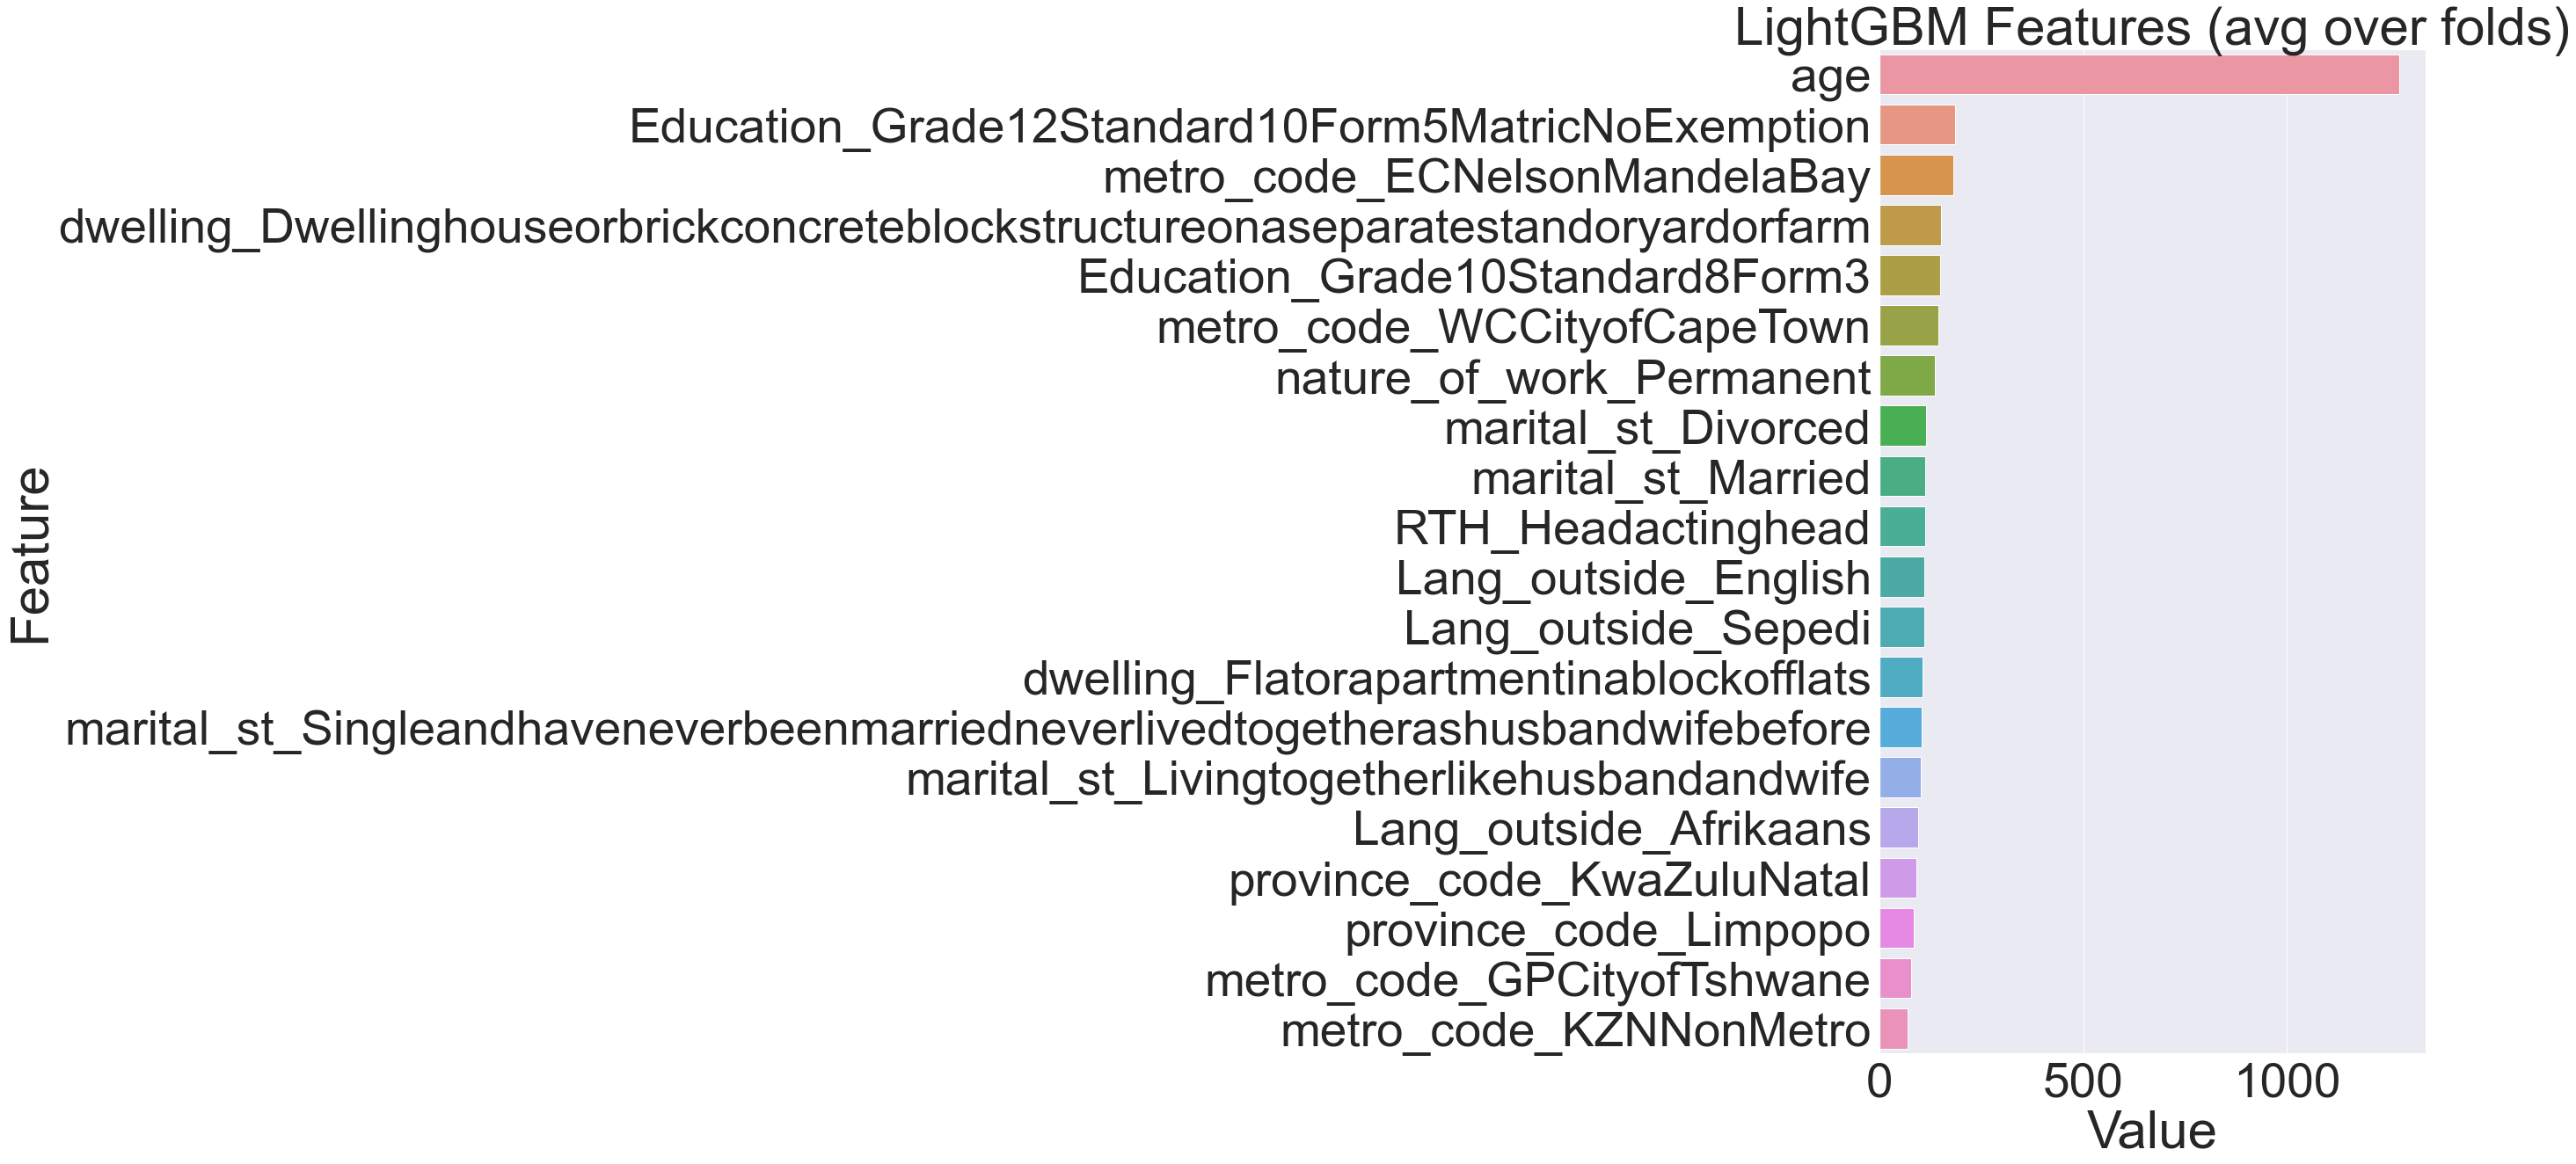

In [60]:
plot_feat_Imp(lgbm,features)

### Submission

In [61]:
final_sub = pd.DataFrame({'ID':test.ID,
                          'target': test_predi})
final_sub.to_csv('safety_sub3.csv', index = False)

print('Submission successfully saved...')

Submission successfully saved...


In [62]:
final_sub.head()

,ID,target
0,ID_00241643,0.106472
1,ID_00312043,0.059122
2,ID_00345323,0.152349
3,ID_00369643,0.089004
4,ID_00381163,0.143633
